# 데이터분석 경진대회 (JB사냥개들)

##  목차  
### [1. 데이터 파악](#s-1) 
+ [1.1 데이터 및 패키지 불러오기](#s-1.1)    
+ [1.2 데이터 컬럼 정보](#s-1.2)   
+ [1.3 데이터 결측값, 이상값 확인](#s-1.3)     
+ [1.4 이상값 및 결측값 -> 결측치 처리](#s-1.4)     
+ [1.5 결측치 간 패턴 등 연관성 파악](#s-1.5)   
+ [1.6 결측치 대체(추정통계량대체)](#s-1.6)
+ [1.7 결측치 대체(DL)](#s-1.7)
+ [1.8 결측치 대체(MI)](#s-1.8)


### [2. 데이터 시각화](#s-2) 
+ [2.1 타겟변수 파악](#s-2.1)  

### [3. Feature Enginnering](#s-3)

### [4. Modeling](#s-4)


test completed 2

## 1. 데이터 파악  <a id="s-1">

### 1-1. 데이터 및 패키지 불러오기 <a id="s-1.1">

> #### 디렉토리 설정 및 Raw Data 불러오기

In [2]:
import os
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback


import warnings



warnings.filterwarnings('ignore')

#path = "/Users/apple/Desktop/jbfg_ds_2nd/"
#os.chdir(path)

In [3]:
df = pd.read_csv('loan_customer.csv')

In [4]:
pd.set_option('display.max_columns',None)
df.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                         NaN    -19046.0            NaN            -4260.0   
2                    0.018634    -12931.0            NaN                NaN   
3                    0.026392    -11286.0         -746.0             -108.0   
4                    0.009175         NaN         -475.0                NaN   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -2120.0           1               1                0           1   
1          -2531.0           1               1                1           1   
2          -3866.0           1               1                0           0   
3              NaN           1               1                0           0   
4           -513.0           1               1                0           1   

   FLAG_EMAIL  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
0           0                     2                  WEDNESDAY   
1           0                     2                     MONDAY   
2           0                     2                   THURSDAY   
3           0                     2                   THURSDAY   
4           0                     2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                       10                       0                       0   
1                        9                       0                       0   
2                       12                       1                       1   
3                       14                       0                       1   
4                       12                       0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                        0  Business Entity Type 3                0   
1                        0              Government                0   
2                        0              Government                0   
3                        1  Business Entity Type 3                0   
4                        1        Industry: type 1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  \
0                1                0         NaN         NaN   58.349224   
1                0                0   26.499494   57.600542   46.433666   
2                1                0         NaN   63.496369         NaN   
3                1                0   82.376245   45.996152   68.694333   
4                1                0   66.199985         NaN         NaN   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4   

### 1-2. 데이터 컬럼 정보 <a id="s-1.2">

> #### 원활한 데이터 처리를 위해 컬럼정보(한글명)를 참고 활용 (지주 제공 ppt참고)

In [18]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [19]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

### 1-3. 데이터 결측값, 이상값 확인  <a id="s-1.3">

> #### 각 컬럼별 데이터 유형 및 결측치 확인 

In [20]:
df_colinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   대출식별번호                                   24000 non-null  int64  
 1   계약유형                                     24000 non-null  object 
 2   성별                                       16906 non-null  object 
 3   자가부동산보유여부                                14429 non-null  object 
 4   자녀수                                      24000 non-null  int64  
 5   소득금액(USD)                                24000 non-null  float64
 6   신용대출금액(USD)                              16700 non-null  float64
 7   소득유형                                     24000 non-null  object 
 8   학력                                       24000 non-null  object 
 9   결혼상태                                     24000 non-null  object 
 10  주거형태                                     24000

> #### <font color = lightseagreen>_데이터 유형 확인 : 수치형 변수는 float/int, 범주형 변수는 object로 잘 들어가있는 것으로 확인됨 </font>_
> #### <font color = lightseagreen>_결측값 및 이상값 확인 : 몇몇 컬럼에 대해 상당한 결측치가 존재함. 결측치 대체를 어떻게 하느냐가 매우 중요해 보임 </font>_

> #### SK_ID_CURR 키값에 중복여부 체크 진행, 대출식별 기준으로 그룹화하고 counting

In [21]:
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


> #### <font color = lightseagreen>  _SK_ID_CURR 키값에 중복여부 확인 결과 :  모두 고유값임 </font>_

> #### 각 컬럼별 유효값 확인

In [22]:
for column in df.columns:
    unique_values = df[column].drop_duplicates().dropna()
    value_counts = df[column].value_counts(dropna=False)
    truncated_value_counts = value_counts.head(60)  # Display only top 60 value counts
    print("-----------------------------------------------------------")
    print(f"Value counts for {column} - {column_info.get(column, 'No information')}: {truncated_value_counts} Unique valid values count: {len(unique_values)}")

-----------------------------------------------------------
Value counts for SK_ID_CURR - 대출식별번호: 100002    1
337229    1
337317    1
337293    1
337288    1
337287    1
337262    1
337261    1
337245    1
337242    1
337231    1
337226    1
337079    1
337217    1
337216    1
337211    1
337206    1
337164    1
337154    1
337134    1
337126    1
337101    1
337318    1
337323    1
337327    1
337345    1
337579    1
337578    1
337564    1
337550    1
337549    1
337534    1
337524    1
337516    1
337493    1
337487    1
337476    1
337459    1
337458    1
337433    1
337396    1
337393    1
337377    1
337368    1
337353    1
337096    1
337075    1
337616    1
336603    1
336720    1
336713    1
336690    1
336659    1
336651    1
336650    1
336643    1
336620    1
336609    1
336563    1
337072    1
Name: SK_ID_CURR, dtype: int64 Unique valid values count: 24000
-----------------------------------------------------------
Value counts for NAME_CONTRACT_TYPE - 계약유형: Cash loans    

> #### <font color = lightseagreen> _이상값 및 결측값 종류 : __'NaN', 'nan', 'XNA', 'Unknown'__  ▶ np.nan로 통일 진행 필요_ </font>

### 1.4 이상값 및 결측값 -> 결측치 처리 <a id="s-1.4">

> #### 이상값 모두 결측치로 통일하여 처리 : 최종 처리한 데이터프레임은 __'df_adj_mv'__

In [23]:
df_adj_mv = df.copy()
#df_adj_mv = df_adj_mv.astype(str)
df_adj_mv = df_adj_mv.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

In [24]:
for column in df_adj_mv.columns:
    value_counts = df_adj_mv[column].value_counts(dropna = False)
    #print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

In [25]:
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_adj_mv),"중",len(df_adj_mv[df_adj_mv.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_adj_mv.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23636


CODE_GENDER                   7095
FLAG_OWN_REALTY               9571
AMT_CREDIT                    7300
NAME_FAMILY_STATUS               1
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
ORGANIZATION_TYPE             4294
CB_SCORE_1                    6146
CB_SCORE_2                    8274
CB_SCORE_3                    7108
dtype: int64

> #### <font color = lightseagreen> _상당한 컬럼들에 결측치가 있음을 확인.    대부분 결측치가 있는 컬럼별로 결측치는 약 4,000 ~ 9,000개가 있으므로 20~40% 를 차지함_ </font>
> #### <font color = lightseagreen> _주어진 유효값들에 패턴에 의해 결측치가 발생된건지,   무작위 패턴으로 결측치가 있는 것인지 면밀한 확인이 필요함_ </font>

###  1.5 결측치 간 패턴 등 연관성 파악 <a id="s-1.5">

> #### 최종 결측치가 있는 컬럼 파악

In [26]:
# 결측값이 있는 행 선택하기
col_mv_list = df_adj_mv.columns[df_adj_mv.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- NAME_FAMILY_STATUS 결혼상태
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- ORGANIZATION_TYPE 근무회사유형
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


> #### 최종 결측치가 있는 행 파악

In [27]:
df_adj_mv2 = df_adj_mv[df_adj_mv.isnull().any(axis=1)]
df_adj_mv2

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0          100002         Cash loans           M               Y   
1          100004    Revolving loans         NaN             NaN   
2          100020         Cash loans           M               N   
3          100029         Cash loans           M               N   
4          100048         Cash loans         NaN               Y   
...           ...                ...         ...             ...   
23995      456095         Cash loans         NaN             NaN   
23996      456117         Cash loans         NaN               N   
23997      456118         Cash loans           M               Y   
23998      456142         Cash loans         NaN             NaN   
23999      456228         Cash loans         NaN               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT      NAME_INCOME_TYPE  \
0                 0          202500.0         NaN               Working   
1                 0           67500.0    135000.0               Working   
2                 0          108000.0    509602.5               Working   
3                 2          135000.0         NaN               Working   
4                 0          202500.0    604152.0               Working   
...             ...               ...         ...                   ...   
23995             0          135000.0         NaN             Pensioner   
23996             1           67500.0    490536.0               Working   
23997             0          135000.0    995643.0               Working   
23998             1          360000.0   1417185.0               Working   
23999             0          540000.0         NaN  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0      Secondary / secondary special  Single / not married  House / apartment   
1      Secondary / secondary special  Single / not married  House / apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special               Married  House / apartment   
4      Secondary / secondary special               Married  House / apartment   
...                              ...                   ...                ...   
23995               Higher education               Married  House / apartment   
23996  Secondary / secondary special               Married  House / apartment   
23997               Higher education               Married  House / apartment   
23998               Higher education  Single / not married  House / apartment   
23999  Secondary / secondary special               Married   Rented apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018801     -9461.0         -637.0   
1                             NaN    -19046.0            NaN   
2                        0.018634    -12931.0            NaN   
3                        0.026392    -11286.0         -746.0   
4                        0.009175         NaN         -475.0   
...                           ...         ...            ...   
23995                         NaN    -19105.0       365243.0   
23996                    0.003813    -12183.0            NaN   
23997                         NaN         NaN            NaN   
23998                    0.018029    -14010.0            NaN   
23999                    0.032561    -12847.0            NaN   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                -3648.0          -2120.0           1               1   
1                -4260.0          -2531.0           1               1   
2                    NaN          -3866.0           1               1   
3                 -108.0              NaN           1               1   
4                    NaN           -513.0           1               1   
...                  ...              ...         ...             ...   
23995                NaN          -2

> #### <font color = lightseagreen> _패턴을 확인할 plot을 구성하였으나 결측치가 있는 컬럼간 패턴이 있는지 유무를 해당 plot으로 확인이 어려움_ </font>

> #### 결측치 유형 파악에 앞서, 결측치 컬럼별 결측치일시 비결측치인 각 컬럼들에 대한 유효값 및 해당 유효값의 빈도수 파악

In [28]:
def most_frequent_values(df, columns_with_null):
    # Initialize an empty DataFrame to store the results
    result = pd.DataFrame()

    for col in columns_with_null:
        # Create a mask where the current column is null
        mask = df[col].isnull()
        
        # Count the number of nulls in the current column
        null_count = mask.sum()

        # Select rows where current column is null and drop columns with any null values in these rows
        df_null = df.loc[mask].dropna(axis=1)

        if not df_null.empty:
            # For each column, find the most frequent value and its count
            res_list = []
            for c in df_null.columns:
                try:
                    mode_value, count_value = df_null[c].mode()[0], df_null[c].value_counts().iloc[0]
                    res_list.append((c, mode_value, count_value))
                except Exception as e:
                    print(f"An exception occurred for column {c}: {str(e)}")
                    
            res_df = pd.DataFrame(res_list, columns=['Column', 'Most Frequent Value', 'Count'])

            # Add the results to the main DataFrame with current column as an additional level of index,
            # and include null_count as part of index label
            result = pd.concat([result, res_df.set_index([pd.Index([f"{col} (Nulls: {null_count})"]*len(res_df)), 'Column'])])

    return result

# Usage remains same...

columns_with_null = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE',
                    'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','ORGANIZATION_TYPE','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3']  # Add more columns as needed

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

result_df = most_frequent_values(df_adj_mv, columns_with_null)
print(result_df.to_string())


                                                                               Most Frequent Value  Count
                                         Column                                                          
CODE_GENDER (Nulls: 7095)                SK_ID_CURR                                         100004      1
                                         NAME_CONTRACT_TYPE                             Cash loans   6424
                                         CNT_CHILDREN                                            0   4974
                                         AMT_INCOME_TOTAL                                 135000.0    808
                                         NAME_INCOME_TYPE                                  Working   3617
                                         NAME_EDUCATION_TYPE         Secondary / secondary special   5057
                                         NAME_FAMILY_STATUS                                Married   4559
                                         NAME_

> #### 각 함수별 결측치 구성비율 파악

In [29]:
def missing_ratio(df):
    return df.isnull().mean()

# Usage example with a dataset 'df'
print(missing_ratio(df_adj_mv))

SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.295625
FLAG_OWN_REALTY               0.398792
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.304167
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000042
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.297875
DAYS_BIRTH                    0.197875
DAYS_EMPLOYED                 0.297875
DAYS_REGISTRATION             0.405542
DAYS_ID_PUBLISH               0.197542
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
REGION_RATING_CLIENT          0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
REG_CITY_NOT_WORK_CITY   

> #### 결측치 유형 및 유형별 처리방법

__1. 완전 무작위 결측(MCAR: Missing Completely At Random) :__  
X1, X2, X3라는 특성이 있다고 가정시 이 때, X2열의 결측치가 X1, X2, X3열의 다른 값들과 아무런 상관관계가 없을 경우,  
이를 완전 무작위 결측이라 함.

__2. 무작위 결측(MAR: Missing At Random) :__  
X1, X2, X3라는 특성이 있다고 가정, 이 때, X1이 True인 경우, X2는 결측치를 갖고, X1이 False인 경우, X2는 값을 가진다면, 다시 말해 다른 특성의 값에 따라 결측치의 발생 확률이 계산될 경우임.   
그러나 값자체의 상관관계는 알 수 없는 경우. 이를 무작위 결측이라함.

__3. 비무작위 결측(NMAR: Not Missing At Random) :__  
위의 두가지 유형이 아닐 때, 비무작위 결측. 이 경우 결측치가 일어난 특성(X2)의 값이 다른 특성(X1)의 값과 상관관계가 있음.

> #### 결측치 비율별 처리방법

__1. 5% 미만__	    -> 제거 또는 보간법으로 처리(평균, 중앙, 최빈값)  
__2. 5% 이상__ -> 단순히 평균값 등으로 대체하는 방법보다 다중 대체법의 우월성을 강조함. 이는 상당히 높은 비율의 결손값(예를 들어 20~40%)에 대해서도 유효  
(참고 : "Multiple Imputation for Nonresponse in Surveys" by Donald B. Rubin)

> #### _<font color = lightseagreen>  결측값 1행만 가지는 'NAME_FAMILY_STATUS' 컬럼은 최빈값으로 처리 (통계량을 통해 추정통계량 대체법 사용) </font>_
> #### _<font color = lightseagreen>  이외 결측치를 가지는 컬럼은 별도 결측치 유형 파악 후 해당 유형에 맞게끔 처리 </font>_

> #### 추정통계량 대체함수(최빈값, 중앙값으로 결측치 대체) : NAME_FAMILY_STATUS 컬럼만 진행

In [30]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [31]:
fill_methods = {
    'NAME_FAMILY_STATUS': 'mode',
}

df_adj_mv_2 = replace_missing_values(df_adj_mv,fill_methods)
missing_values = df_adj_mv_2.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'ORGANIZATION_TYPE',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

> #### _<font color = lightseagreen> NAME_FAMILY_STATUS 컬럼은 범주형이기에 중앙값이 아닌 최빈값으로 결측치를 대체 </font>_

> #### 결측치 패턴을 확인할 Heatmap 구성

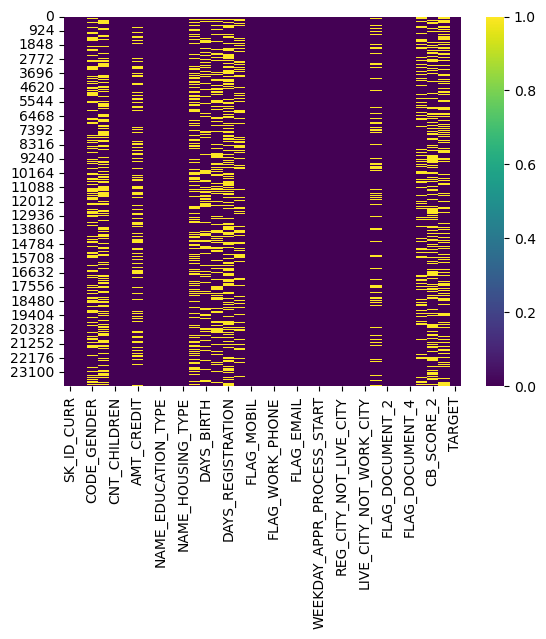

In [77]:
sns.heatmap(df_adj_mv_2.isnull(), cmap='viridis')
plt.show()

> #### <font color = lightseagreen> _패턴을 확인할 plot을 구성하였으나 결측치가 있는 컬럼간 패턴이 있는지 유무를 해당 plot으로 확인이 어려움_ </font>
> #### <font color = lightseagreen> _각 컬럼별 결측치 유형이 MCAR일거라 생각됨_ </font>

> ####  Little's MCAR test

> 변수의 결측여부를 새로운 이진변수로 생성 후 상관관계를 확인. 이후 상관관계가 없을시 MCAR일 가능성이 높음  
> MCAR 판별위한 대표적인 테스트 

In [59]:
# 결측치가 있는 컬럼들로만 구성된 데이터프레임
missing_cols = df_adj_mv_2.columns[df_adj_mv_2.isnull().any()].tolist()
df_with_missing_values = df_adj_mv_2[missing_cols]

In [60]:
def test_mcar(df):
    # 각 컬럼별로 결측 여부를 나타내는 새로운 데이터 프레임 생성
    df_nan = df.isnull().astype(int)
    
    results = {}
    
    # 각 컬럼별로 다른 모든 변수들과의 상관 계수 계산
    for col in df.columns:
        corr_matrix = df_nan[[c for c in df.columns if c != col]].corrwith(df_nan[col]).abs()
        
        # 상관 계수가 유의미하게 큰 경우가 있는지 확인
        max_corr = corr_matrix.max()
        
        results[col] = max_corr < 0.05  # 임곗값은 실험적으로 설정
    
    return results

In [61]:
results = test_mcar(df_with_missing_values)

for column, is_mcar in results.items():
    if is_mcar:
        print(f"{column} is likely MCAR")
    else:
        print(f"{column} is likely MAR or NMAR")

CODE_GENDER is likely MCAR
FLAG_OWN_REALTY is likely MCAR
AMT_CREDIT is likely MCAR
REGION_POPULATION_RELATIVE is likely MCAR
DAYS_BIRTH is likely MCAR
DAYS_EMPLOYED is likely MCAR
DAYS_REGISTRATION is likely MCAR
DAYS_ID_PUBLISH is likely MCAR
ORGANIZATION_TYPE is likely MCAR
CB_SCORE_1 is likely MCAR
CB_SCORE_2 is likely MCAR
CB_SCORE_3 is likely MCAR


> #### <font color = lightseagreen> _상관 관계가 없기에 해당 컬럼들의 결측치 발생은 완전히 무작위일 가능성(MCAR)이 높으므로_  </font>
> #### <font color = lightseagreen> _MCAR : 딥러닝 등 모델을 통해 결측치 처리필요함_  </font>

### 1.6 결측치 대체(추정통계량대체) <a id="s-1.6">

> #### 컬럼별 유효값들을 체크해서 결측치 대체 진행

> #### 결측치를 보이는 컬럼들과 각 컬럼별 결측치 처리를 아래와 같이 진행하고자 함  
<font color =red> 카테고리 형태의 컬럼들의 결측치는 최빈값, 그외 일반적인 숫자형은 중앙값으로 대체 _(일반적인 Missing Value Imputation 방법)_</font>  
__1. 성별(code_gender)__ : <font color =bluesky> 최빈값 </font>  
__2. 자가부동산보유여부(flag_own_realty)__ : <font color =bluesky>최빈값 </font>  
__3. 신용대출금액(amt_credit)__ : <font color =bluesky>중앙값 </font>   
__4. 결혼상태 (NAME_FAMILY_STATUS)__ : <font color =bluesky>최빈값 </font>   
__5. 거주 지역의 표준화된 인구(region_population_relative)__ : <font color =bluesky>중앙값 </font>  
__6. 대출 신청 시점에서의 일단위 나이(기준 시점 대비 상대적인 시간) (days_birth)__ : <font color =bluesky>중앙값 </font>  
__7. 대출 신청 시점에서의 고객의 근무일수(기준 시점 대비 상대적인 시간)(days_employed)__ :  <font color =bluesky>중앙값 </font>  
__8. 대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_registration)__ : <font color =bluesky>중앙값 </font>  
__9. 대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)(days_id_publish)__ : <font color =bluesky>중앙값 </font>   
__10. 근무회사 유형 (ORGANIZATION_TYPE)__ :  <font color =bluesky>최빈값 </font>  
__11. 신용점수1(cb_score_1)__ :<font color =bluesky> 중앙값</font>  
__12. 신용점수2(cb_score_2)__ :  <font color =bluesky>중앙값</font>  
__13. 신용점수3(cb_score_3)__ : <font color =bluesky>중앙값</font>  

> #### 결측치 처리 함수 구성

In [42]:
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

> #### 결측치 처리 진행

In [43]:
fill_methods = {
    'CODE_GENDER': 'mode',
    'FLAG_OWN_REALTY' : 'mode',
    'AMT_CREDIT':'median',
    'NAME_FAMILY_STATUS': 'mode',
    'REGION_POPULATION_RELATIVE':'median',
    'DAYS_BIRTH':'median',
    'DAYS_EMPLOYED':'median',
    'DAYS_REGISTRATION':'median',
    'DAYS_ID_PUBLISH':'median',
    'ORGANIZATION_TYPE':'mode',
    'CB_SCORE_1':'median',
    'CB_SCORE_2':'median',
    'CB_SCORE_3':'median'
}

df_adj_mv_fill = replace_missing_values(df_adj_mv,fill_methods)
df_adj_mv_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 24000 non-null  object 
 3   FLAG_OWN_REALTY             24000 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  24000 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  24000 non-null  float64
 12  DAYS_BIRTH                  24000 non-null  float64
 13  DAYS_EMPLOYED               240

In [44]:
df_adj_mv_fill.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans           F               Y             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans           F               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0    510853.5          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0    510853.5          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                    0.018850    -19046.0        -1206.0            -4260.0   
2                    0.018634    -12931.0        -1206.0            -4521.0   
3                    0.026392    -11286.0         -746.0             -108.0   
4                    0.009175    -15731.0         -475.0            -4521.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -2120.0           1               1                0           1   
1          -2531.0           1               1                1           1   
2          -3866.0           1               1                0           0   
3          -3251.0           1               1                0           0   
4           -513.0           1               1                0           1   

   FLAG_EMAIL  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
0           0                     2                  WEDNESDAY   
1           0                     2                     MONDAY   
2           0                     2                   THURSDAY   
3           0                     2                   THURSDAY   
4           0                     2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                       10                       0                       0   
1                        9                       0                       0   
2                       12                       1                       1   
3                       14                       0                       1   
4                       12                       0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                        0  Business Entity Type 3                0   
1                        0              Government                0   
2                        0              Government                0   
3                        1  Business Entity Type 3                0   
4                        1        Industry: type 1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  \
0                1                0   49.894802   57.935604   58.349224   
1                0                0   26.499494   57.600542   46.433666   
2                1                0   49.894802   63.496369   59.971539   
3                1                0   82.376245   45.996152   68.694333   
4                1                0   66.199985   57.935604   59.971539   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4   

### 1.7 결측치 대체(DL) <a id="s-1.7">

> #### 딥러닝을 통한 결측치 대체 진행

> #### 딥러닝을 적용할 데이터프레임 불러오기  
> #### 더 많은 학습 데이터 확보를 위해 널값이 아닌 XNA, Unknown으로 되어 있는 유효값들을 처리하지 않음.

In [5]:
#data = data.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)
data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002         Cash loans           M               Y             0   
1      100004    Revolving loans         NaN             NaN             0   
2      100020         Cash loans           M               N             0   
3      100029         Cash loans           M               N             2   
4      100048         Cash loans         NaN               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0          202500.0         NaN          Working   
1           67500.0    135000.0          Working   
2          108000.0    509602.5          Working   
3          135000.0         NaN          Working   
4          202500.0    604152.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special               Married  House / apartment   
4  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                         NaN    -19046.0            NaN            -4260.0   
2                    0.018634    -12931.0            NaN                NaN   
3                    0.026392    -11286.0         -746.0             -108.0   
4                    0.009175         NaN         -475.0                NaN   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -2120.0           1               1                0           1   
1          -2531.0           1               1                1           1   
2          -3866.0           1               1                0           0   
3              NaN           1               1                0           0   
4           -513.0           1               1                0           1   

   FLAG_EMAIL  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START  \
0           0                     2                  WEDNESDAY   
1           0                     2                     MONDAY   
2           0                     2                   THURSDAY   
3           0                     2                   THURSDAY   
4           0                     2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                       10                       0                       0   
1                        9                       0                       0   
2                       12                       1                       1   
3                       14                       0                       1   
4                       12                       0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                        0  Business Entity Type 3                0   
1                        0              Government                0   
2                        0              Government                0   
3                        1  Business Entity Type 3                0   
4                        1        Industry: type 1                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  CB_SCORE_1  CB_SCORE_2  CB_SCORE_3  \
0                1                0         NaN         NaN   58.349224   
1                0                0   26.499494   57.600542   46.433666   
2                1                0         NaN   63.496369         NaN   
3                1                0   82.376245   45.996152   68.694333   
4                1                0   66.199985         NaN         NaN   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4   

> #### 원활한 데이터 학습을 위한 생년월일데이터 가공

In [10]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/360
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: math.ceil(x) if not np.isnan(x) else np.nan)
data['DAYS_BIRTH'].head()

0    27.0
1    53.0
2    36.0
3    32.0
4     NaN
Name: DAYS_BIRTH, dtype: float64

> #### 딥러닝 Input 데이터 분류

In [11]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values
    
    

In [12]:
numeric_columns,categorical_columns,missing_values = columns_classification(data)

total_columns : 36
numeric_columns : 17
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 12
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']


In [13]:
columns_classification(data)

total_columns : 36
numeric_columns : 17
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 12
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']


(['SK_ID_CURR',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REGION_RATING_CLIENT',
  'HOUR_APPR_PROCESS_START',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'TARGET'],
 ['NAME_CONTRACT_TYPE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE'],
 ['CODE_GENDER',
  'FLAG_OWN_REALTY',
  'AMT_CREDIT',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'CB_SCORE_1',
  'CB_SCORE_2',
  'CB_SCORE_3',
  'DAYS_BIRTH_YEAR'])

> #### 범주형 범수(딥러닝 적용)

In [14]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 ):
    
    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 성별 전용
    data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()



    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((data_with_missing[input_numeric_columns].values, categorical_data_encoded))
    len(input_data_encoded)

    # 데이터 스케일링
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data_encoded)


    print(len(input_data_scaled))

    train_data_scaled = input_data_scaled[data_with_missing[target_column].notnull()]

    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_scaled.shape[1]



    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(65, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    # 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

    # LabelEncoder 객체 생성 및 학습
    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
    integer_encoded_labels



    one_hot_train_labels = to_categorical(integer_encoded_labels)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, callbacks=[early_stopping_cb])
    

    
    missing_data = input_data_scaled[data_with_missing[target_column].isnull()]
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()


    original_label=np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


    print(data_with_fill.loc[missing_data_index, target_column].head())
    return data_with_fill
    

> #### 수치형 범수(딥러닝 적용)

In [15]:
def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2' ,epochs_val=30, batch_size_val=32 ):

    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()


    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((data_with_missing[input_numeric_columns].values, categorical_data_encoded))
    len(input_data_encoded)

    # 데이터 스케일링
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data_encoded)


    print(len(input_data_scaled))

    train_data_scaled = input_data_scaled[data_with_missing[target_column].notnull()]

    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_scaled.shape[1]




    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])


    # Prepare target data
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    # Scale target data using a new scaler
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, callbacks=[early_stopping_cb])


    missing_data = input_data_scaled[data_with_missing[target_column].isnull()]
    
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()


    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values
    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    

> #### 결측치 채우기  
> 데이터를 채우면서, 예측값 여부 컬럼을 추가적으로 생성함  
> 예측한 컬럼을 다음예측에 사용했을 경우, 기존의 결측치가 아닌 데이터들과 비교했을때 분포상 큰 차이는 없음

total_columns : 36
numeric_columns : 17
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 12
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
16905
Epoch 1/30
423/423 [==============================] - 1s 1ms/step - loss: 0.7059 - accuracy: 0.6534 - val_loss: 0.6390 - val_accuracy: 0.6832
Epoch 2/30
423/423 [==============================] - 0s 742us/s

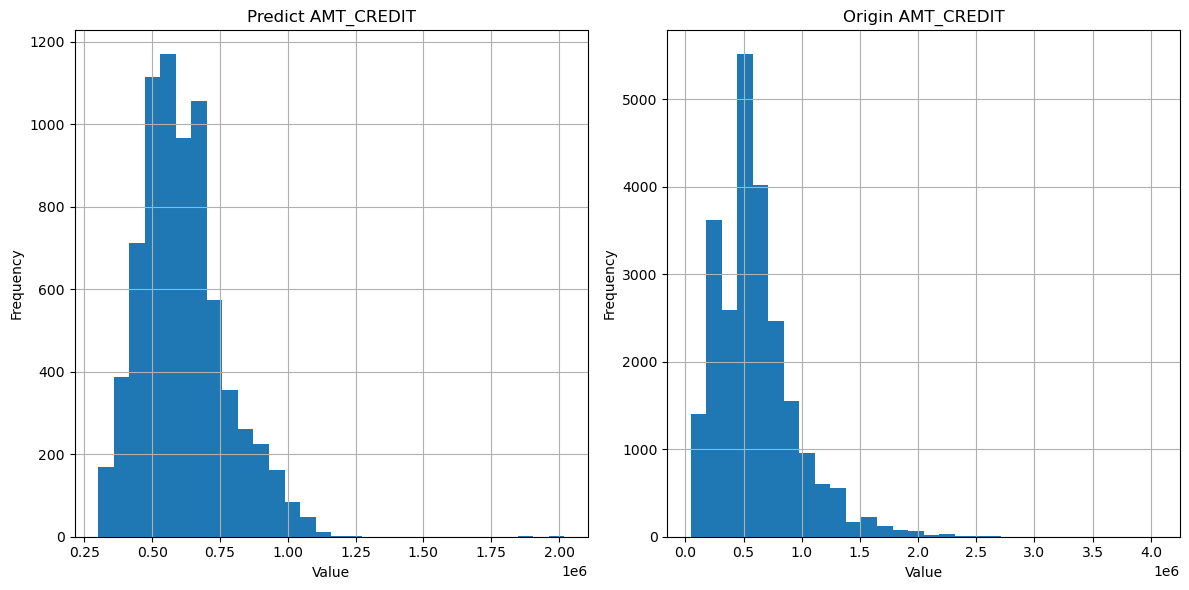

total_columns : 39
numeric_columns : 18
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 12
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 9
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
16851
Epoch 1/32
422/422 [==============================] - 1s 966us/step - loss: 1.2148 - mean_squared_error: 1.1536 -

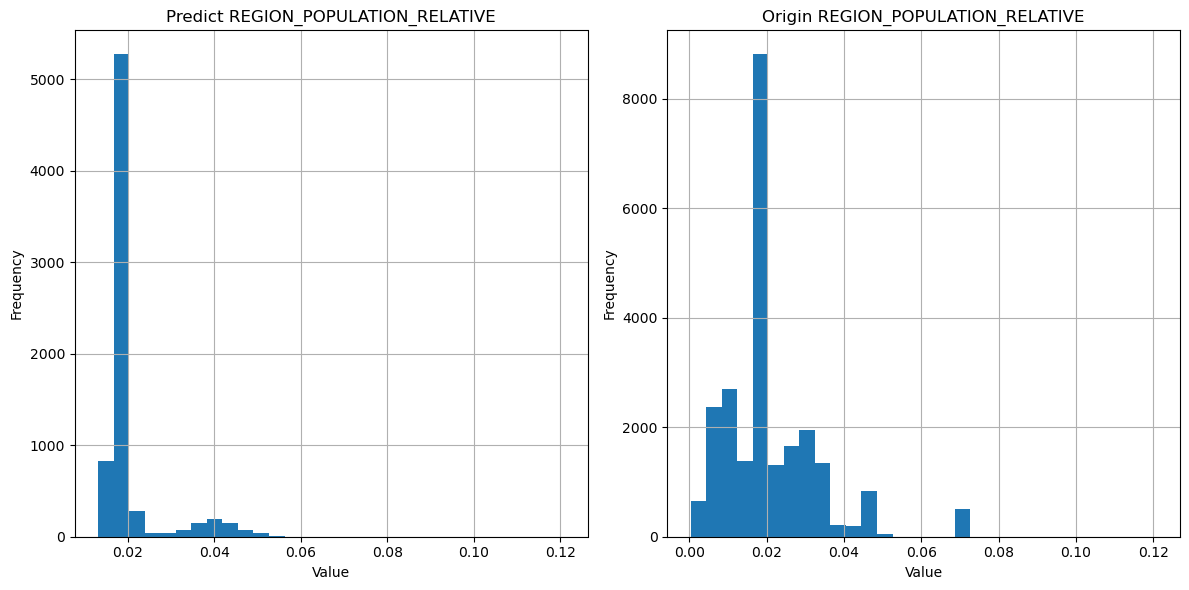

total_columns : 40
numeric_columns : 19
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 13
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag']
missing_values : 8
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
19251
Epoch 1/32
482/482 [==============================] - 1s 950us/step 

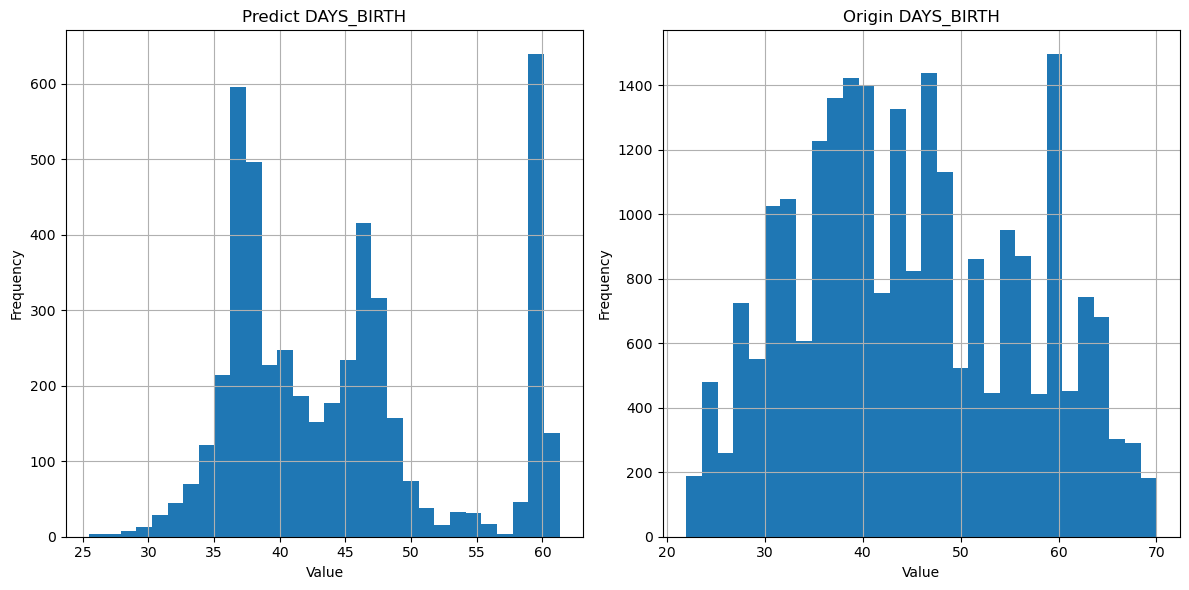

total_columns : 41
numeric_columns : 20
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 14
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 7
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
16851
Epoch 1/32
422/422 [===================

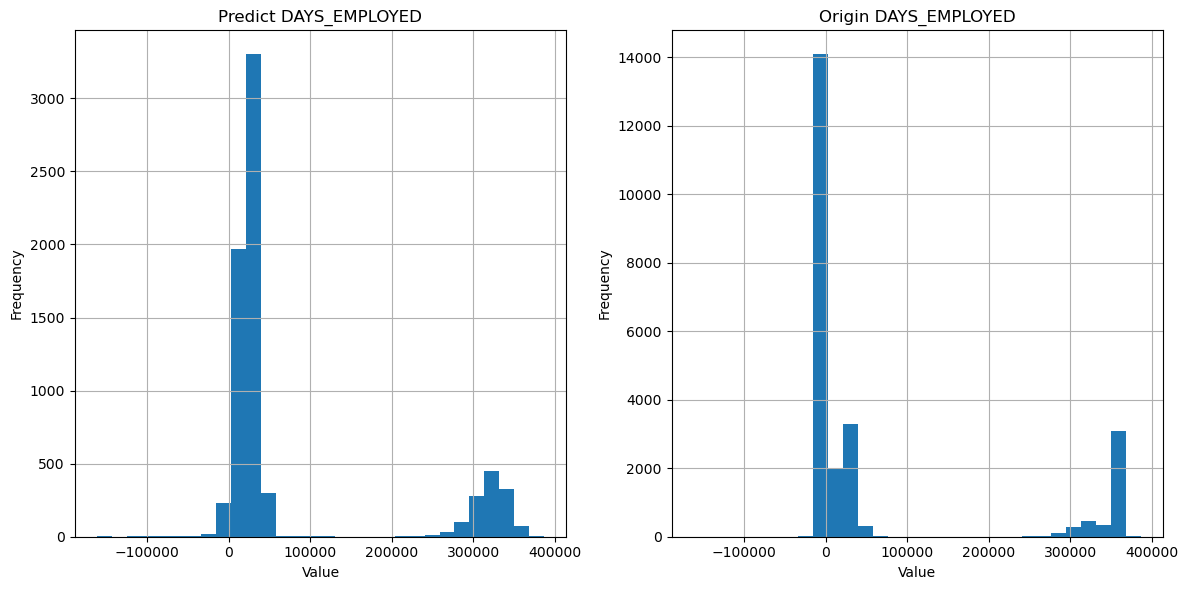

total_columns : 42
numeric_columns : 21
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 15
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 6
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
14267
Epoch 1

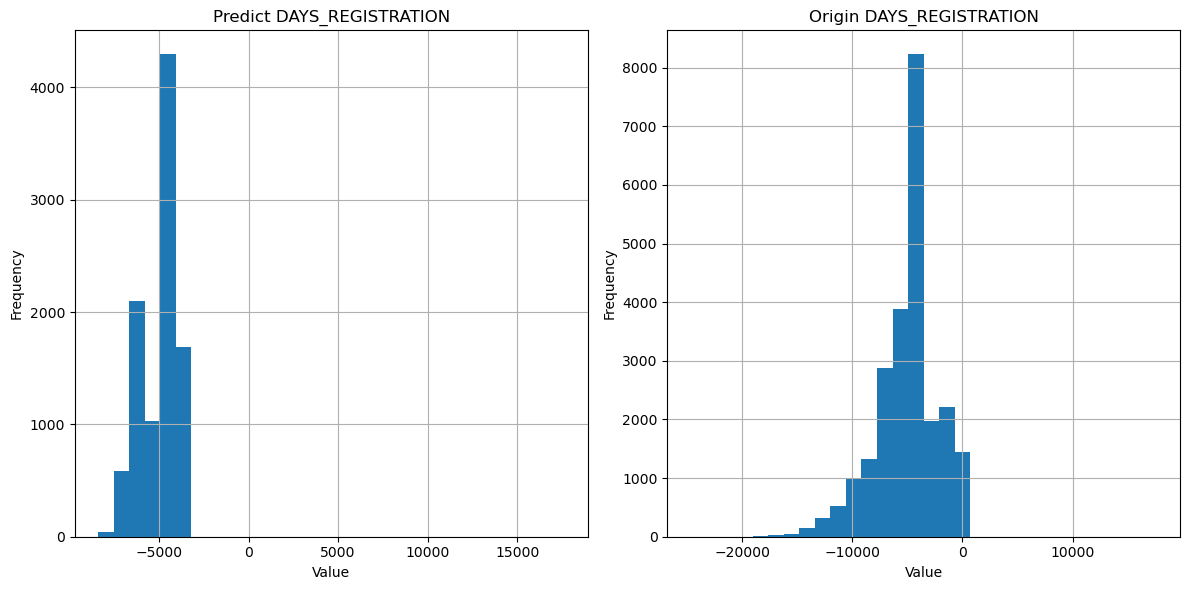

total_columns : 43
numeric_columns : 22
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 5
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'D

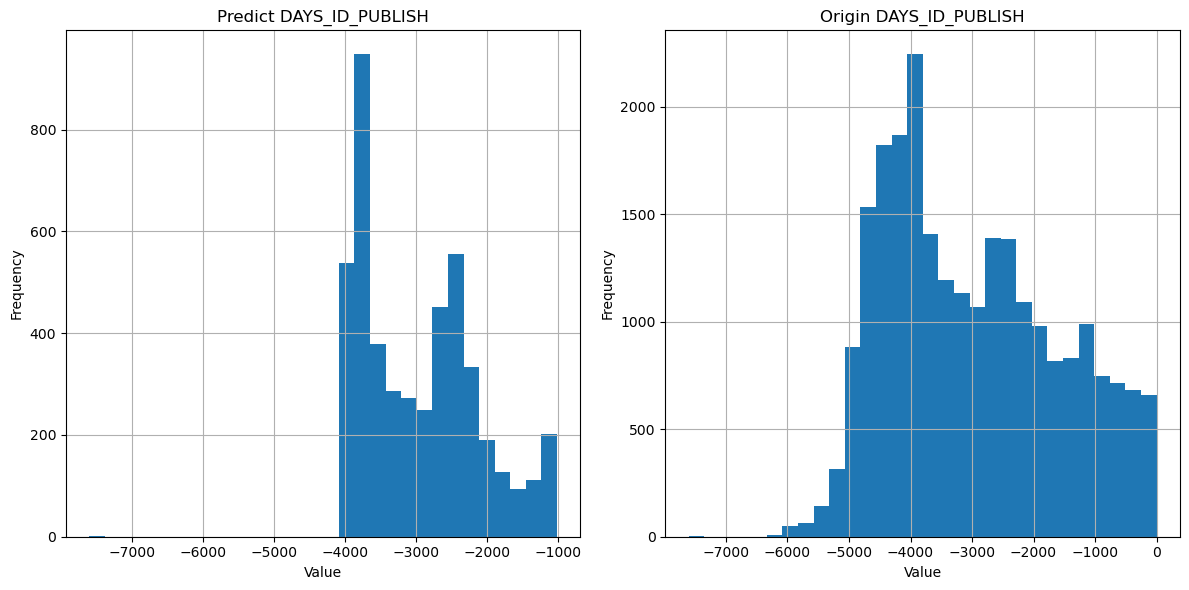

total_columns : 44
numeric_columns : 23
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 17
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 4
['CB_SCORE_

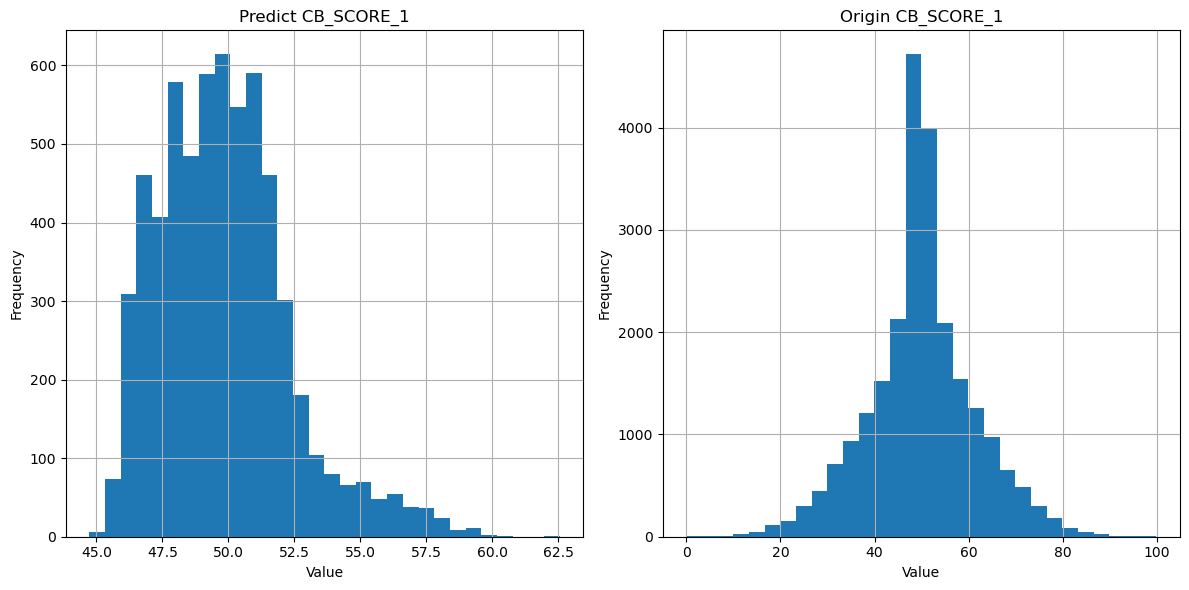

total_columns : 45
numeric_columns : 24
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

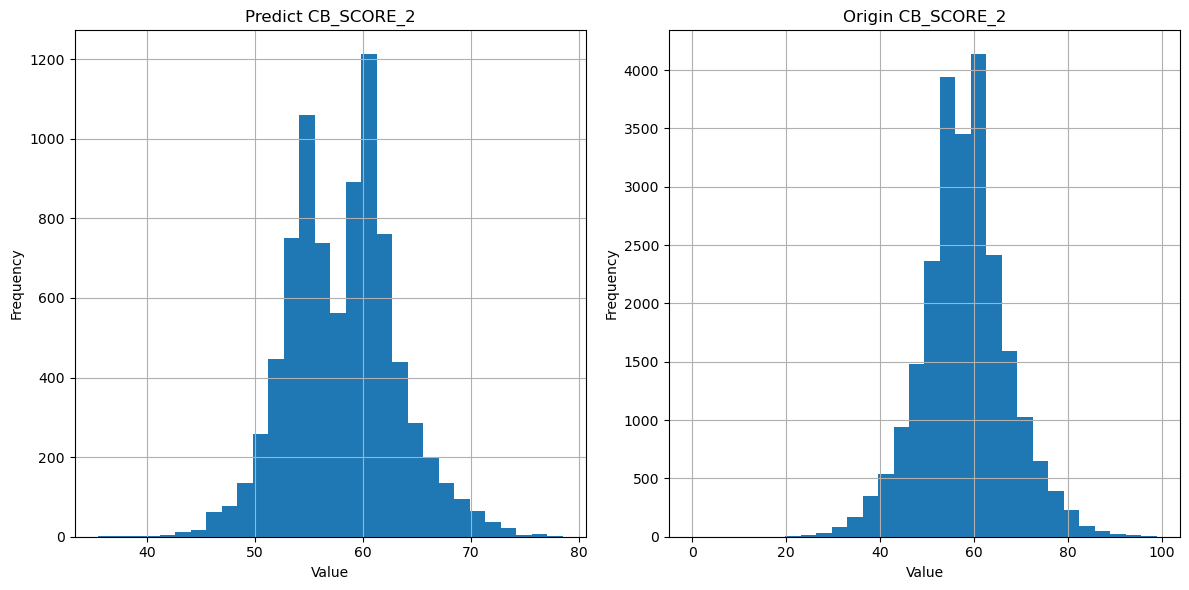

total_columns : 46
numeric_columns : 25
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 19
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'C

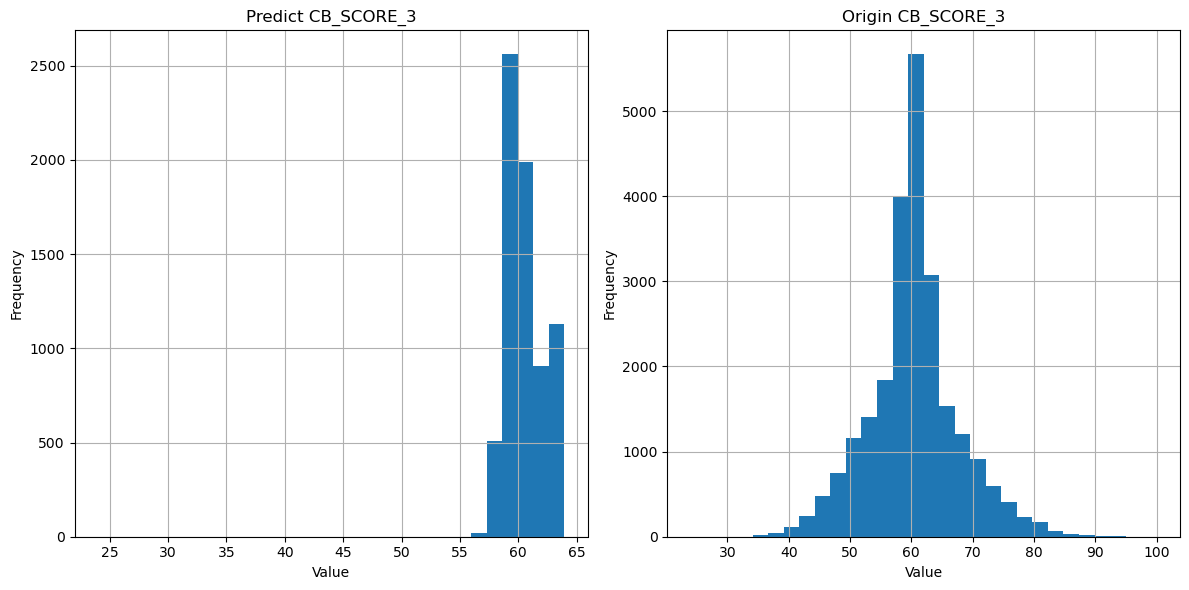

total_columns : 47
numeric_columns : 26
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 20
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

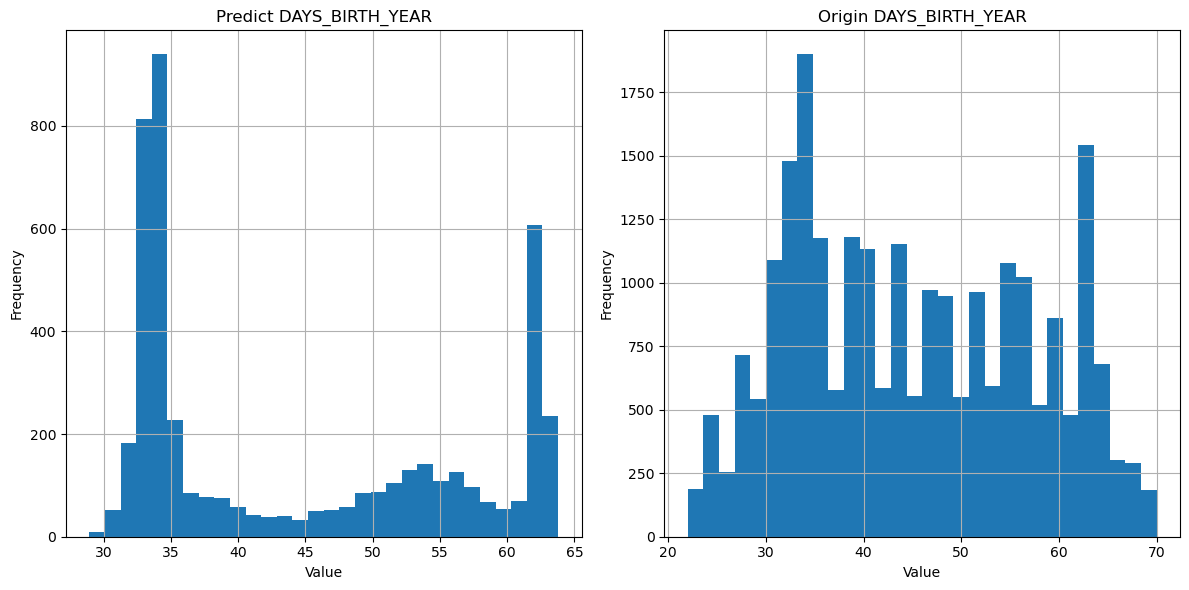

In [16]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )

for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=32, batch_size_val=32 )

total_columns : 36
numeric_columns : 17
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 12
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'DAYS_BIRTH_YEAR']
24000
16905
Epoch 1/30
423/423 [==============================] - 1s 936us/step - loss: 0.7021 - accuracy: 0.6545 - val_loss: 0.6370 - val_accuracy: 0.6788
Epoch 2/30
423/423 [==============================] - 0s 751us

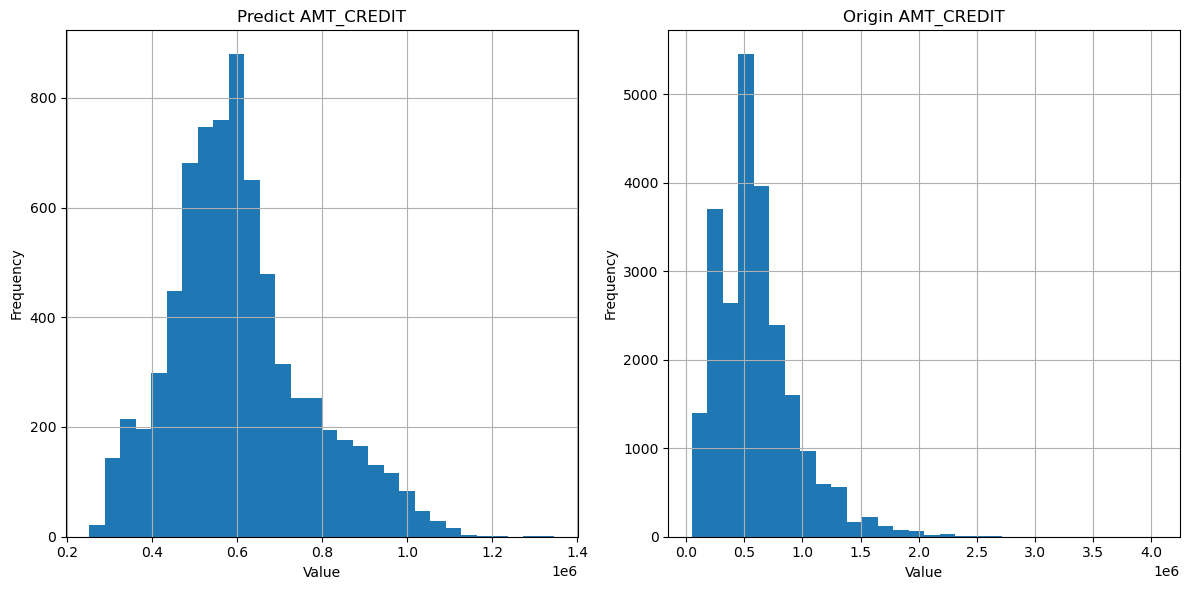

24000
16851
Epoch 1/32
422/422 [==============================] - 1s 1ms/step - loss: 1.3218 - mean_squared_error: 1.2593 - val_loss: 0.9207 - val_mean_squared_error: 0.8597
Epoch 2/32
422/422 [==============================] - 0s 791us/step - loss: 1.0344 - mean_squared_error: 0.9745 - val_loss: 0.7837 - val_mean_squared_error: 0.7251
Epoch 3/32
422/422 [==============================] - 0s 799us/step - loss: 0.8934 - mean_squared_error: 0.8360 - val_loss: 0.7083 - val_mean_squared_error: 0.6521
Epoch 4/32
422/422 [==============================] - 0s 791us/step - loss: 0.8196 - mean_squared_error: 0.7648 - val_loss: 0.7328 - val_mean_squared_error: 0.6794
Epoch 5/32
422/422 [==============================] - 0s 781us/step - loss: 0.8115 - mean_squared_error: 0.7592 - val_loss: 0.6790 - val_mean_squared_error: 0.6280
Epoch 6/32
422/422 [==============================] - 0s 788us/step - loss: 0.7577 - mean_squared_error: 0.7081 - val_loss: 0.6701 - val_mean_squared_error: 0.6218
Epoch 

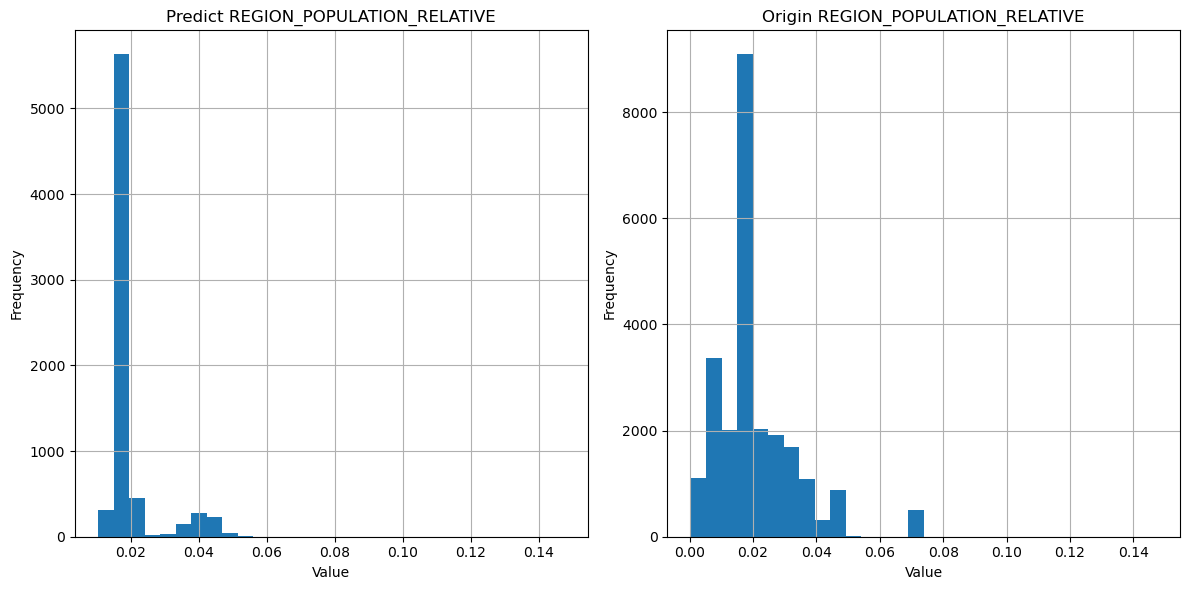

24000
19251
Epoch 1/32
482/482 [==============================] - 1s 924us/step - loss: 0.9648 - mean_squared_error: 0.9025 - val_loss: 0.6581 - val_mean_squared_error: 0.5977
Epoch 2/32
482/482 [==============================] - 0s 785us/step - loss: 0.7145 - mean_squared_error: 0.6560 - val_loss: 0.6587 - val_mean_squared_error: 0.6021
Epoch 3/32
482/482 [==============================] - 0s 785us/step - loss: 0.6407 - mean_squared_error: 0.5860 - val_loss: 0.6149 - val_mean_squared_error: 0.5621
Epoch 4/32
482/482 [==============================] - 0s 789us/step - loss: 0.6049 - mean_squared_error: 0.5538 - val_loss: 0.6090 - val_mean_squared_error: 0.5599
Epoch 5/32
482/482 [==============================] - 0s 796us/step - loss: 0.5838 - mean_squared_error: 0.5365 - val_loss: 0.6167 - val_mean_squared_error: 0.5713
Epoch 6/32
482/482 [==============================] - 0s 794us/step - loss: 0.5611 - mean_squared_error: 0.5177 - val_loss: 0.5842 - val_mean_squared_error: 0.5426
Epoc

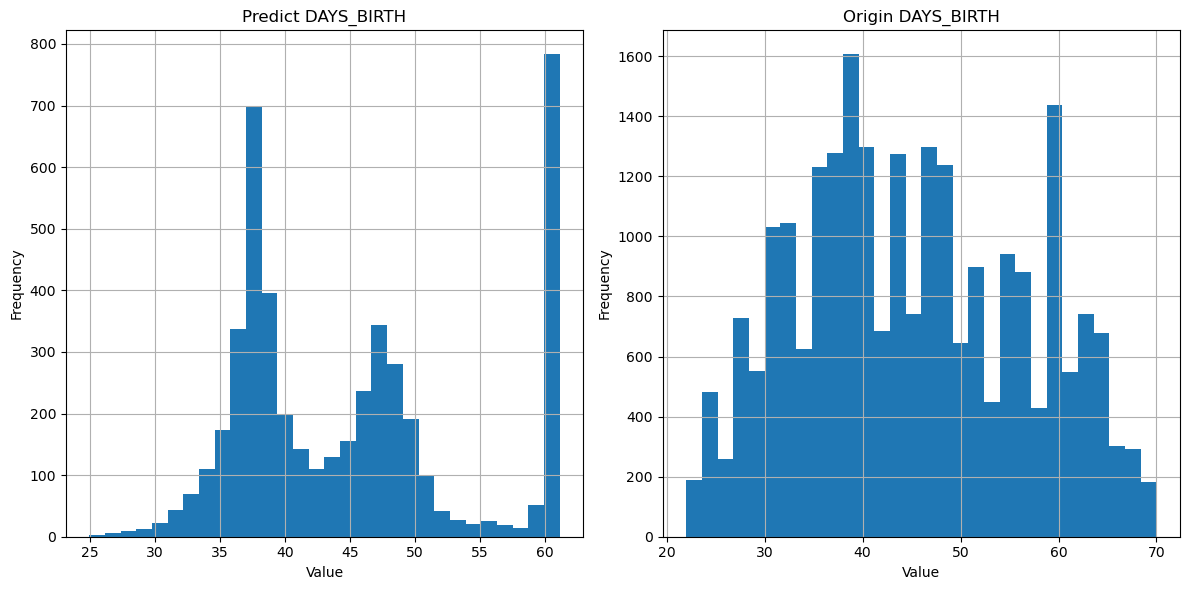

24000
16851
Epoch 1/32
422/422 [==============================] - 1s 951us/step - loss: 0.5900 - mean_squared_error: 0.5262 - val_loss: 0.1625 - val_mean_squared_error: 0.1006
Epoch 2/32
422/422 [==============================] - 0s 789us/step - loss: 0.2430 - mean_squared_error: 0.1832 - val_loss: 0.1585 - val_mean_squared_error: 0.1008
Epoch 3/32
422/422 [==============================] - 0s 848us/step - loss: 0.1677 - mean_squared_error: 0.1123 - val_loss: 0.1594 - val_mean_squared_error: 0.1063
Epoch 4/32
422/422 [==============================] - 0s 788us/step - loss: 0.1628 - mean_squared_error: 0.1119 - val_loss: 0.2365 - val_mean_squared_error: 0.1880
Epoch 5/32
422/422 [==============================] - 0s 786us/step - loss: 0.1041 - mean_squared_error: 0.0582 - val_loss: 0.2848 - val_mean_squared_error: 0.2415
Epoch 6/32
422/422 [==============================] - 0s 784us/step - loss: 0.0819 - mean_squared_error: 0.0412 - val_loss: 0.2595 - val_mean_squared_error: 0.2214
Epoc

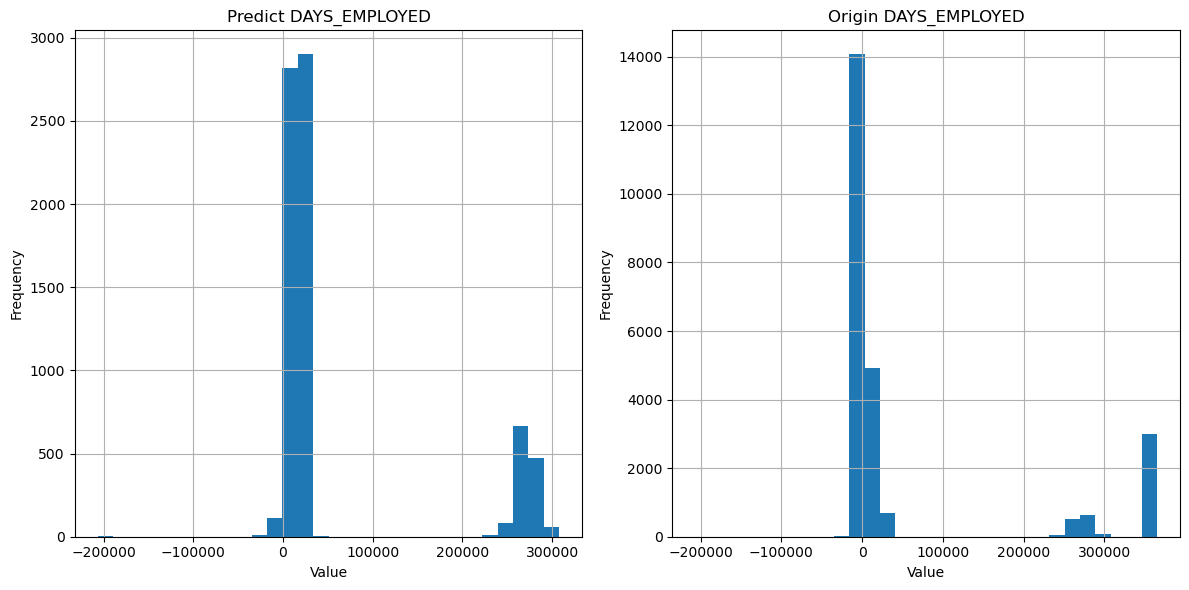

24000
14267
Epoch 1/32
357/357 [==============================] - 1s 989us/step - loss: 1.2514 - mean_squared_error: 1.1885 - val_loss: 1.0243 - val_mean_squared_error: 0.9630
Epoch 2/32
357/357 [==============================] - 0s 796us/step - loss: 1.0779 - mean_squared_error: 1.0180 - val_loss: 0.9940 - val_mean_squared_error: 0.9356
Epoch 3/32
357/357 [==============================] - 0s 796us/step - loss: 1.0473 - mean_squared_error: 0.9905 - val_loss: 0.9873 - val_mean_squared_error: 0.9323
Epoch 4/32
357/357 [==============================] - 0s 793us/step - loss: 1.0280 - mean_squared_error: 0.9746 - val_loss: 0.9773 - val_mean_squared_error: 0.9256
Epoch 5/32
357/357 [==============================] - 0s 789us/step - loss: 1.0043 - mean_squared_error: 0.9543 - val_loss: 0.9639 - val_mean_squared_error: 0.9155
Epoch 6/32
357/357 [==============================] - 0s 797us/step - loss: 0.9901 - mean_squared_error: 0.9433 - val_loss: 0.9547 - val_mean_squared_error: 0.9096
Epoc

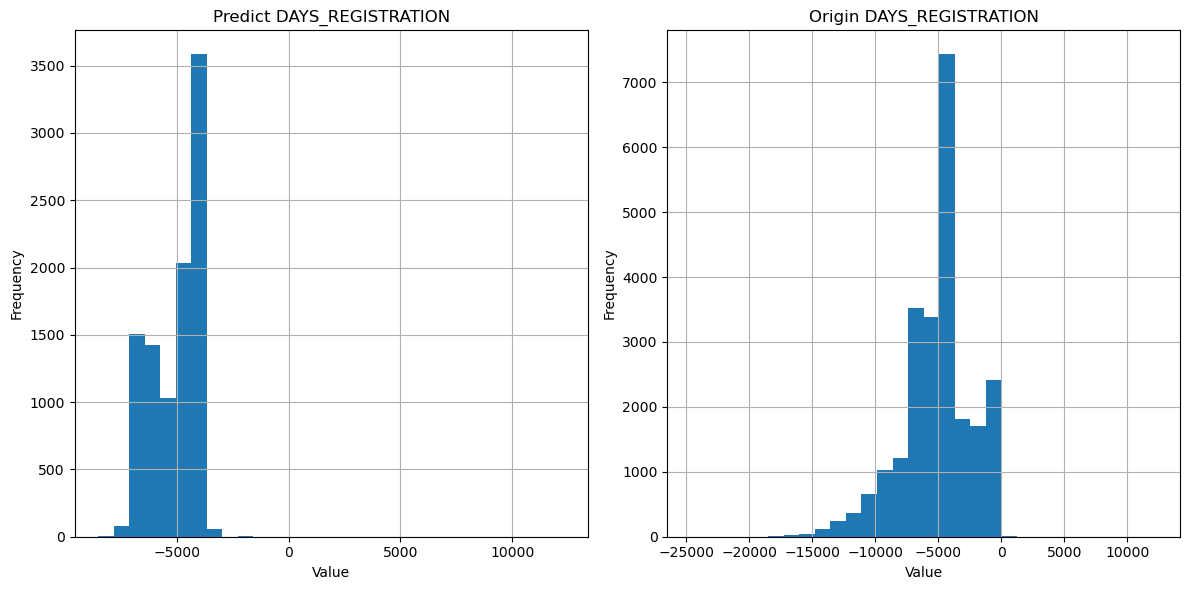

24000
19259
Epoch 1/32
482/482 [==============================] - 1s 930us/step - loss: 1.1916 - mean_squared_error: 1.1287 - val_loss: 0.9992 - val_mean_squared_error: 0.9384
Epoch 2/32
482/482 [==============================] - 0s 790us/step - loss: 1.0454 - mean_squared_error: 0.9866 - val_loss: 0.9926 - val_mean_squared_error: 0.9357
Epoch 3/32
482/482 [==============================] - 0s 790us/step - loss: 1.0118 - mean_squared_error: 0.9572 - val_loss: 0.9837 - val_mean_squared_error: 0.9314
Epoch 4/32
482/482 [==============================] - 0s 791us/step - loss: 1.0004 - mean_squared_error: 0.9503 - val_loss: 0.9778 - val_mean_squared_error: 0.9301
Epoch 5/32
482/482 [==============================] - 0s 793us/step - loss: 0.9807 - mean_squared_error: 0.9351 - val_loss: 0.9660 - val_mean_squared_error: 0.9227
Epoch 6/32
482/482 [==============================] - 0s 793us/step - loss: 0.9692 - mean_squared_error: 0.9281 - val_loss: 0.9605 - val_mean_squared_error: 0.9215
Epoc

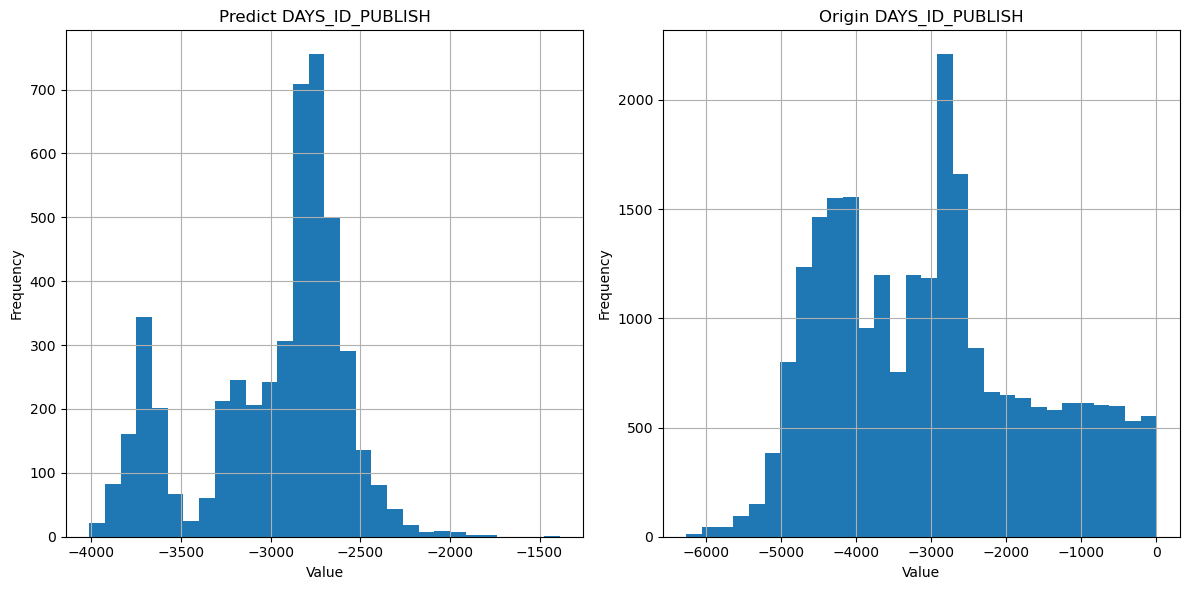

24000
17854
Epoch 1/32
447/447 [==============================] - 1s 941us/step - loss: 1.2150 - mean_squared_error: 1.1548 - val_loss: 1.0542 - val_mean_squared_error: 0.9959
Epoch 2/32
447/447 [==============================] - 0s 786us/step - loss: 1.1028 - mean_squared_error: 1.0463 - val_loss: 1.0486 - val_mean_squared_error: 0.9940
Epoch 3/32
447/447 [==============================] - 0s 786us/step - loss: 1.0725 - mean_squared_error: 1.0196 - val_loss: 1.0344 - val_mean_squared_error: 0.9834
Epoch 4/32
447/447 [==============================] - 0s 790us/step - loss: 1.0596 - mean_squared_error: 1.0105 - val_loss: 1.0276 - val_mean_squared_error: 0.9804
Epoch 5/32
447/447 [==============================] - 0s 789us/step - loss: 1.0490 - mean_squared_error: 1.0037 - val_loss: 1.0184 - val_mean_squared_error: 0.9750
Epoch 6/32
447/447 [==============================] - 0s 840us/step - loss: 1.0355 - mean_squared_error: 0.9940 - val_loss: 1.0137 - val_mean_squared_error: 0.9741
Epoc

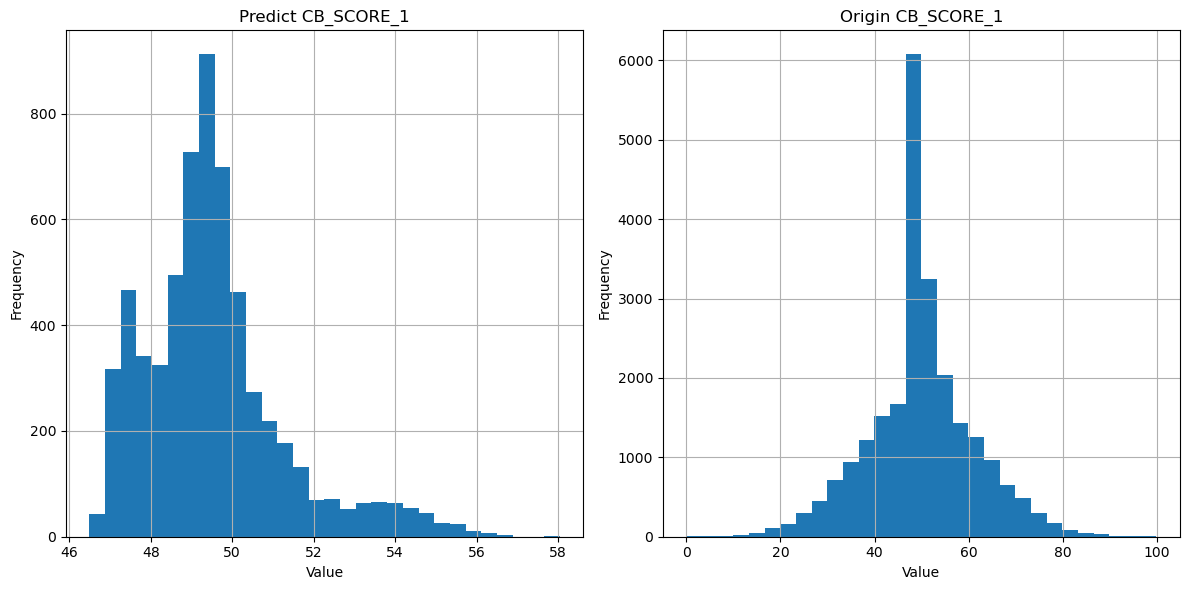

24000
15726
Epoch 1/32
394/394 [==============================] - 1s 970us/step - loss: 1.1957 - mean_squared_error: 1.1349 - val_loss: 1.0534 - val_mean_squared_error: 0.9943
Epoch 2/32
394/394 [==============================] - 0s 794us/step - loss: 1.0910 - mean_squared_error: 1.0336 - val_loss: 1.0499 - val_mean_squared_error: 0.9942
Epoch 3/32
394/394 [==============================] - 0s 791us/step - loss: 1.0678 - mean_squared_error: 1.0139 - val_loss: 1.0406 - val_mean_squared_error: 0.9885
Epoch 4/32
394/394 [==============================] - 0s 797us/step - loss: 1.0551 - mean_squared_error: 1.0046 - val_loss: 1.0277 - val_mean_squared_error: 0.9789
Epoch 5/32
394/394 [==============================] - 0s 793us/step - loss: 1.0390 - mean_squared_error: 0.9919 - val_loss: 1.0228 - val_mean_squared_error: 0.9773
Epoch 6/32
394/394 [==============================] - 0s 792us/step - loss: 1.0338 - mean_squared_error: 0.9901 - val_loss: 1.0161 - val_mean_squared_error: 0.9742
Epoc

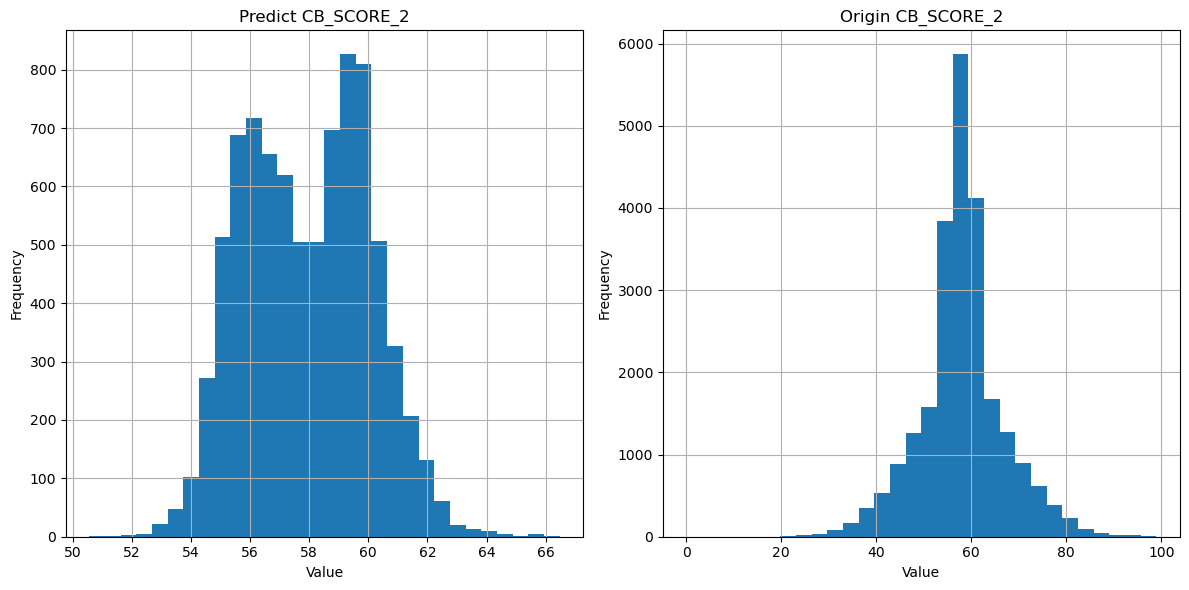

24000
16892
Epoch 1/32
423/423 [==============================] - 1s 955us/step - loss: 1.1746 - mean_squared_error: 1.1131 - val_loss: 1.0279 - val_mean_squared_error: 0.9682
Epoch 2/32
423/423 [==============================] - 0s 789us/step - loss: 1.0874 - mean_squared_error: 1.0297 - val_loss: 1.0215 - val_mean_squared_error: 0.9657
Epoch 3/32
423/423 [==============================] - 0s 787us/step - loss: 1.0521 - mean_squared_error: 0.9983 - val_loss: 1.0089 - val_mean_squared_error: 0.9572
Epoch 4/32
423/423 [==============================] - 0s 789us/step - loss: 1.0406 - mean_squared_error: 0.9910 - val_loss: 1.0077 - val_mean_squared_error: 0.9602
Epoch 5/32
423/423 [==============================] - 0s 858us/step - loss: 1.0311 - mean_squared_error: 0.9858 - val_loss: 0.9979 - val_mean_squared_error: 0.9547
Epoch 6/32
423/423 [==============================] - 0s 785us/step - loss: 1.0239 - mean_squared_error: 0.9829 - val_loss: 0.9934 - val_mean_squared_error: 0.9545
Epoc

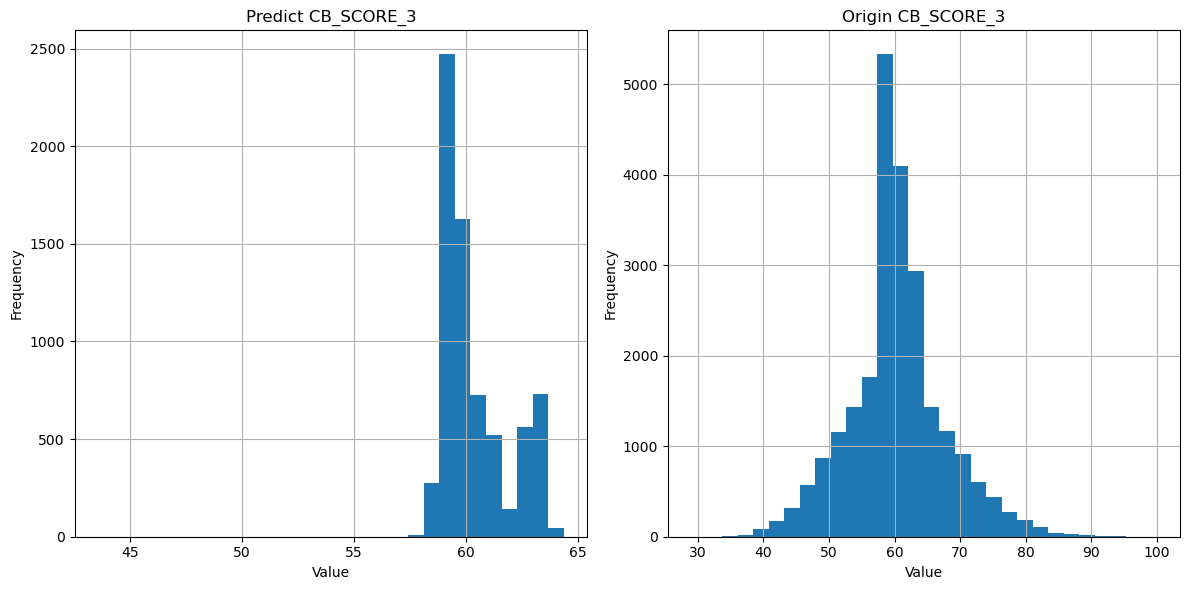

24000
19251
Epoch 1/32
482/482 [==============================] - 1s 927us/step - loss: 0.9518 - mean_squared_error: 0.8890 - val_loss: 0.7010 - val_mean_squared_error: 0.6400
Epoch 2/32
482/482 [==============================] - 0s 788us/step - loss: 0.7048 - mean_squared_error: 0.6455 - val_loss: 0.6352 - val_mean_squared_error: 0.5778
Epoch 3/32
482/482 [==============================] - 0s 785us/step - loss: 0.6346 - mean_squared_error: 0.5792 - val_loss: 0.6276 - val_mean_squared_error: 0.5742
Epoch 4/32
482/482 [==============================] - 0s 831us/step - loss: 0.6093 - mean_squared_error: 0.5578 - val_loss: 0.6201 - val_mean_squared_error: 0.5705
Epoch 5/32
482/482 [==============================] - 0s 782us/step - loss: 0.5686 - mean_squared_error: 0.5211 - val_loss: 0.6200 - val_mean_squared_error: 0.5745
Epoch 6/32
482/482 [==============================] - 0s 781us/step - loss: 0.5486 - mean_squared_error: 0.5050 - val_loss: 0.6319 - val_mean_squared_error: 0.5903
Epoc

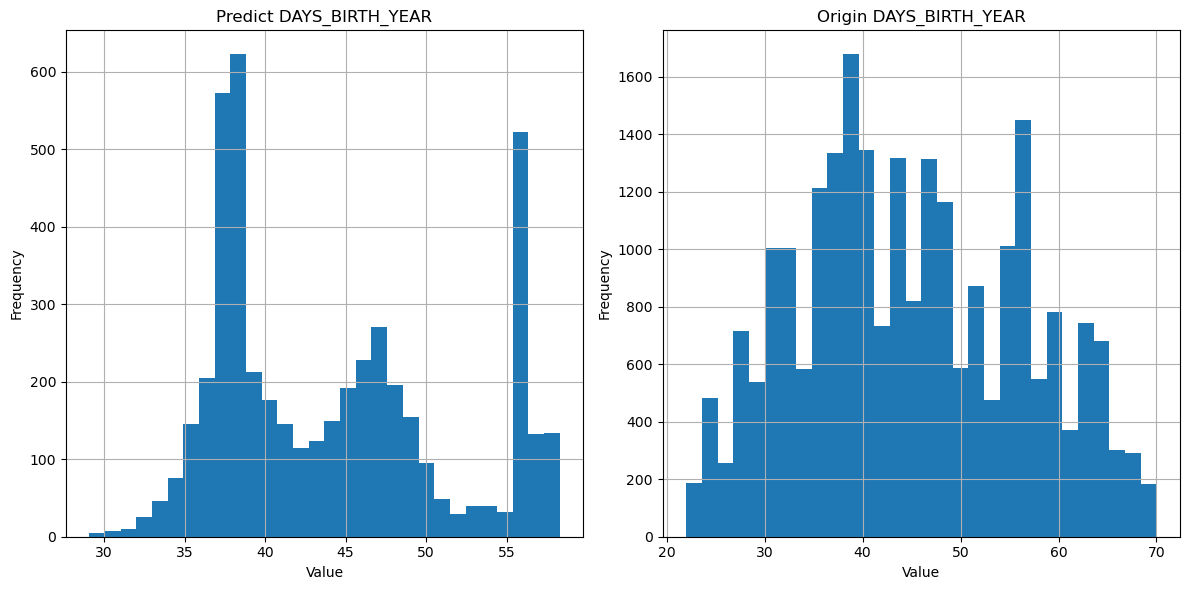

In [17]:
# 예측변수 미사용
# 예측변수를 사용하는 것이 유리하다는 결론

numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA2 = data.copy()
result =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
FILLED_DATA2['CODE_GENDER'] = result['CODE_GENDER']
result = fill_categorical(data, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )
FILLED_DATA2['FLAG_OWN_REALTY'] = result['FLAG_OWN_REALTY']

numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA2)

for i in range(len(missing_values)):
    result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val=missing_values[i] ,epochs_val=32, batch_size_val=32 )
    FILLED_DATA2[missing_values[i]] = result[missing_values[i]]
    
# 샘플로 확인    
# numeric_columns,categorical_columns,missing_values = columns_classification(data)
# result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_1' ,epochs_val=32, batch_size_val=32 )


### 단변량 분석 시각화

In [27]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

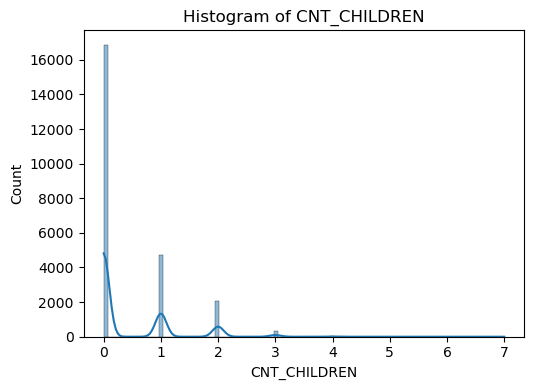

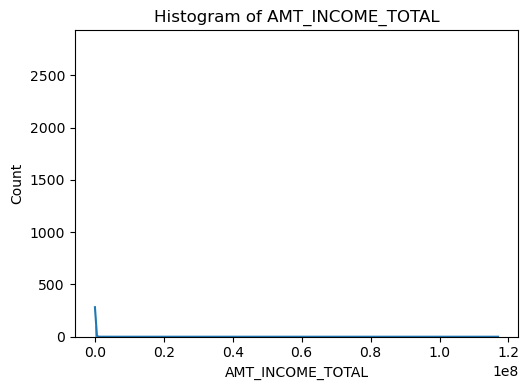

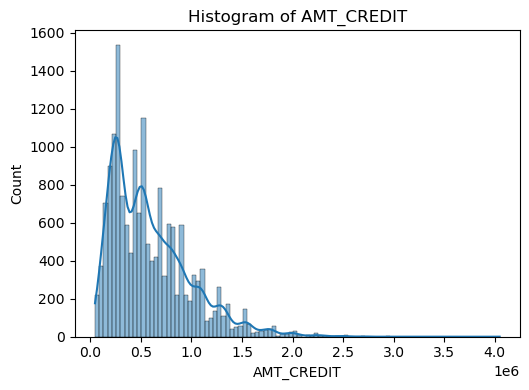

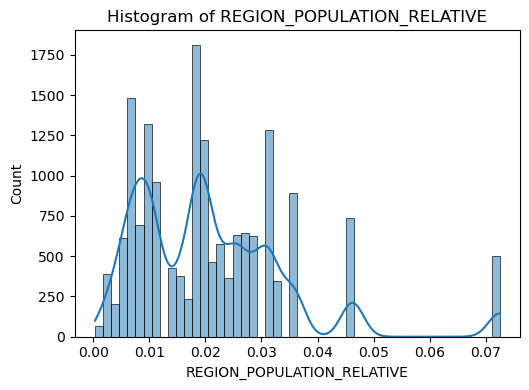

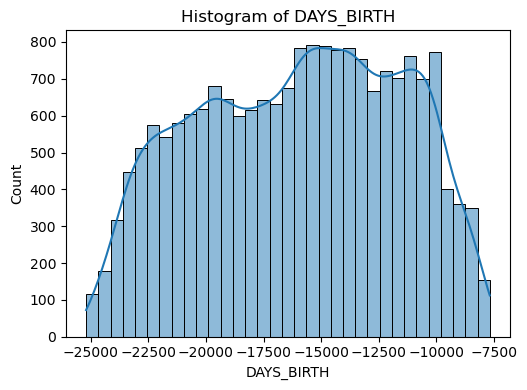

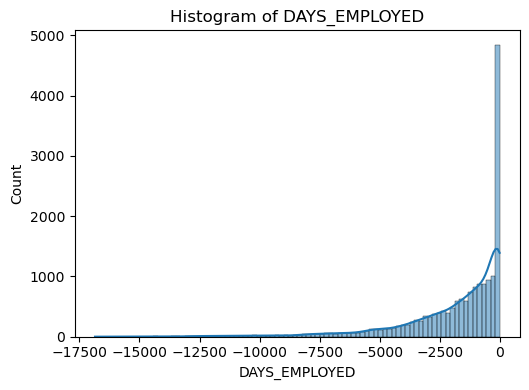

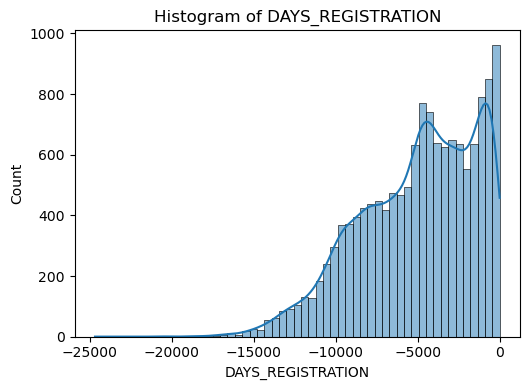

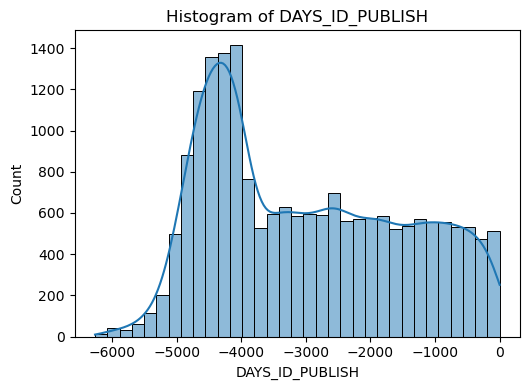

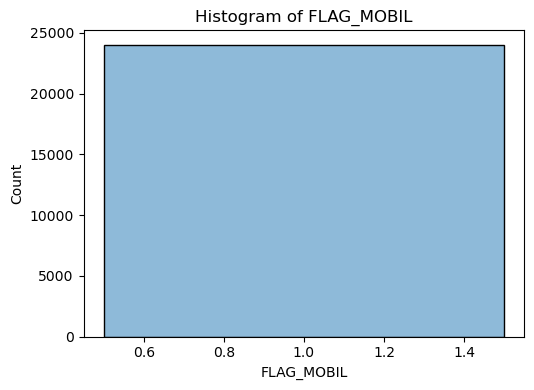

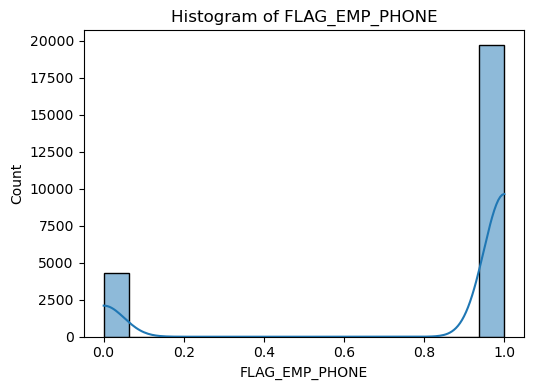

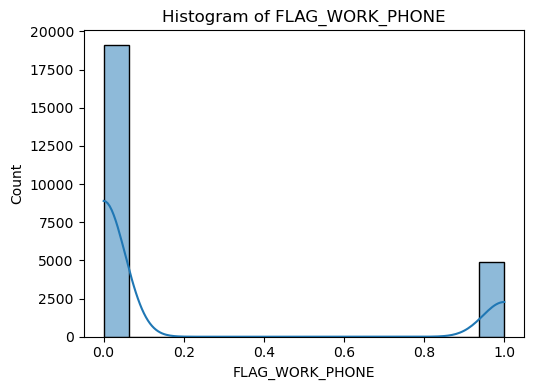

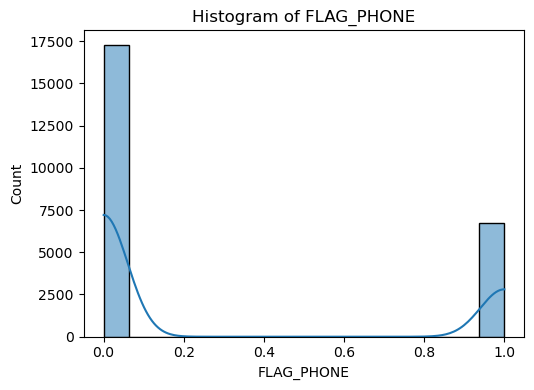

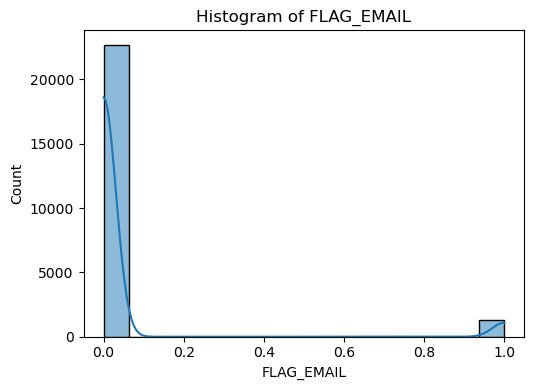

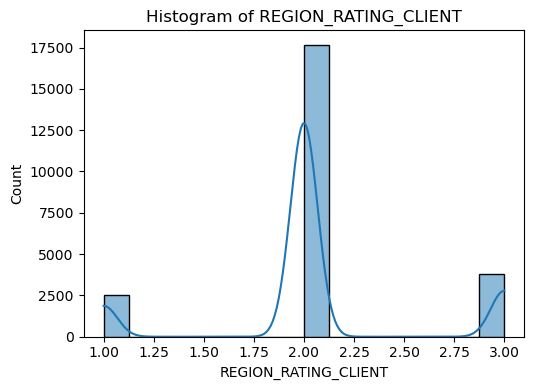

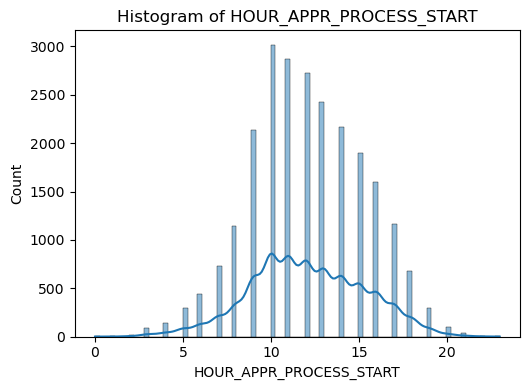

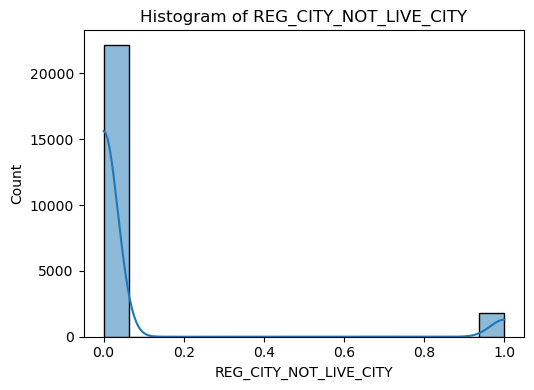

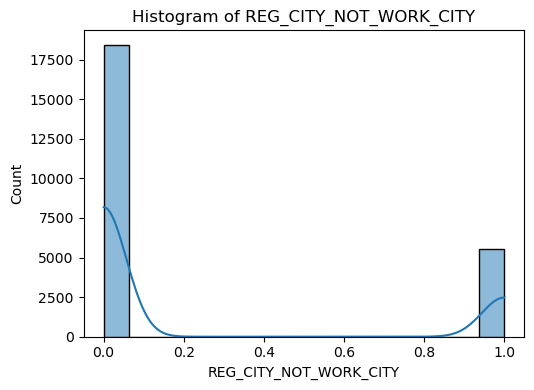

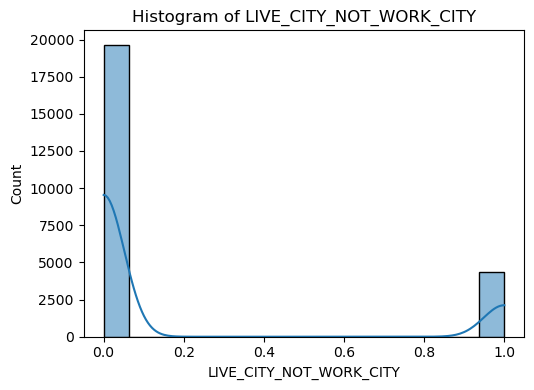

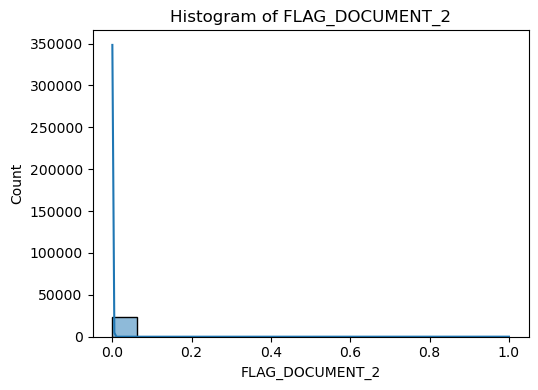

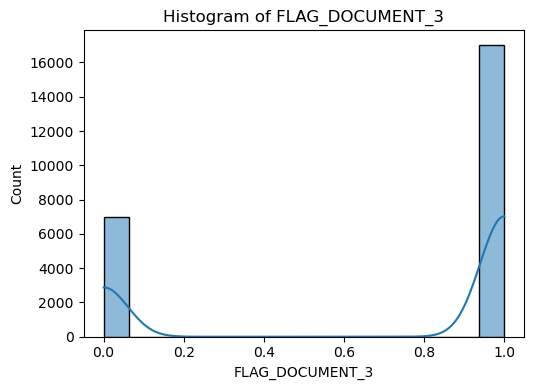

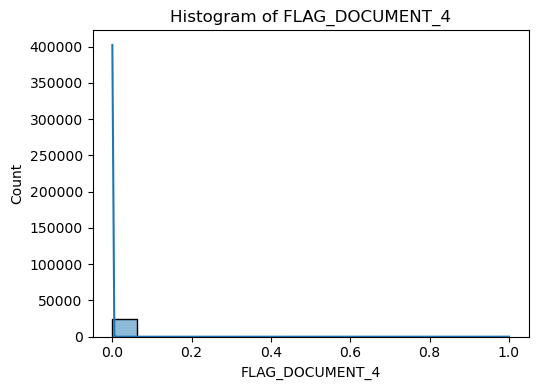

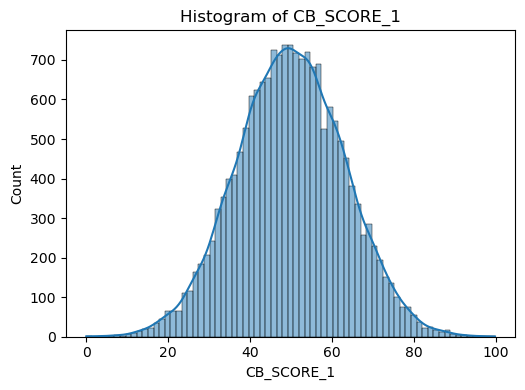

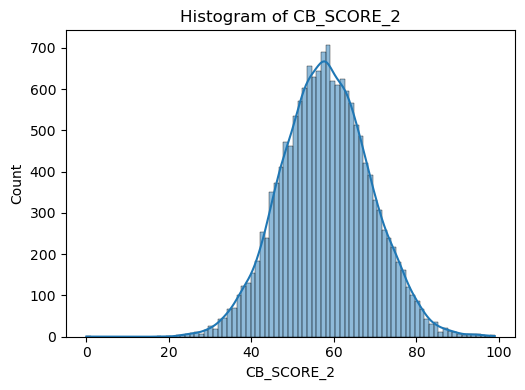

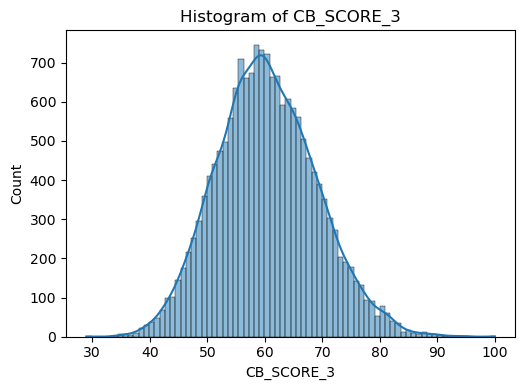

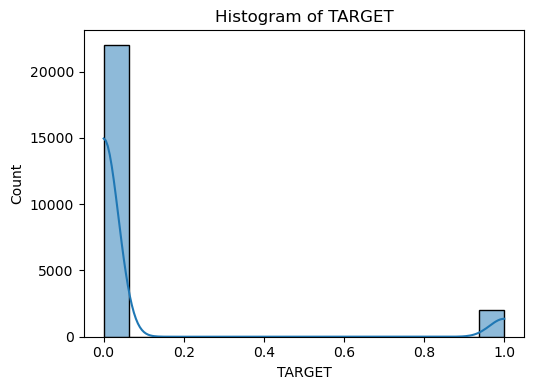

In [28]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

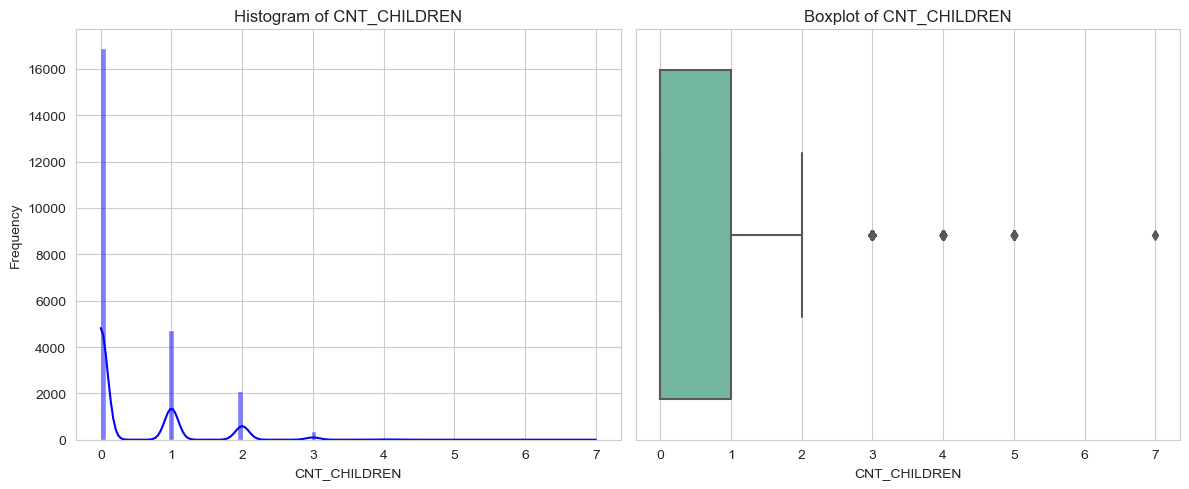

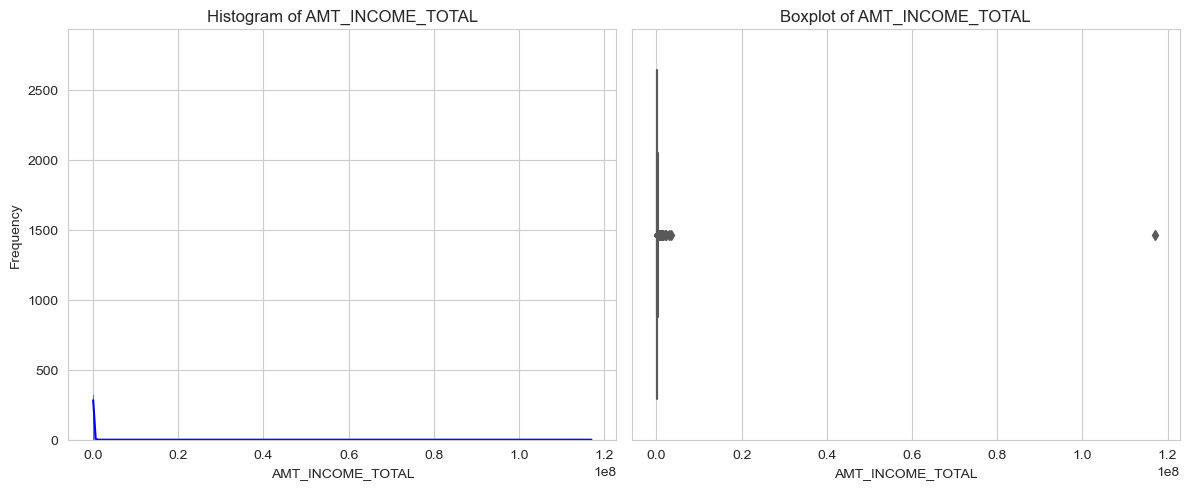

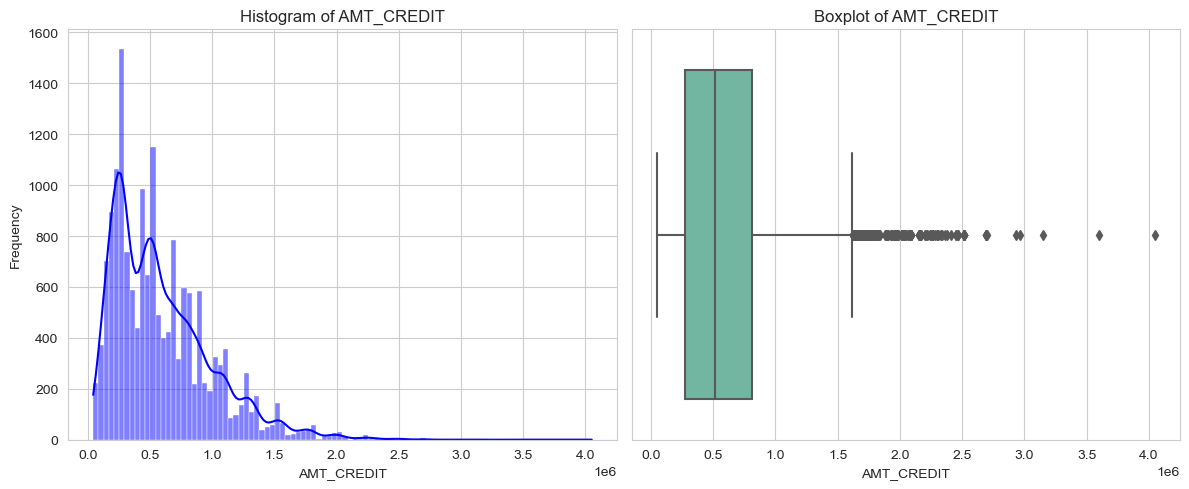

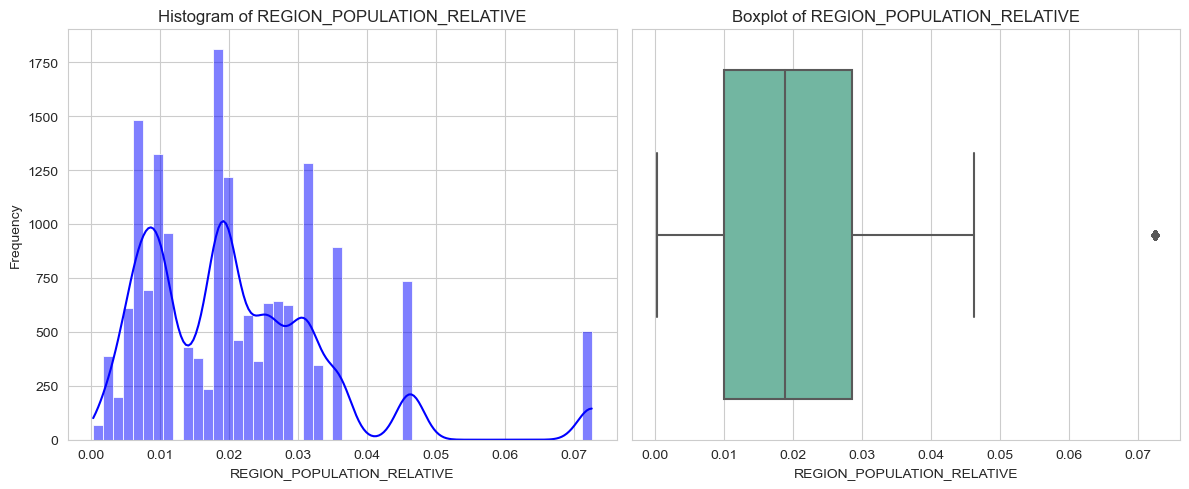

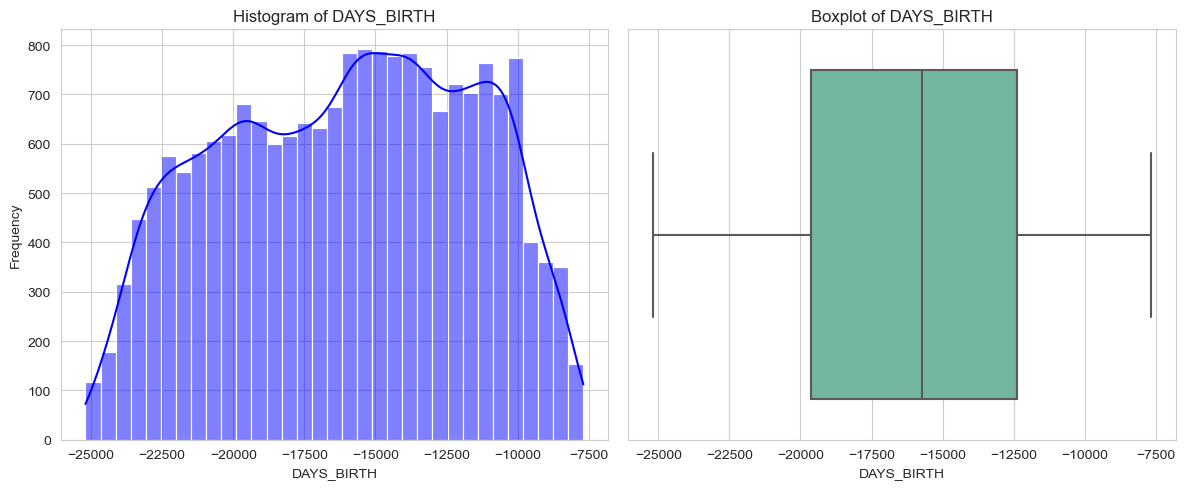

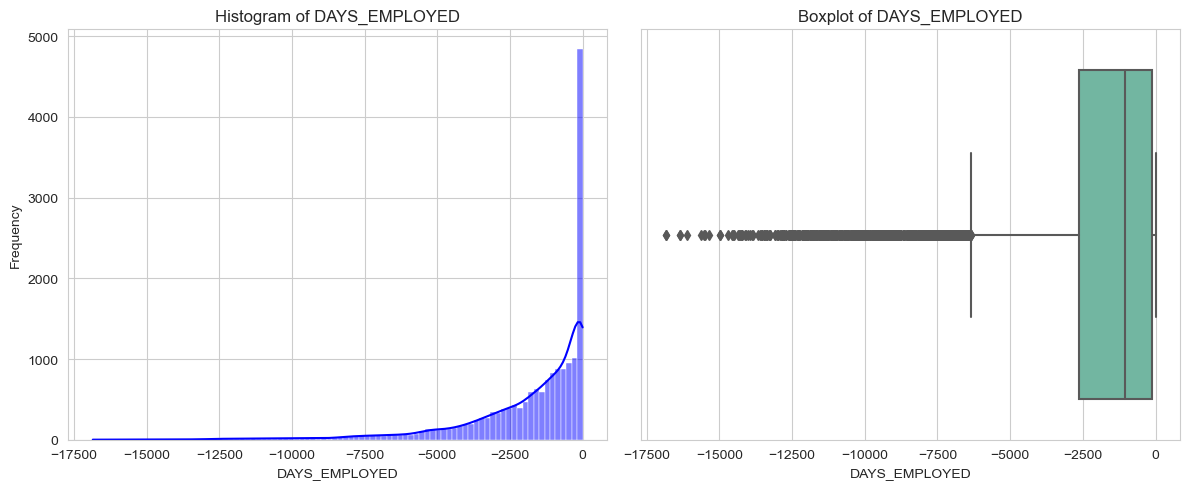

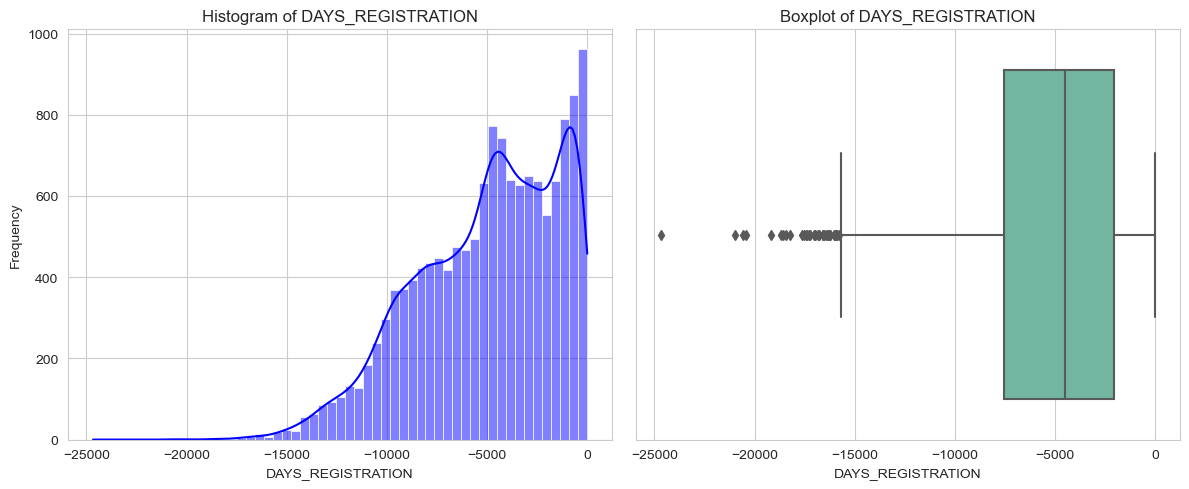

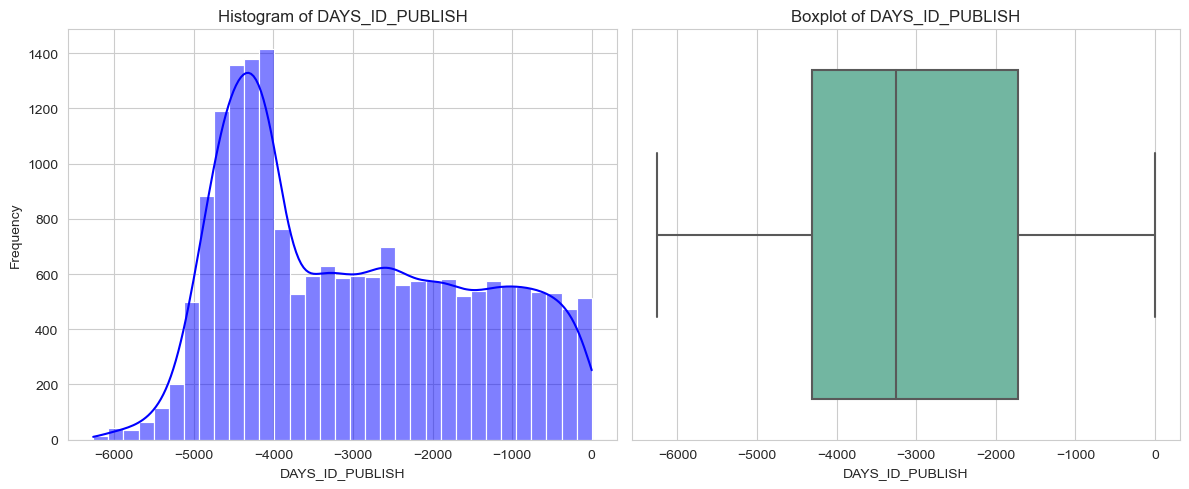

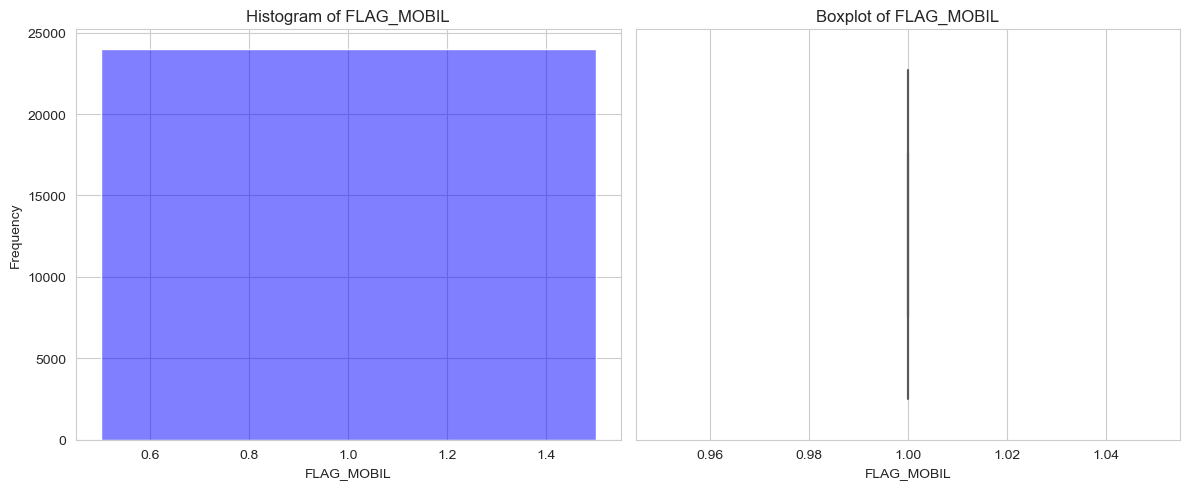

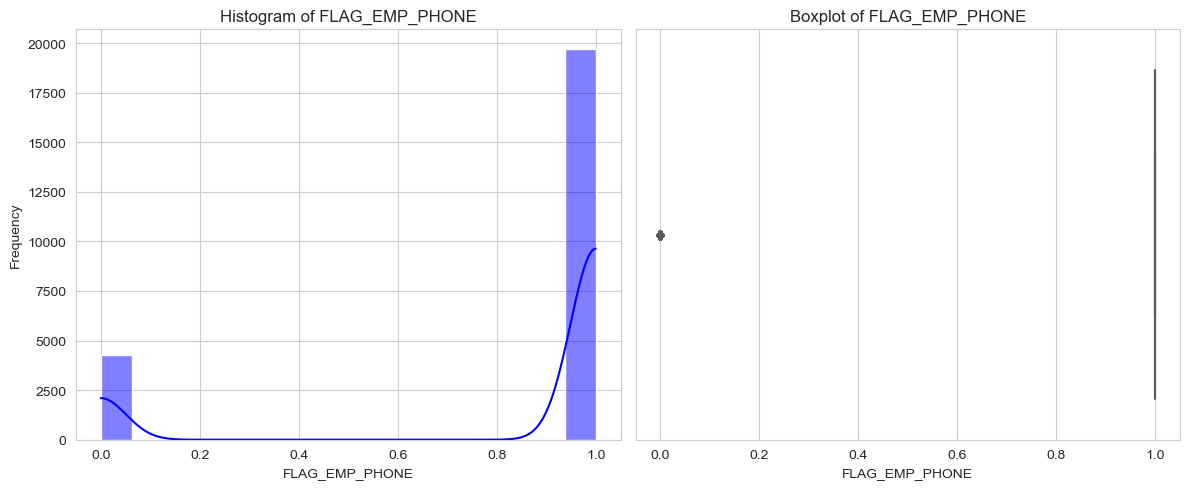

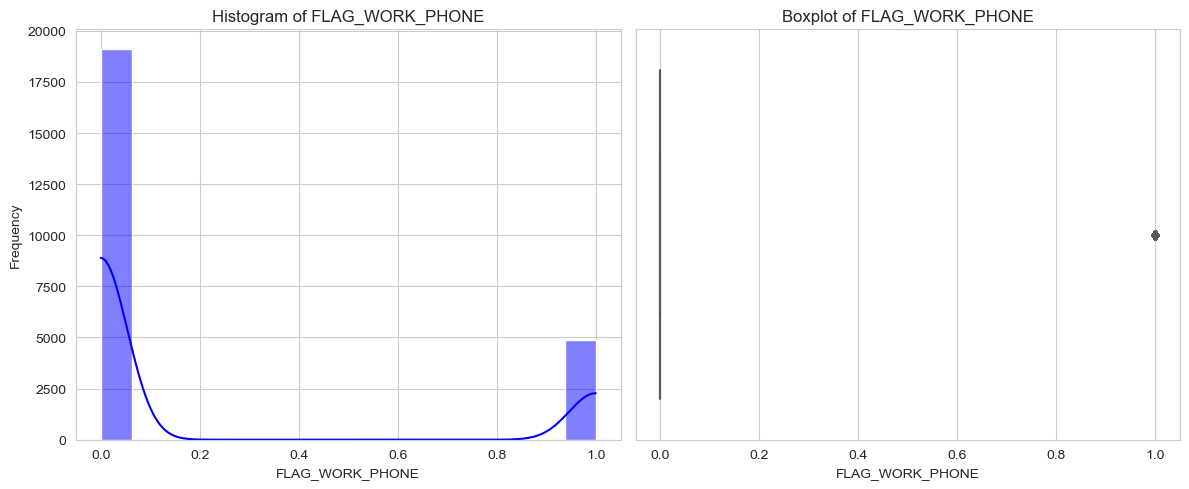

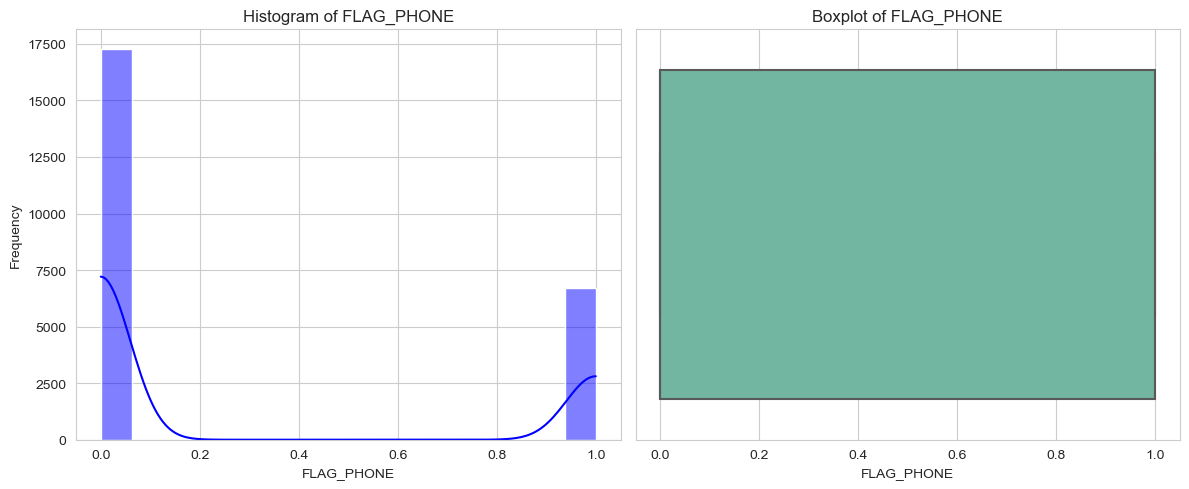

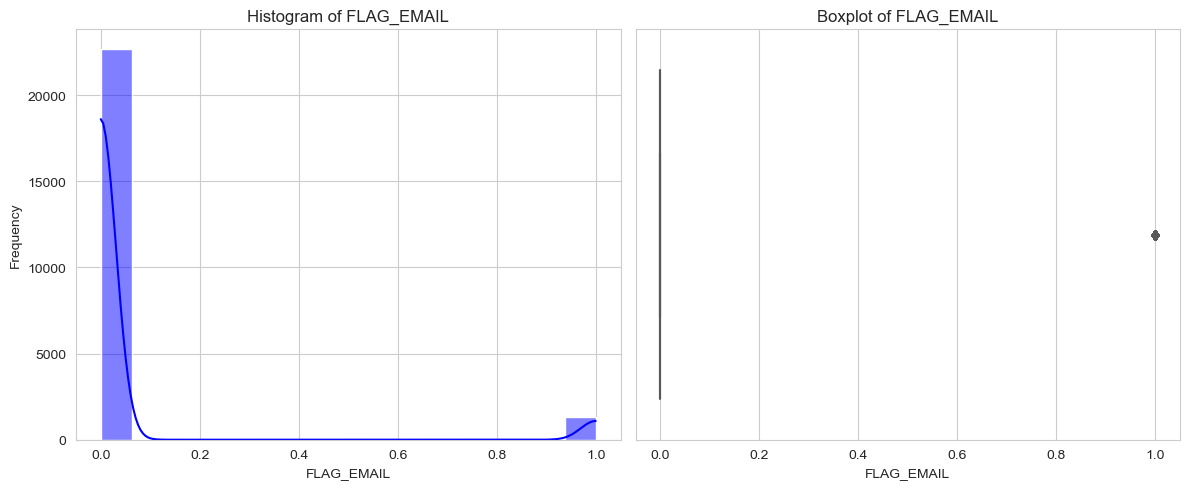

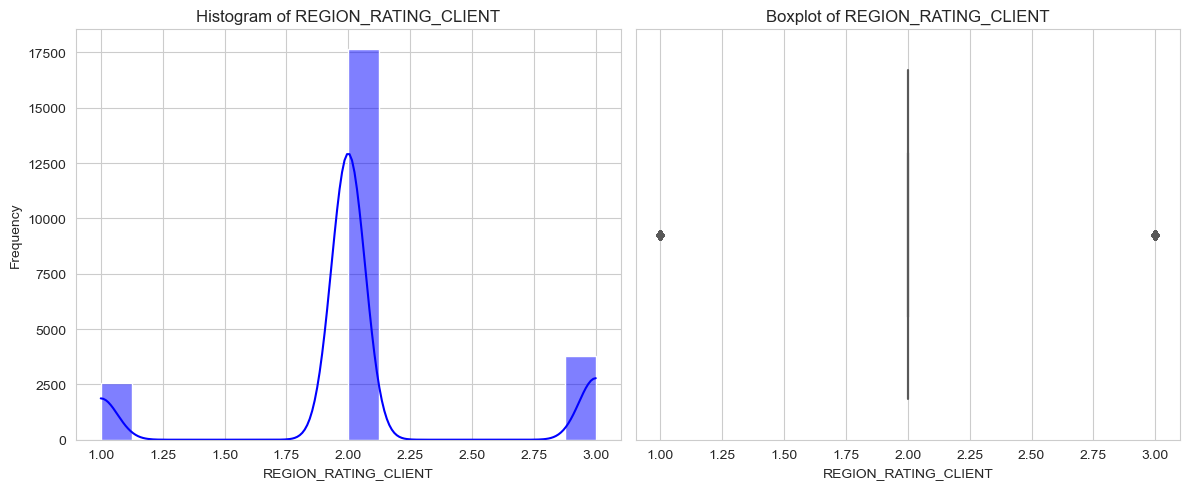

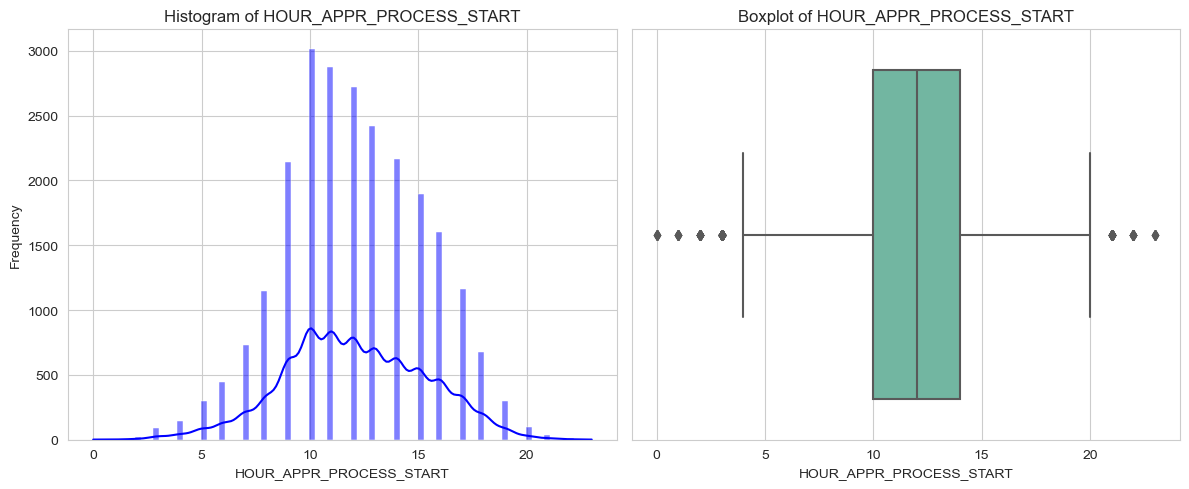

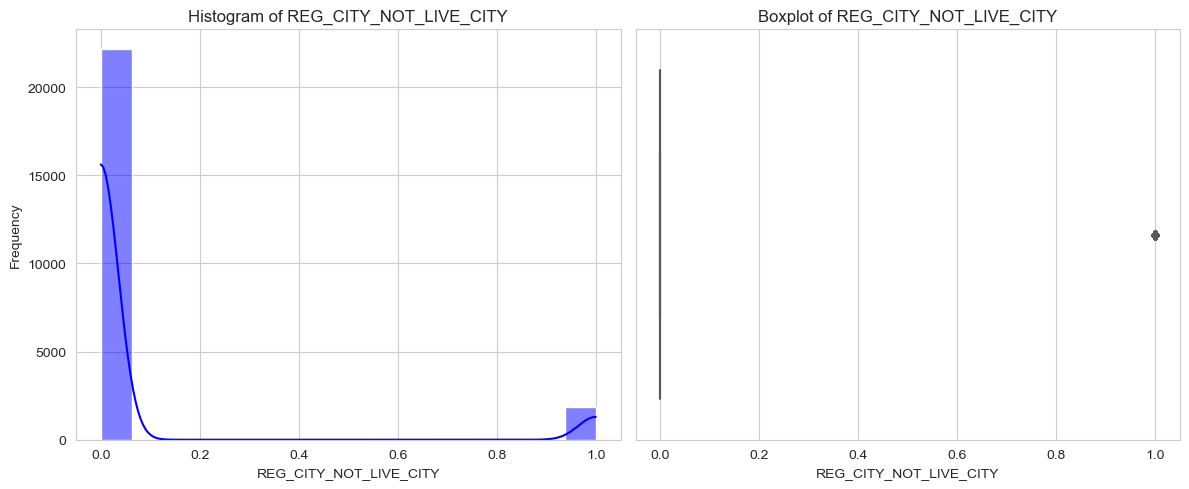

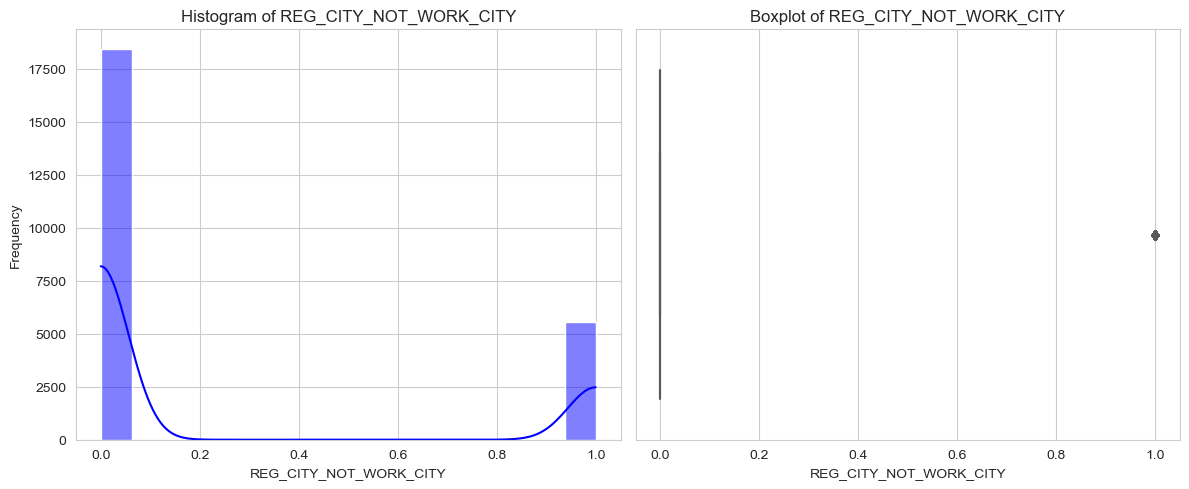

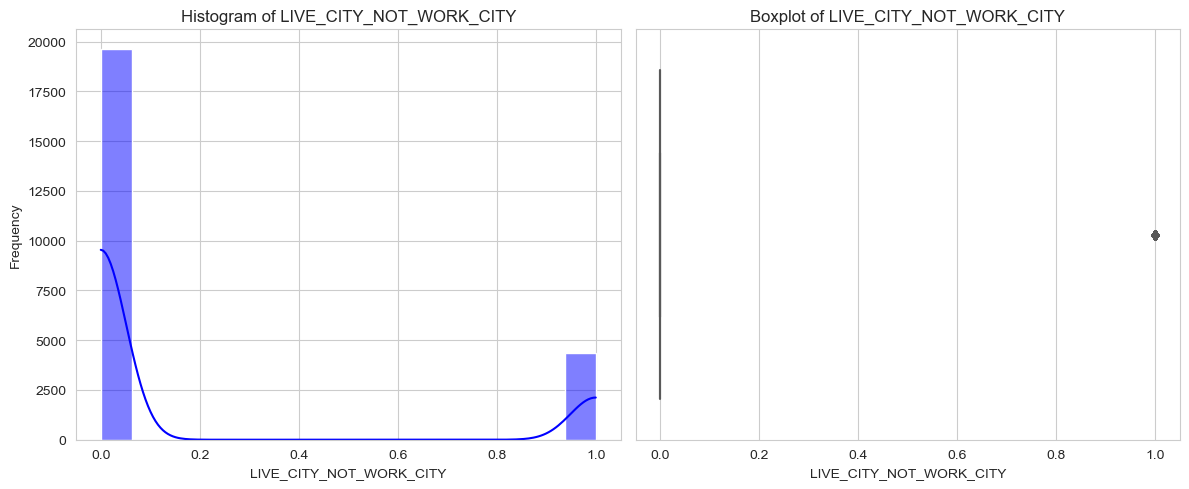

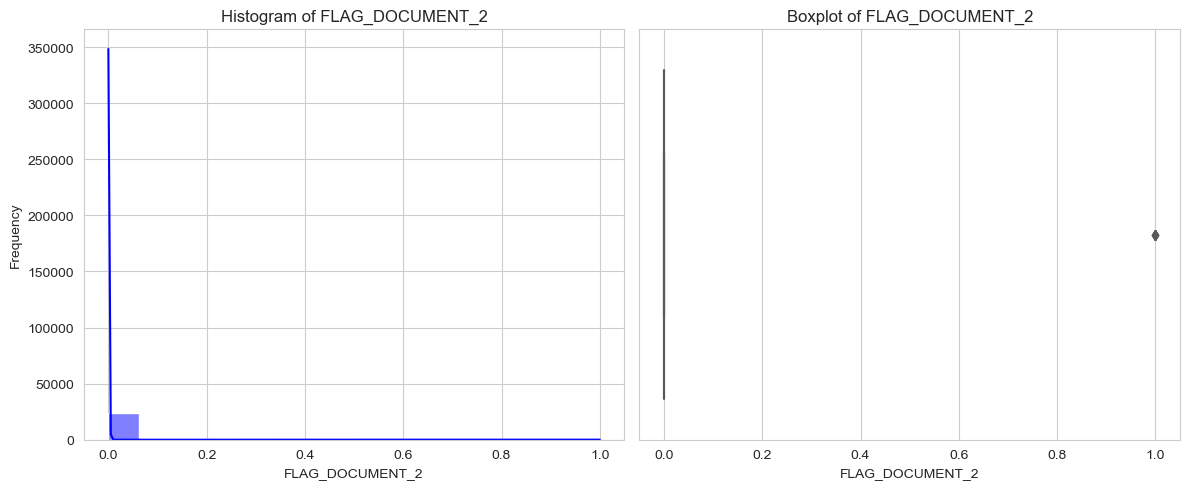

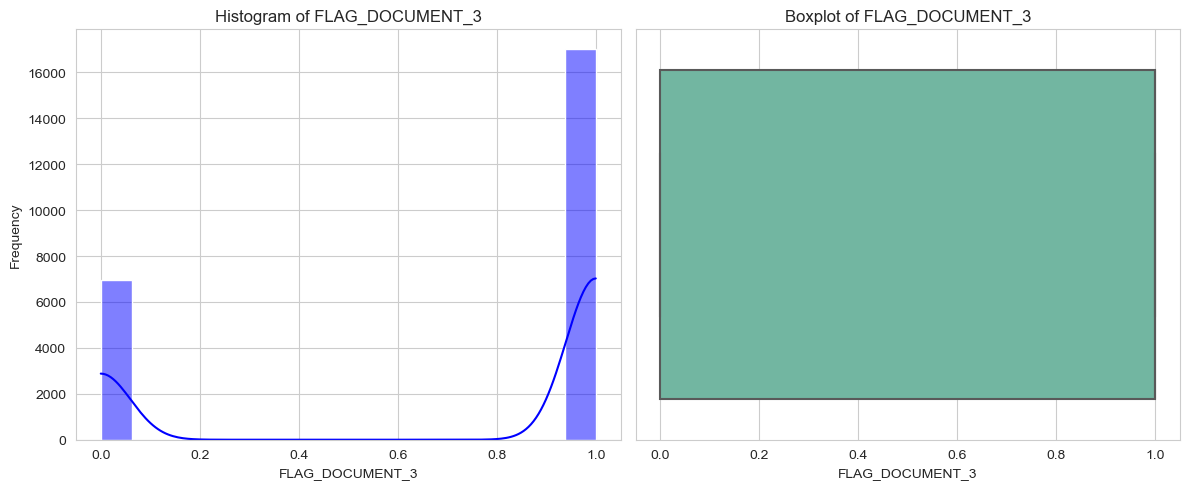

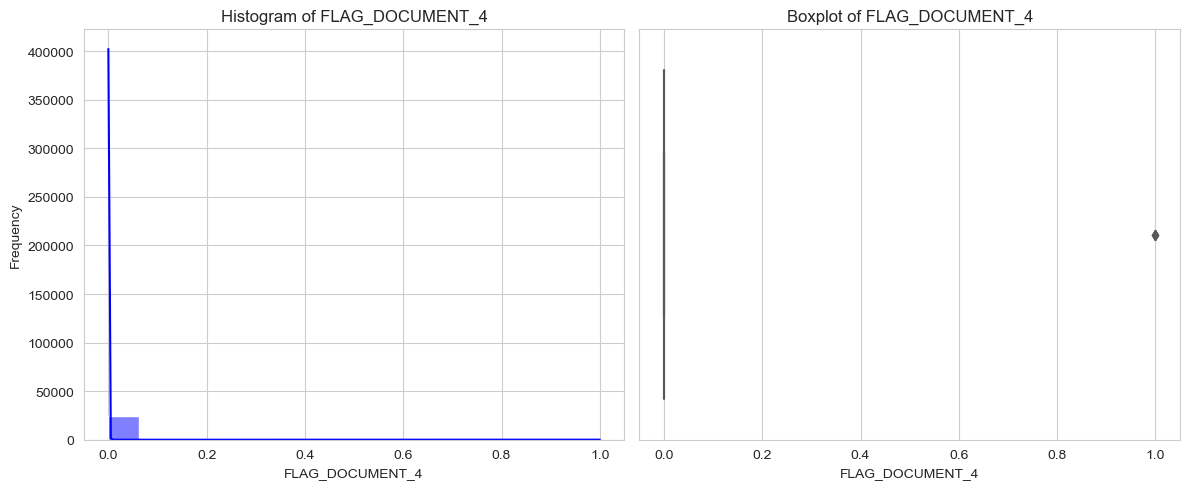

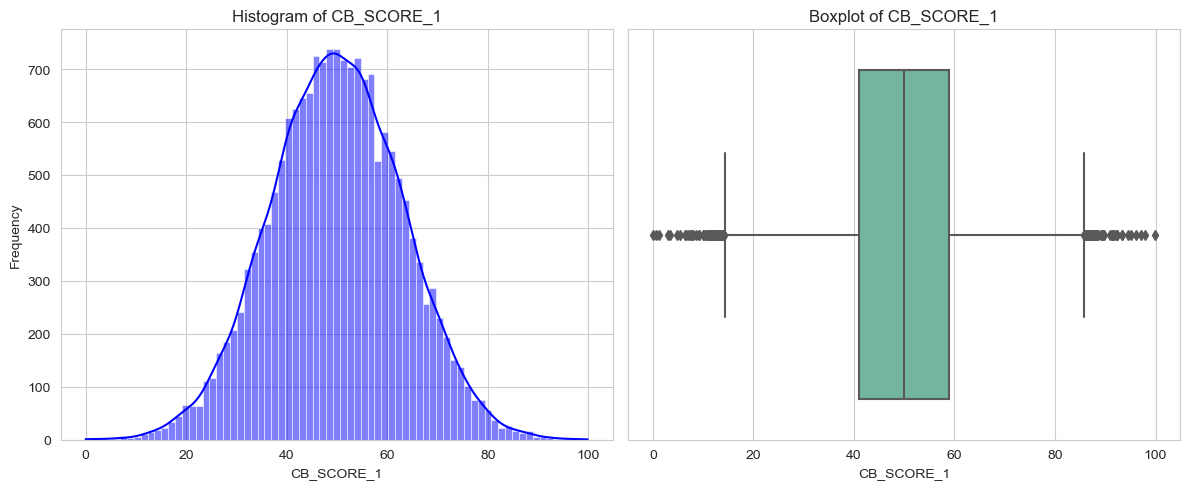

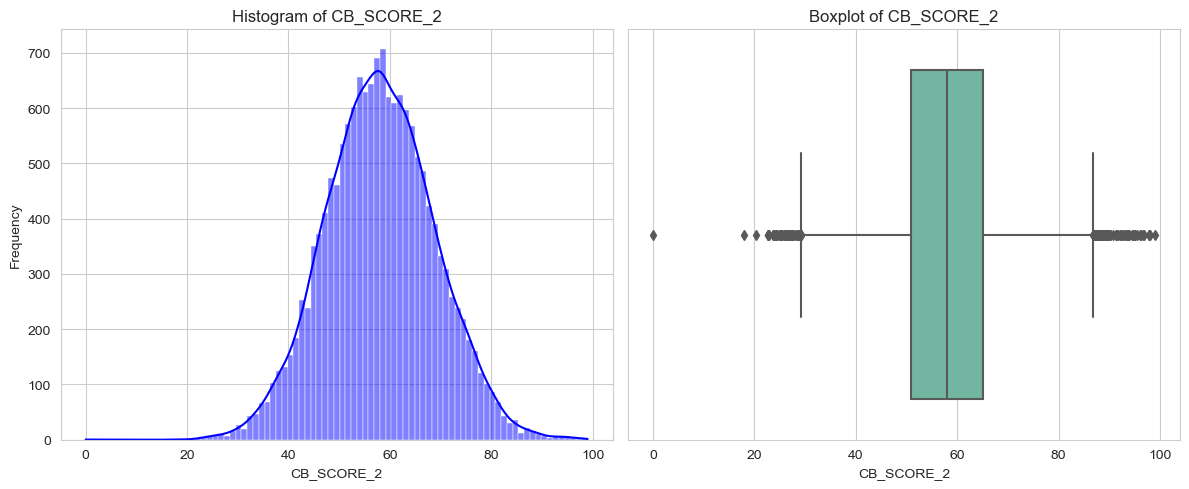

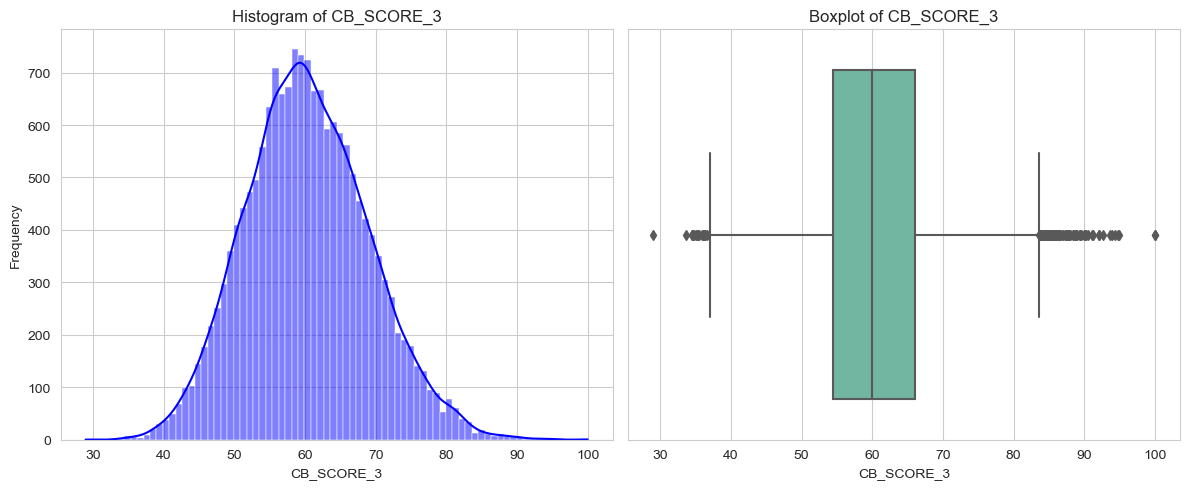

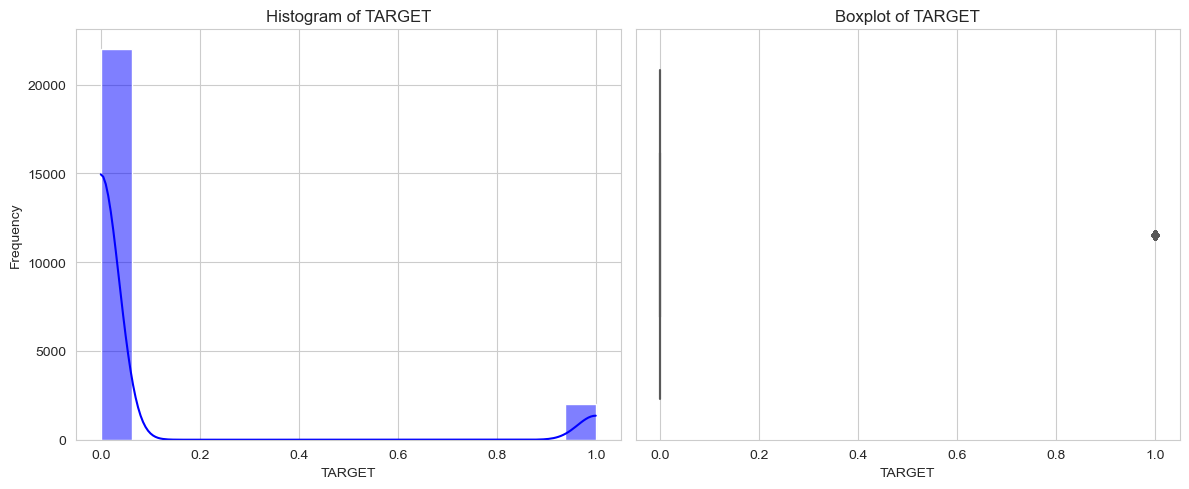

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일

custom_palette = ["blue", "red"]

for column in numeric_columns[1:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # 히스토그램 그리기
    sns.histplot(data=data, x=column, kde=True, ax=axes[0], color=custom_palette[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # 상자 그림 그리기
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

### 1.8 결측치 대체(MI) <a id="s-1.8">

> #### Multiple Imputation을 통한 결측치 대체 진행

## 2. 데이터 시각화  <a id="s-2">

### 2-1. 타겟변수 파악  <a id="s-2.1">

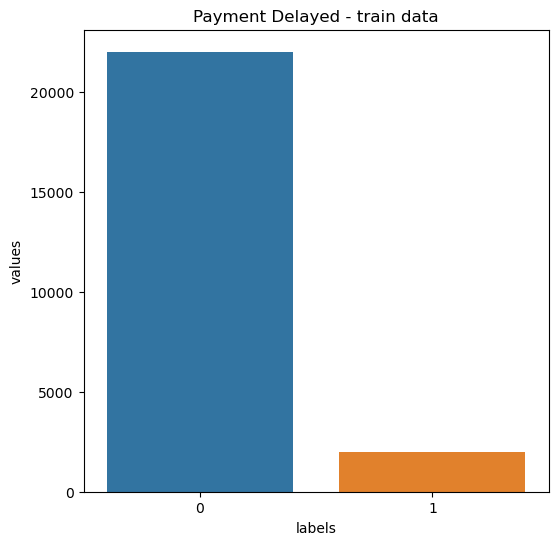

In [45]:
temp = df_adj_mv_fill["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Payment Delayed - train data')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

> #### _<font color = lightseagreen>  0에 해당되는 계좌 : 대출분할 지불이 한번이라도 지연되지 않은 정상 계좌 건. </font>_
> #### _<font color = lightseagreen>  1에 해당되는 계좌 : 지불 지연이 한번이라도 발생된 계좌 건 </font>_  
> #### _<font color = lightseagreen>  각각 계좌건의 상태 별로 특정 변수들과 비추었을때 분포가 어떠한지 파악할 필요가 있음 </font>_

In [46]:
max_values = df_adj_mv_fill.max()
print(max_values)

SK_ID_CURR                                           456228
NAME_CONTRACT_TYPE                          Revolving loans
CODE_GENDER                                               M
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              7
AMT_INCOME_TOTAL                                117000000.0
AMT_CREDIT                                        4050000.0
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                                    Widow
NAME_HOUSING_TYPE                              With parents
REGION_POPULATION_RELATIVE                         0.072508
DAYS_BIRTH                                          -7688.0
DAYS_EMPLOYED                                      365243.0
DAYS_REGISTRATION                                       0.0
DAYS_ID_PUBLISH                                         0.0
FLAG_MOBIL                              

### 2-2. 데이터 유형 구분  <a id="s-2.2">

In [161]:
normal_categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4']
long_categorical_features = ['ORGANIZATION_TYPE']
time_features = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
key_features = ['SK_ID_CURR']
target_features = ['TARGET']

# Combine all non-numerical features into one list
non_numerical_features = normal_categorical_features +long_categorical_features +time_features + key_features + target_features

# Select numerical features by excluding non-numerical ones
numerical_features = [col for col in df_adj_mv_fill.columns if col not in non_numerical_features]
numerical_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [ ]:
numerical_features

### 2-3. 시각화 함수 구성  <a id="s-2.3">

> #### Bar plot (count 및 타겟 여부 ratio) - 범주형 변수에 적용

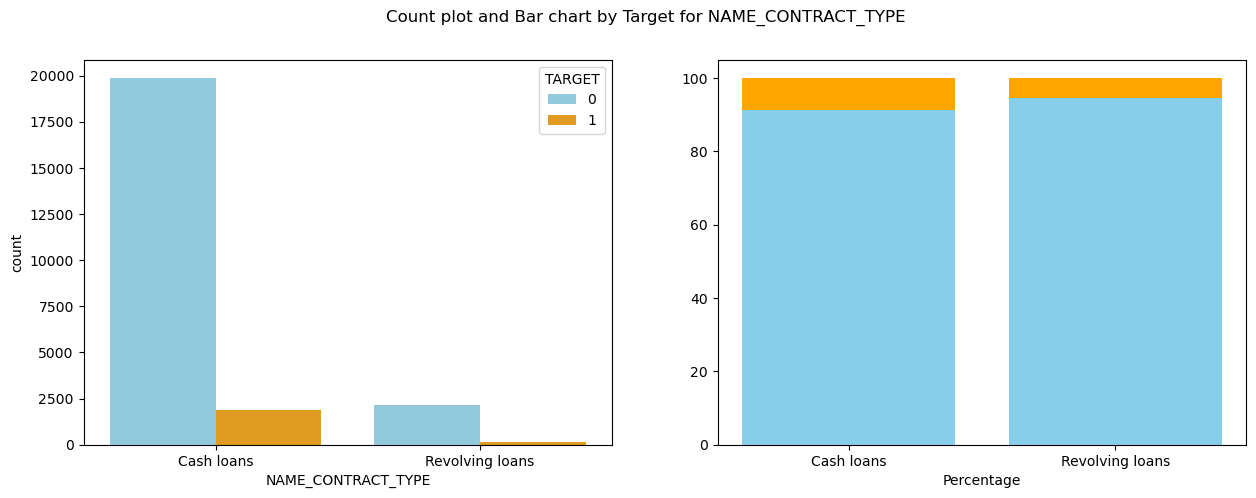

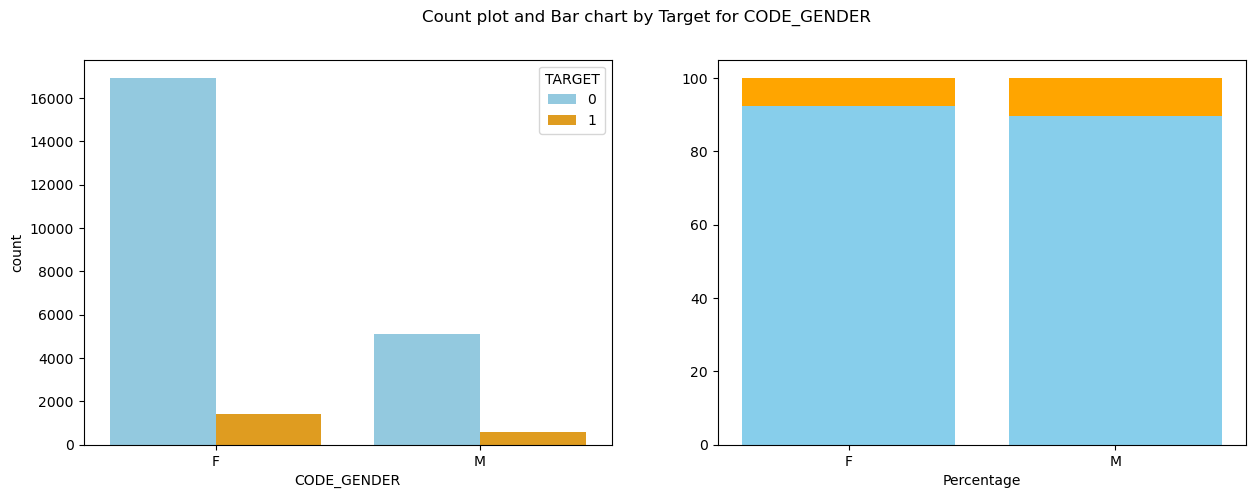

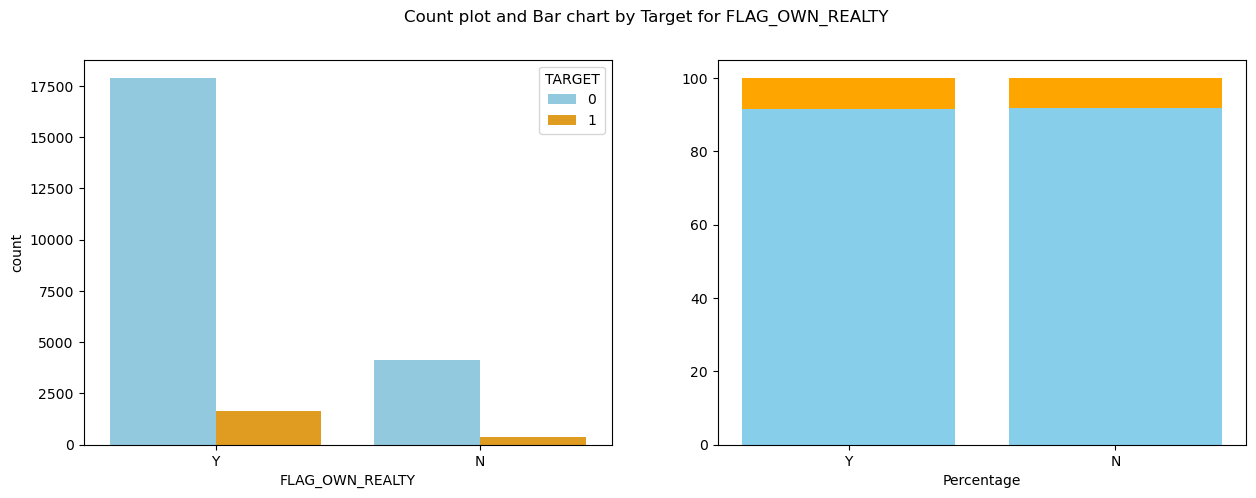

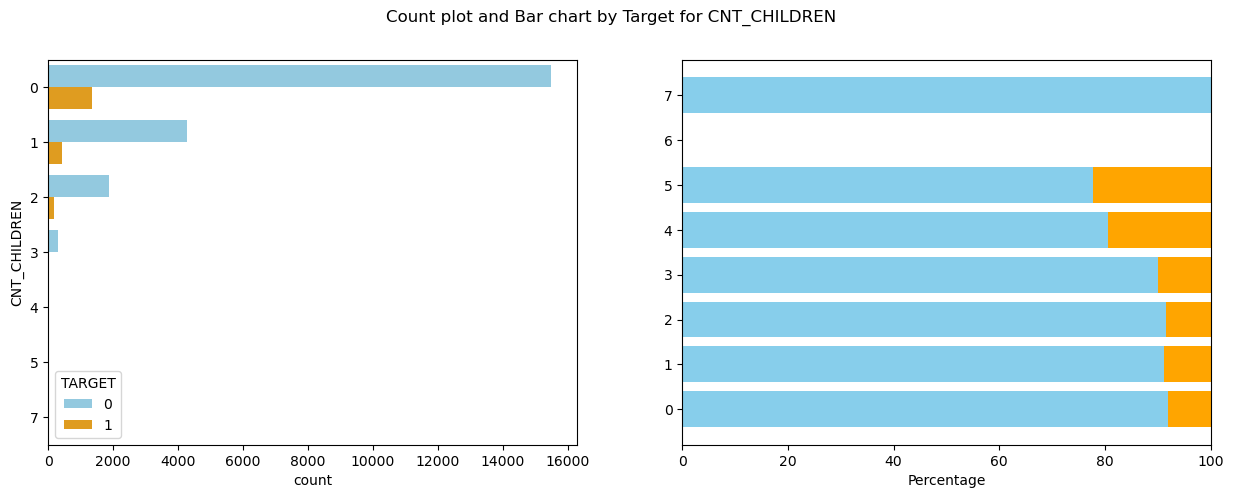

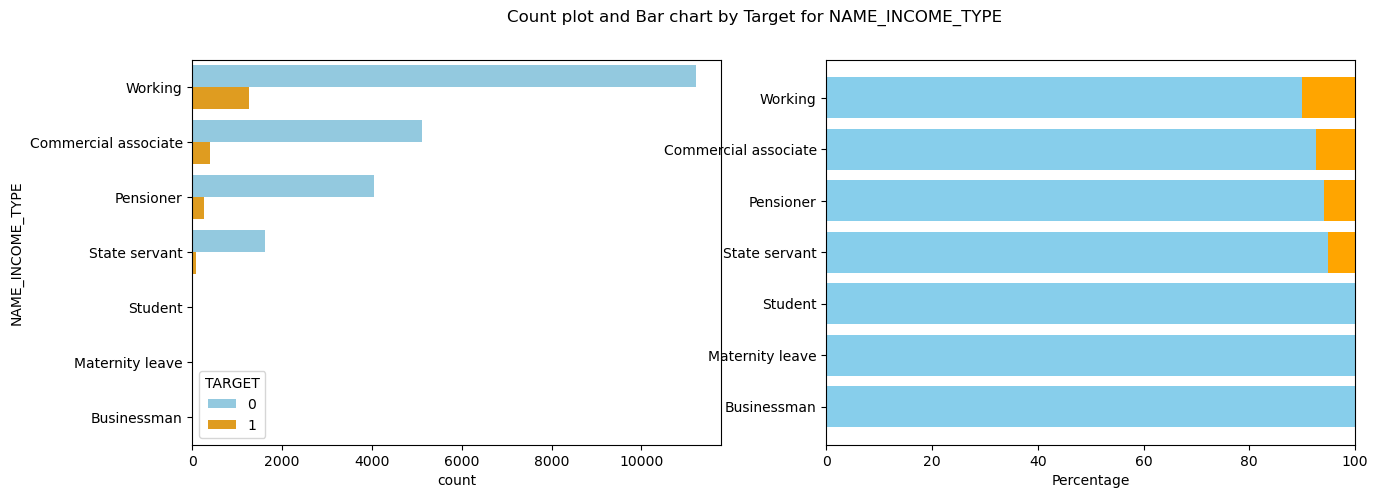

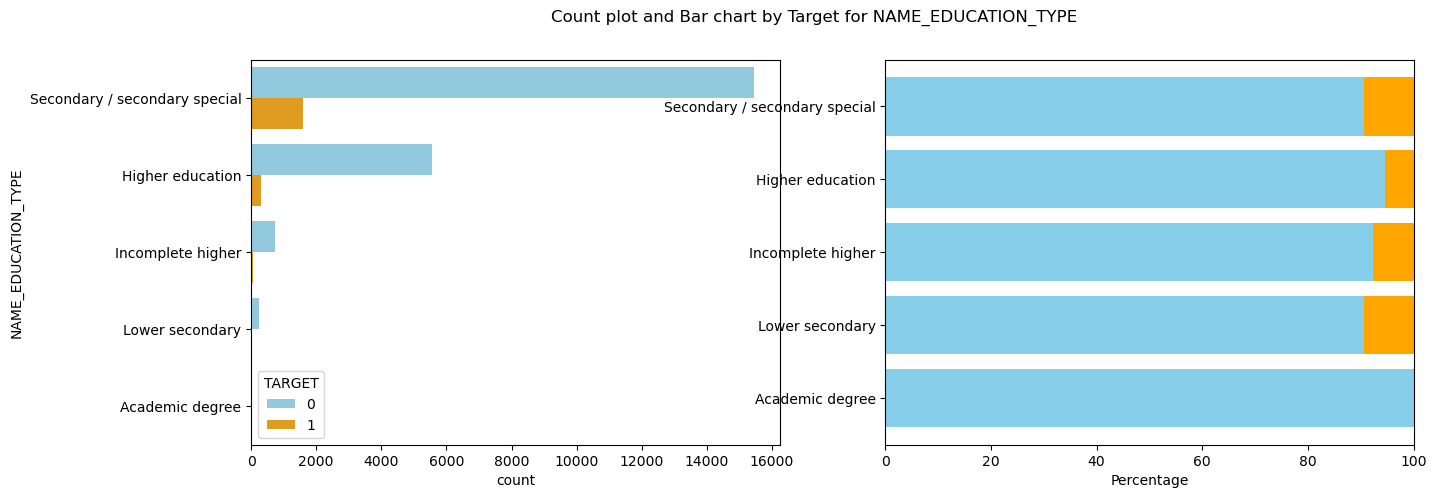

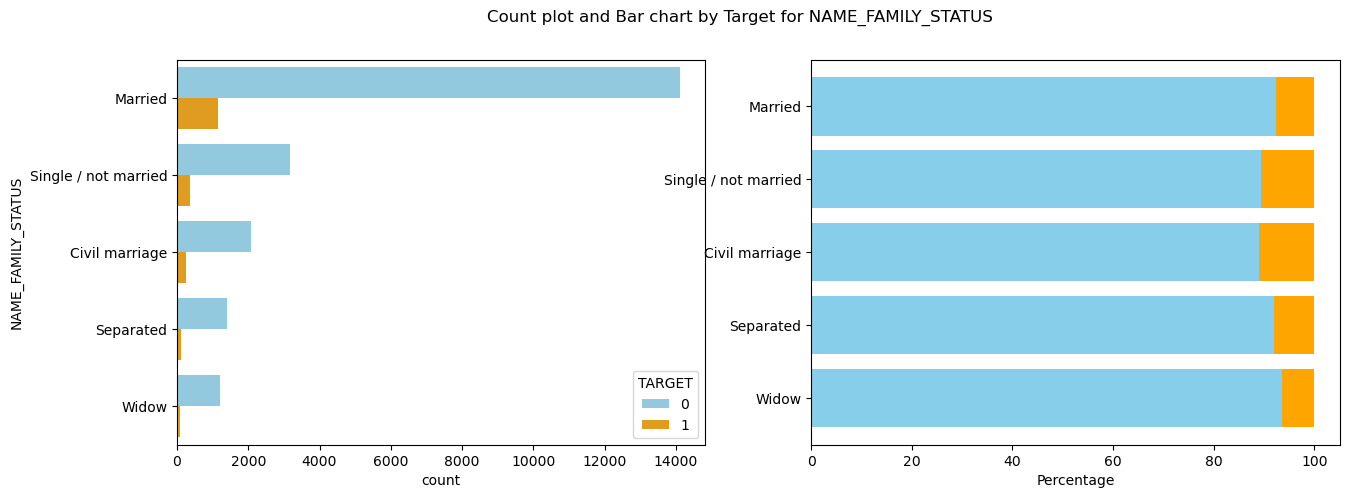

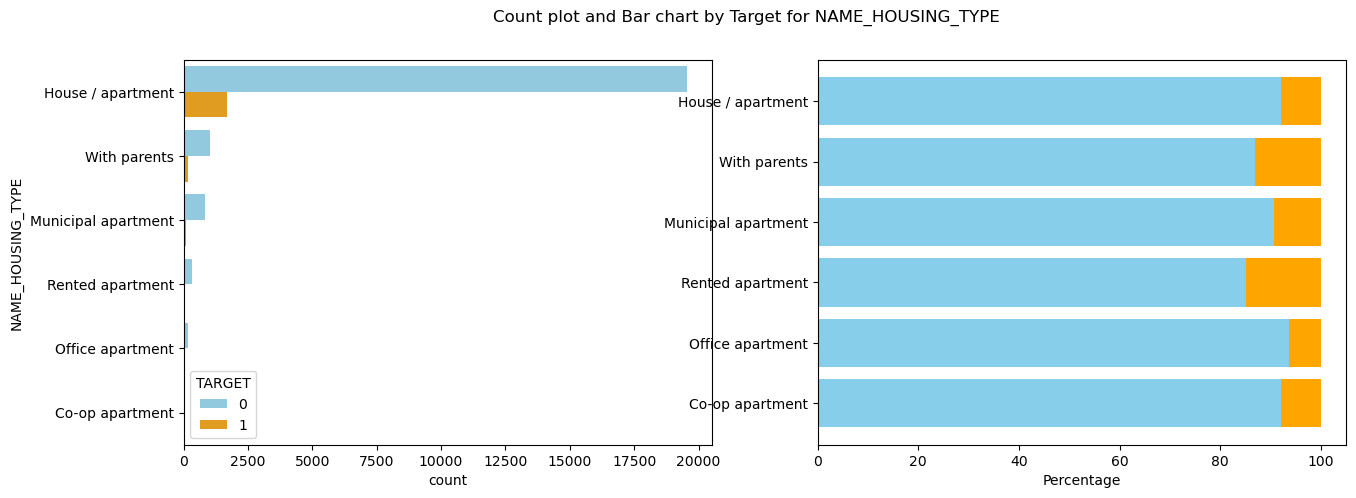

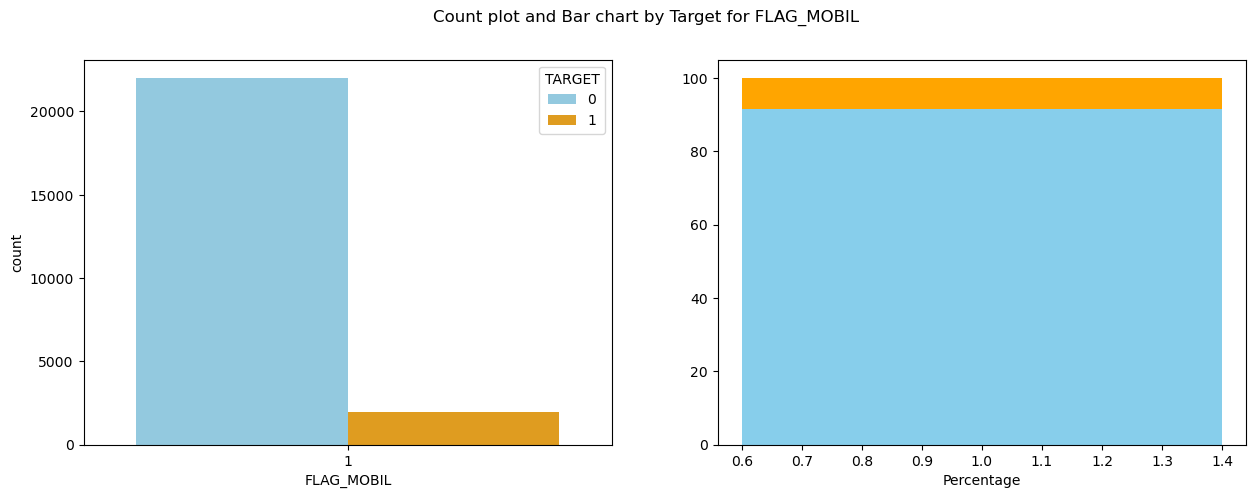

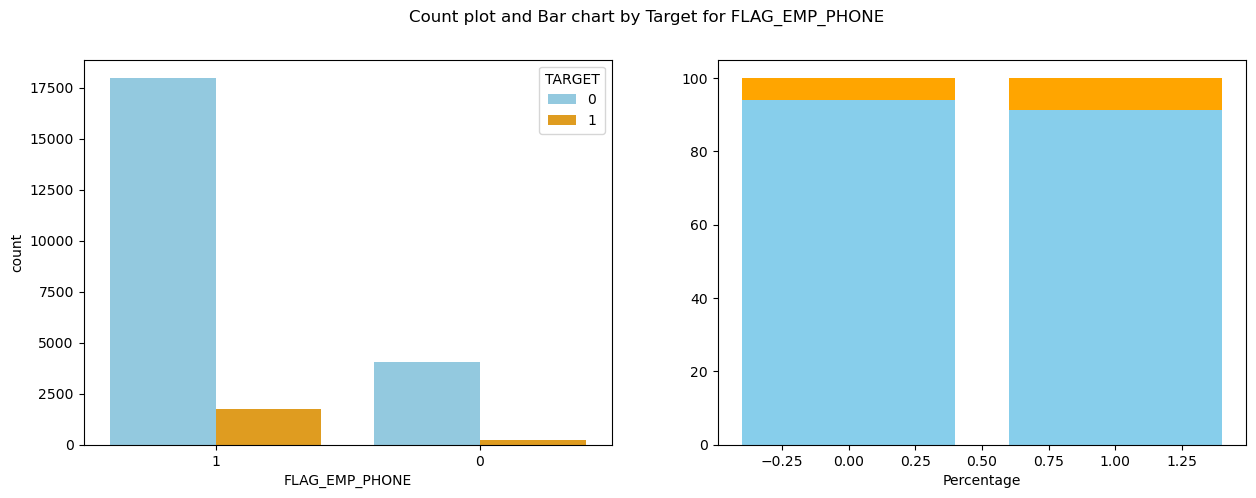

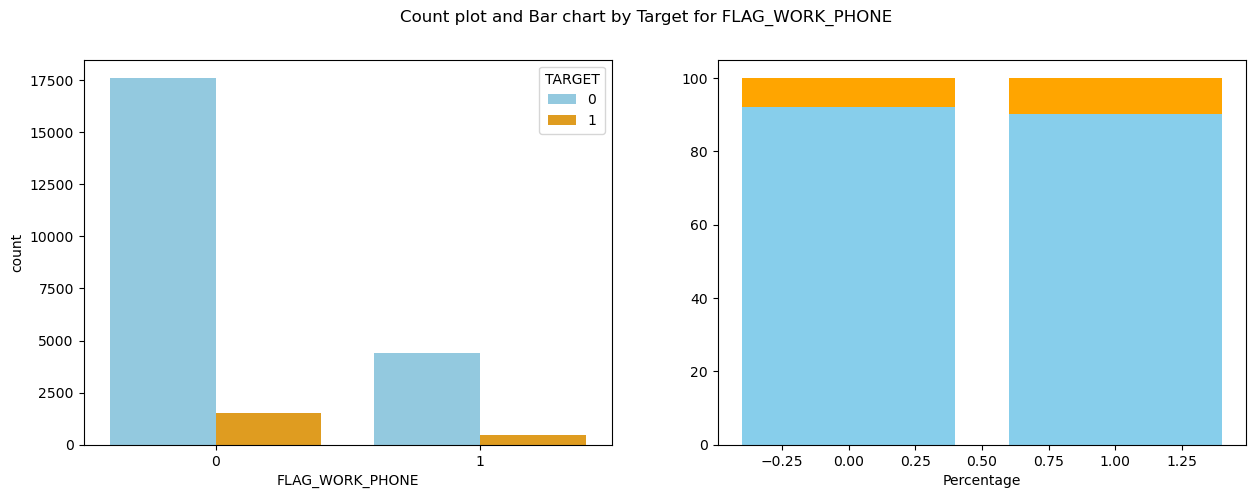

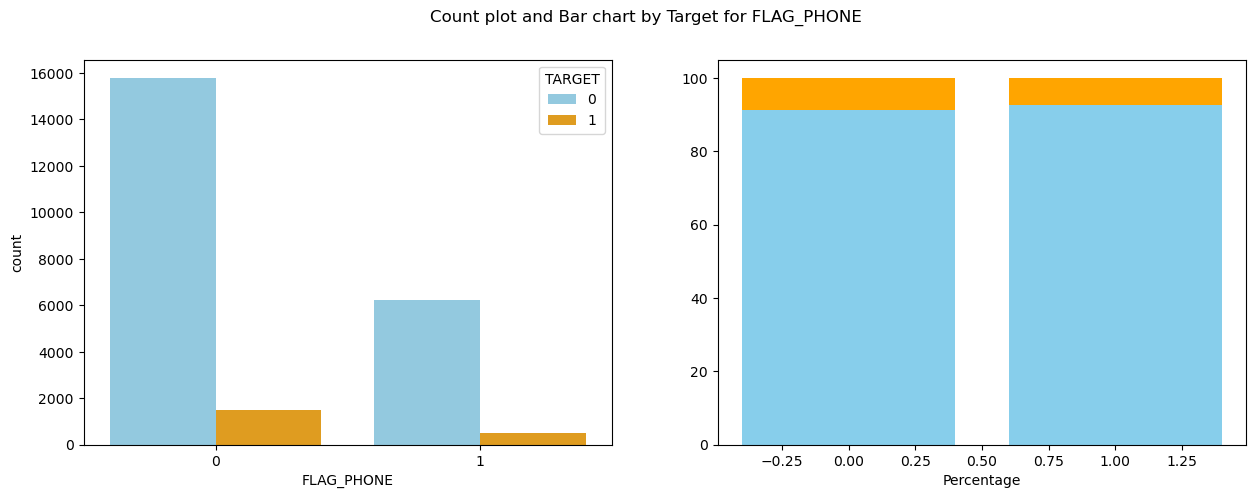

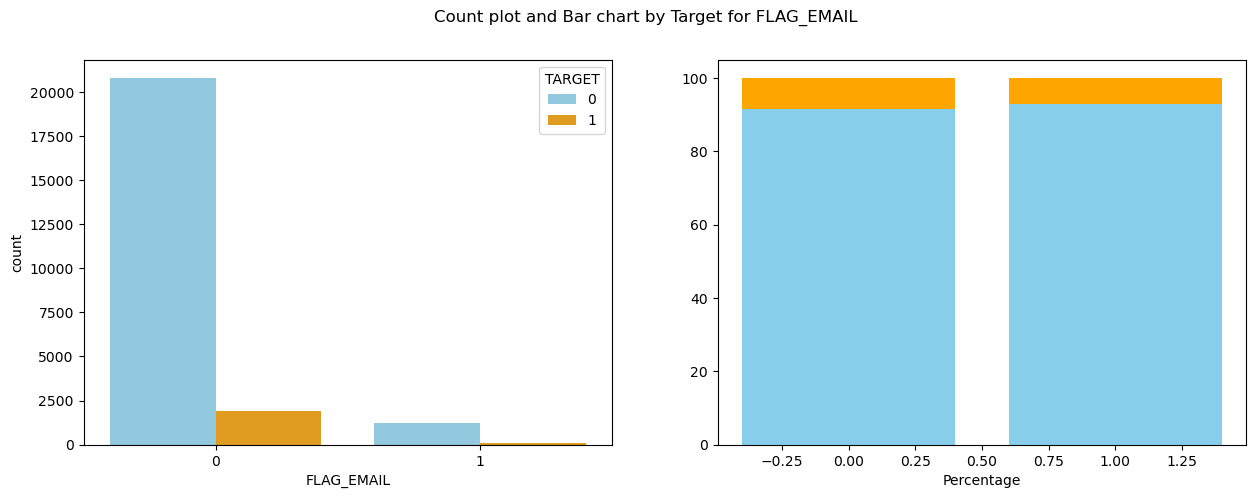

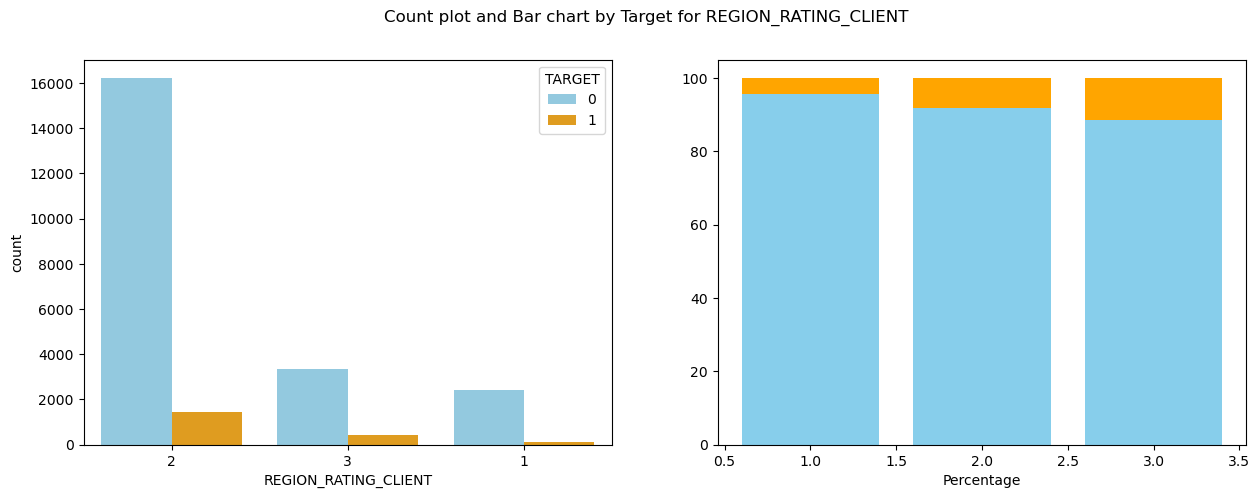

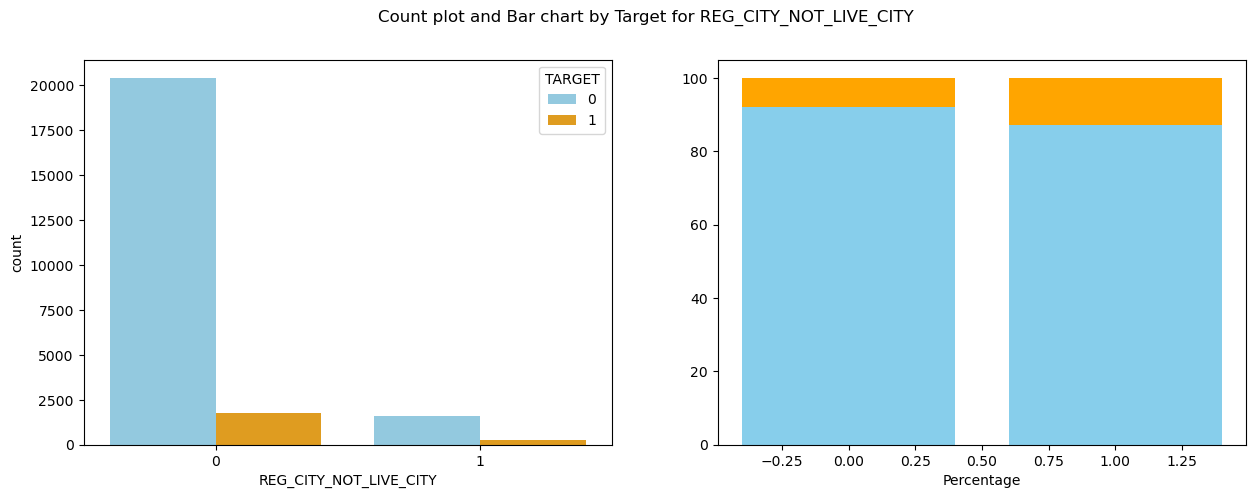

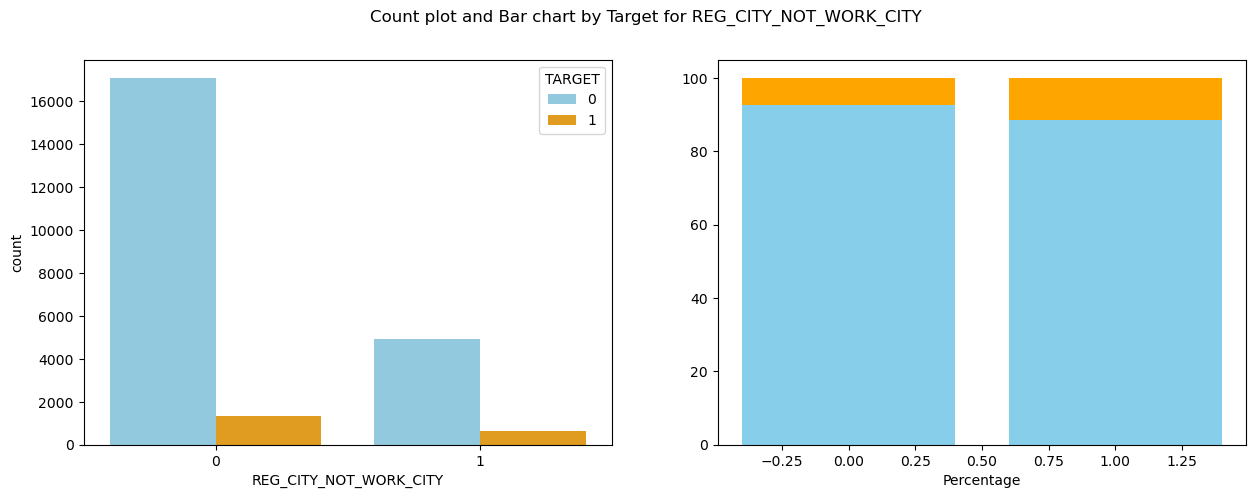

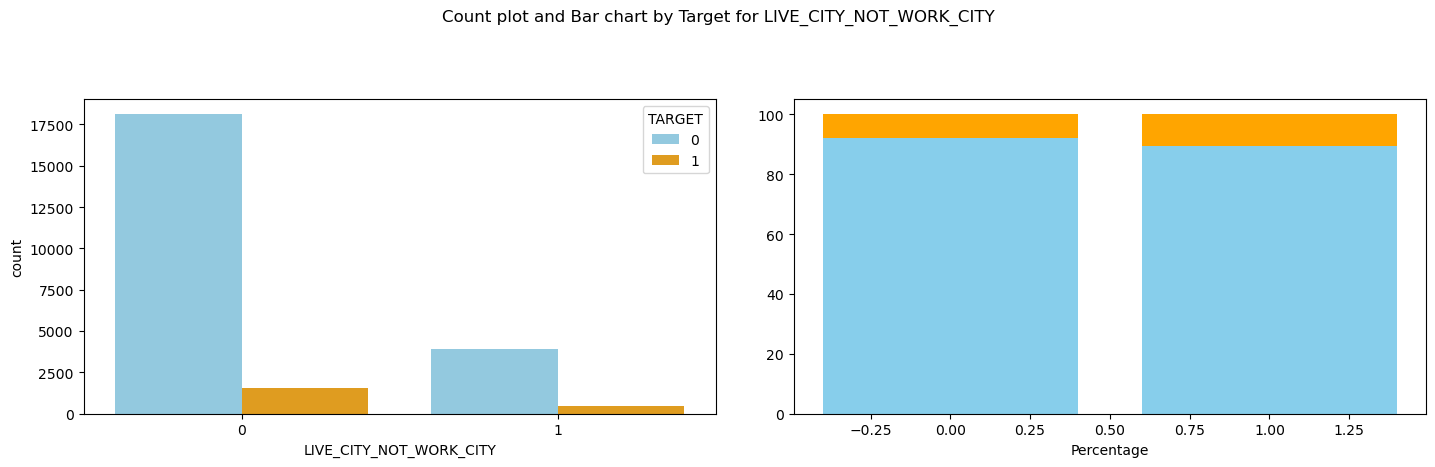

In [159]:
def plot_stats_v(df, feature_list):
    nrows = len(feature_list)

    for i, feature in enumerate(feature_list):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Adjust the size of the graph based on categories

        fig.suptitle(f"Count plot and Bar chart by Target for {feature}")

        # Get a list of unique categories sorted by their counts in descending order
        category_order = df[feature].value_counts().index.tolist()

        # Count plot for the feature by TARGET
        count_plot = sns.countplot(x=feature if len(df[feature].unique()) <= 4 else None,
                                   y=None if len(df[feature].unique()) <= 4 else feature,
                                   hue='TARGET', data=df,
                                   order=category_order,
                                   ax=ax[0], palette=['skyblue', 'orange'])

        # Percentage of each category by TARGET
        df_grouped = df.groupby([feature])['TARGET'].value_counts(normalize=True).rename('percentage(%)').reset_index()
        df_grouped['percentage(%)'] = df_grouped['percentage(%)'] * 100

        bar_chart_df = pd.DataFrame(columns=['Category', 'Target_0_Percentage', 'Target_1_Percentage'])
       
        for j, category in enumerate(category_order):
            temp_df = df_grouped[df_grouped[feature] == category]
            target_0_percentage_values = temp_df[temp_df['TARGET']==0]['percentage(%)'].values
            target_1_percentage_values = temp_df[temp_df['TARGET']==1]['percentage(%)'].values
            
            target_0_percentage = target_0_percentage_values[0] if len(target_0_percentage_values) > 0 else 0
            target_1_percentage = target_1_percentage_values[0] if len(target_1_percentage_values) > 0 else 100 - target_0_percentage
            
            bar_chart_df.loc[j] =[category,target_0_percentage,target_1_percentage]
        
        category_order2 = df[feature].value_counts().index.tolist()[::-1]
        
        bar_chart_sorted=bar_chart_df.set_index('Category').loc[category_order].reset_index()
        bar_chart_sorted2=bar_chart_df.set_index('Category').loc[category_order2].reset_index()

        if len(bar_chart_sorted["Category"].unique()) > 4:
            bars = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_0_Percentage"], color='skyblue')
            bars2 = ax[1].barh(bar_chart_sorted2["Category"], bar_chart_sorted2["Target_1_Percentage"], left=bar_chart_sorted2["Target_0_Percentage"] ,color='orange')
        else:
            bars = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_0_Percentage"] ,color='skyblue')
            bars2 = ax[1].bar(bar_chart_sorted["Category"], bar_chart_sorted["Target_1_Percentage"], bottom=bar_chart_sorted["Target_0_Percentage"] ,color='orange')

        ax[1].set_xlabel('Percentage')

    plt.tight_layout(pad=3.03)
    plt.show();

categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
plot_stats_v(df_adj_mv_fill, categorical_features)


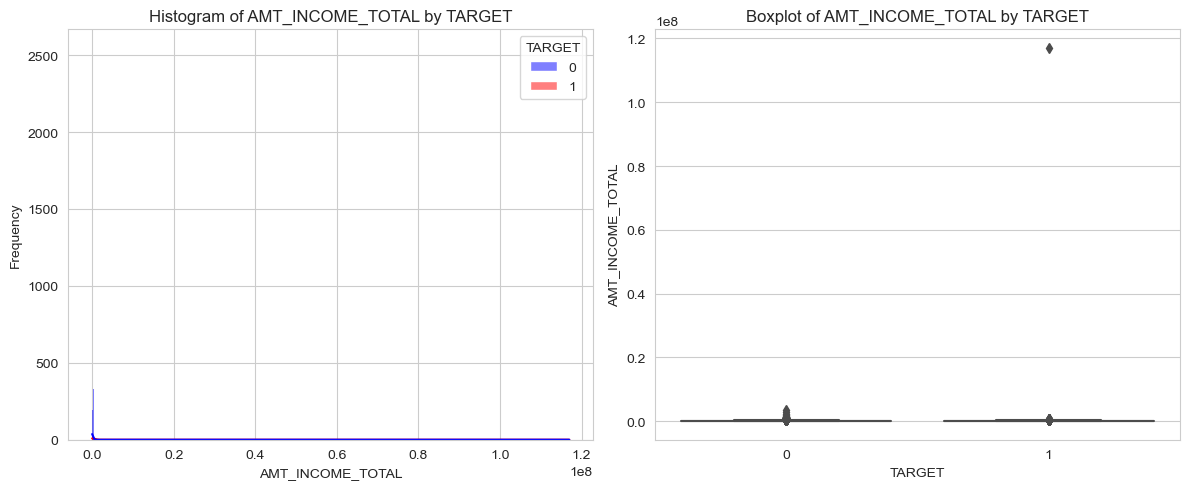

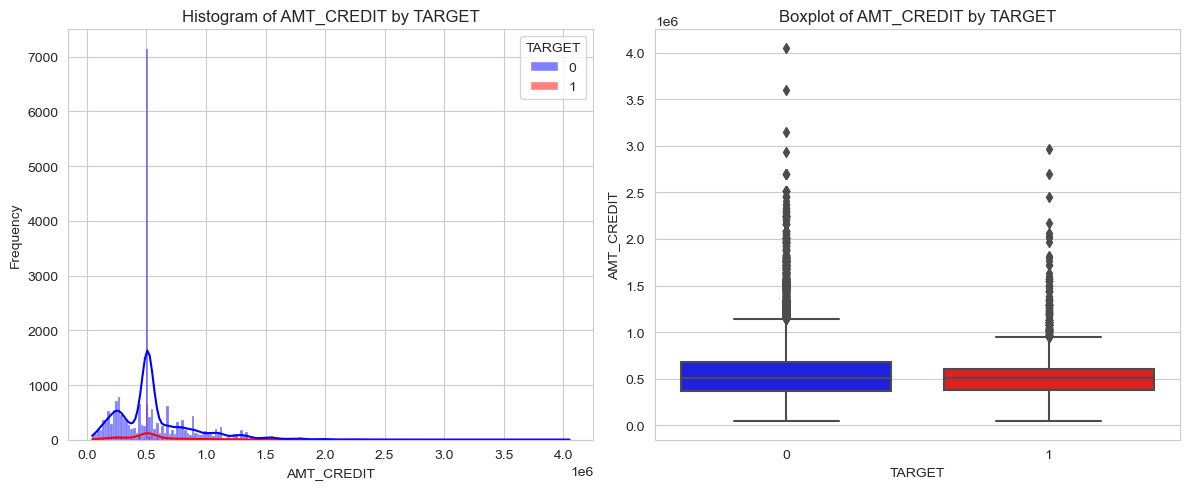

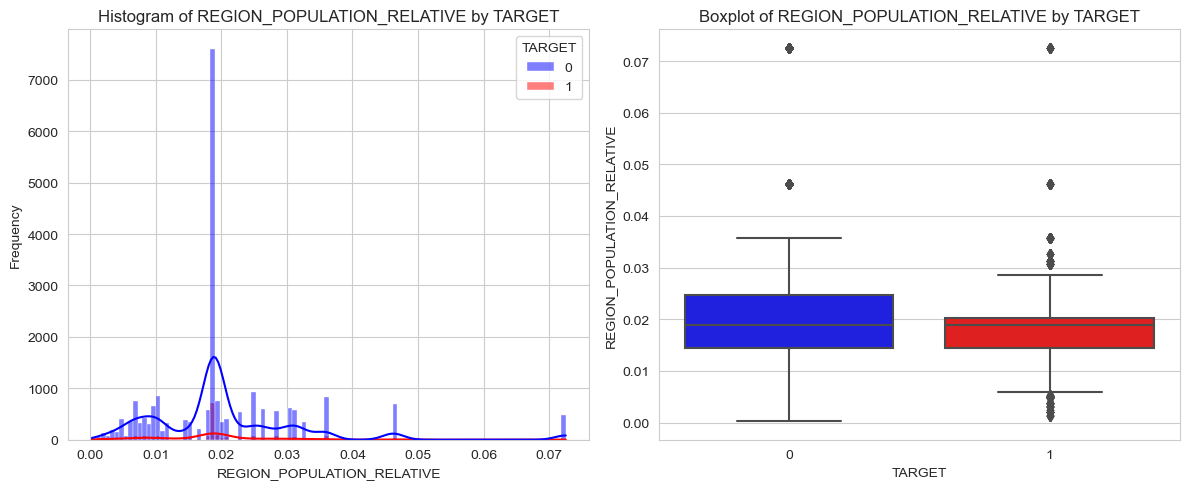

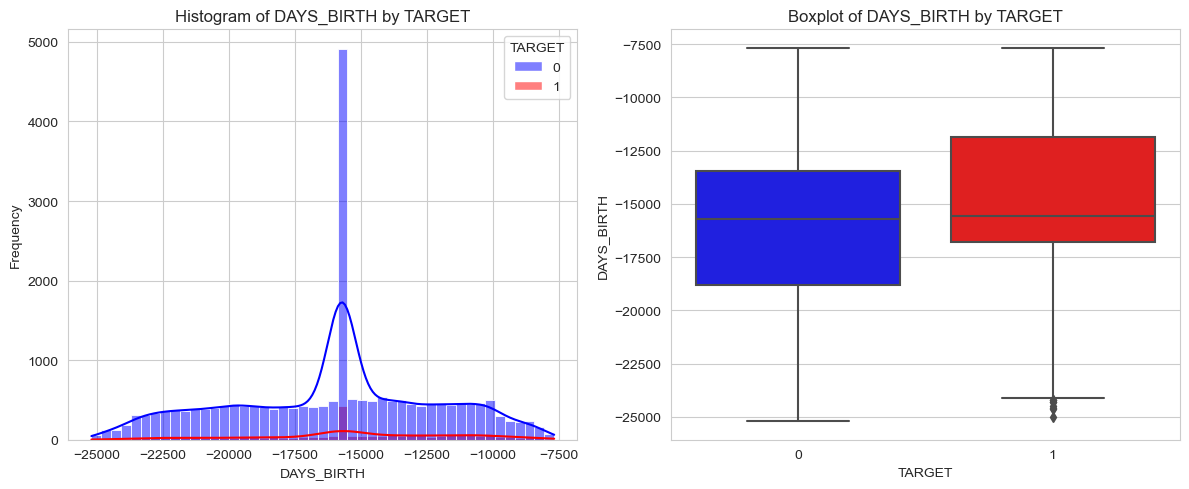

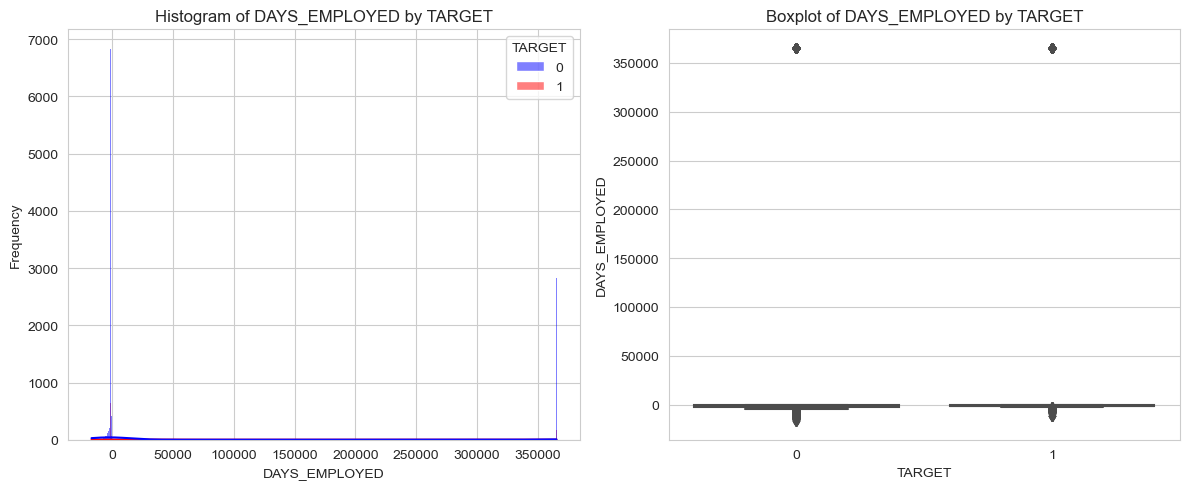

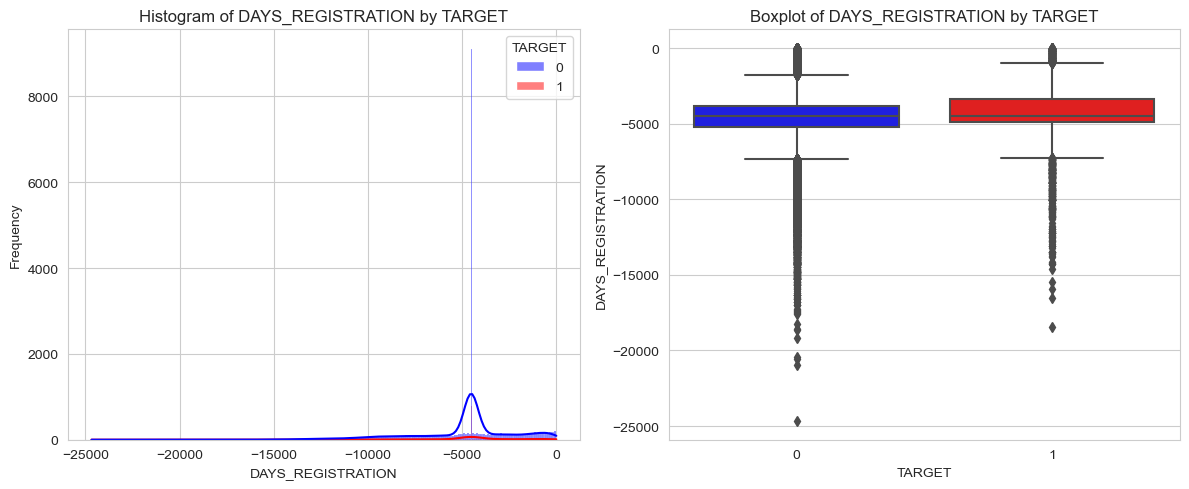

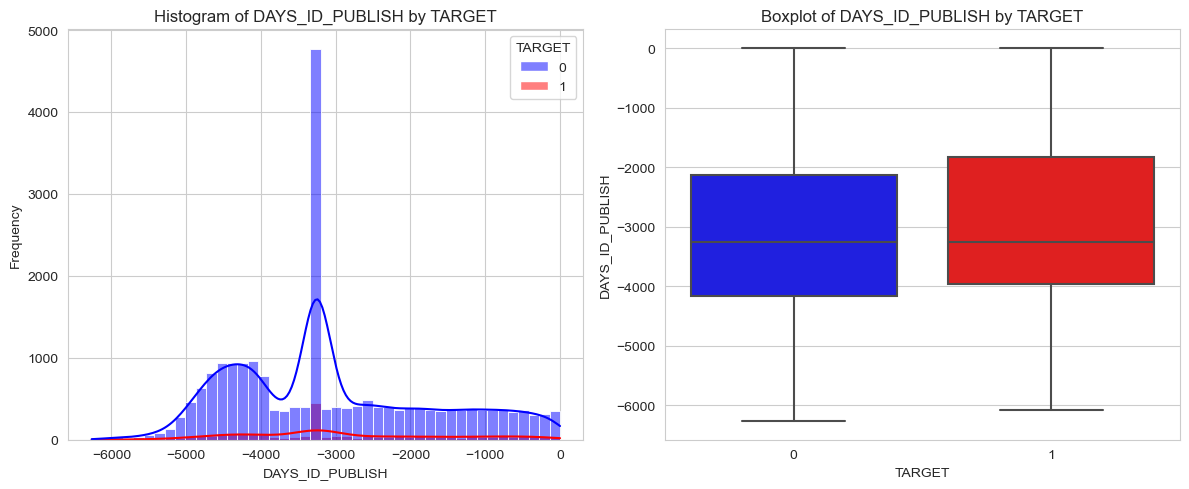

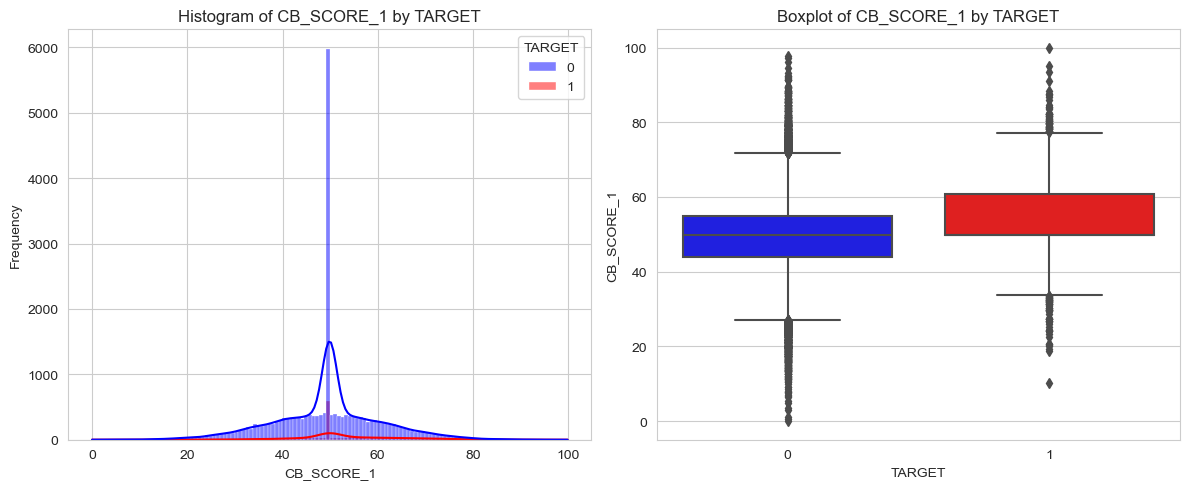

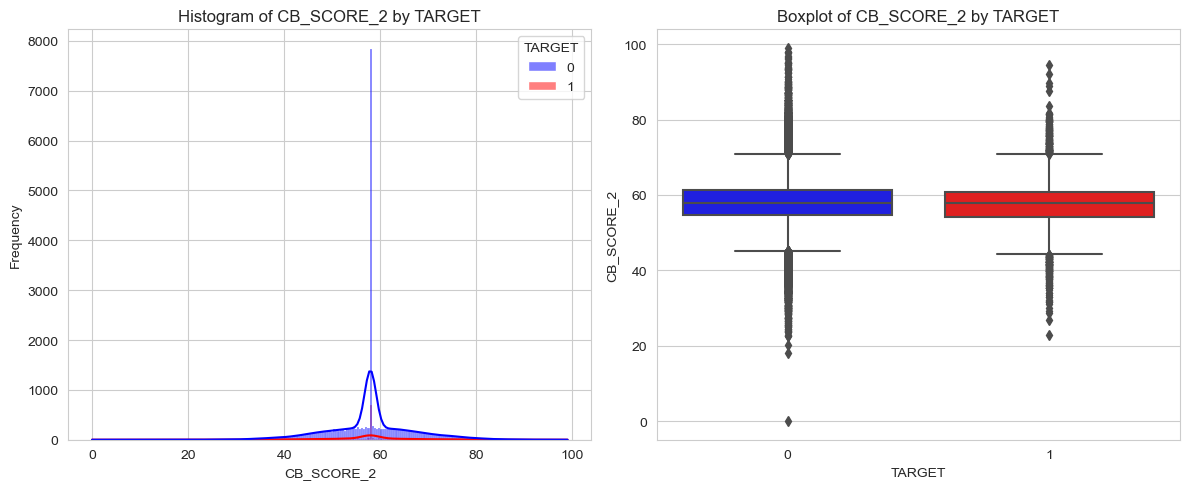

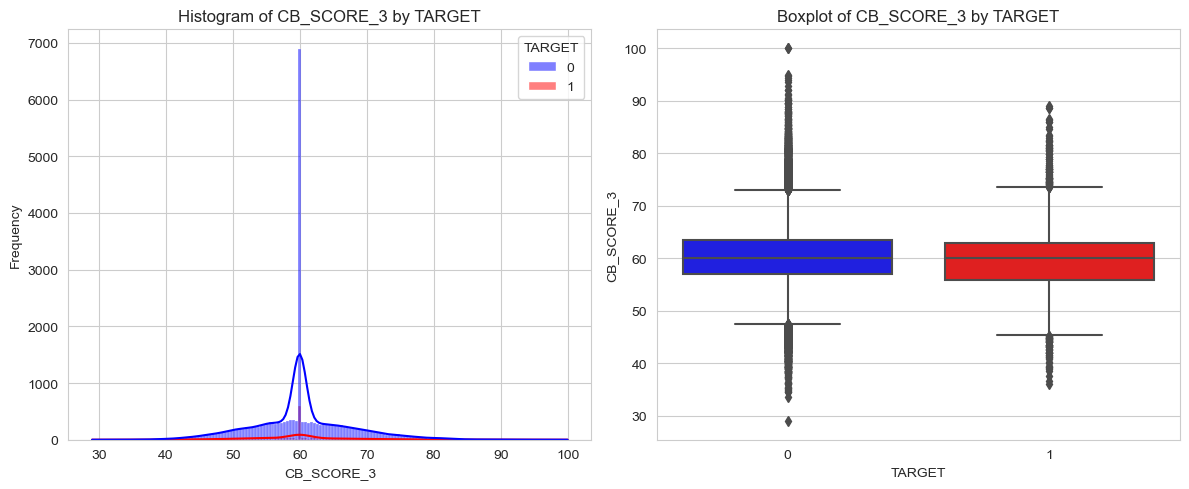

In [162]:
# 그래프 스타일 설정
sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일

custom_palette = ["blue", "red"]

for column in numerical_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # 히스토그램 그리기
    sns.histplot(data=df_adj_mv_fill, x=column, hue='TARGET', kde=True, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'Histogram of {column} by TARGET')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # 상자 그림 그리기
    sns.boxplot(data=df_adj_mv_fill, x='TARGET', y=column, ax=axes[1], palette=custom_palette)
    axes[1].set_title(f'Boxplot of {column} by TARGET')
    axes[1].set_xlabel('TARGET')
    axes[1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

In [104]:
# 범주형 변수 추출
categorical_features = df_adj_mv_fill.select_dtypes(include=['object']).columns.tolist()

print(categorical_features)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


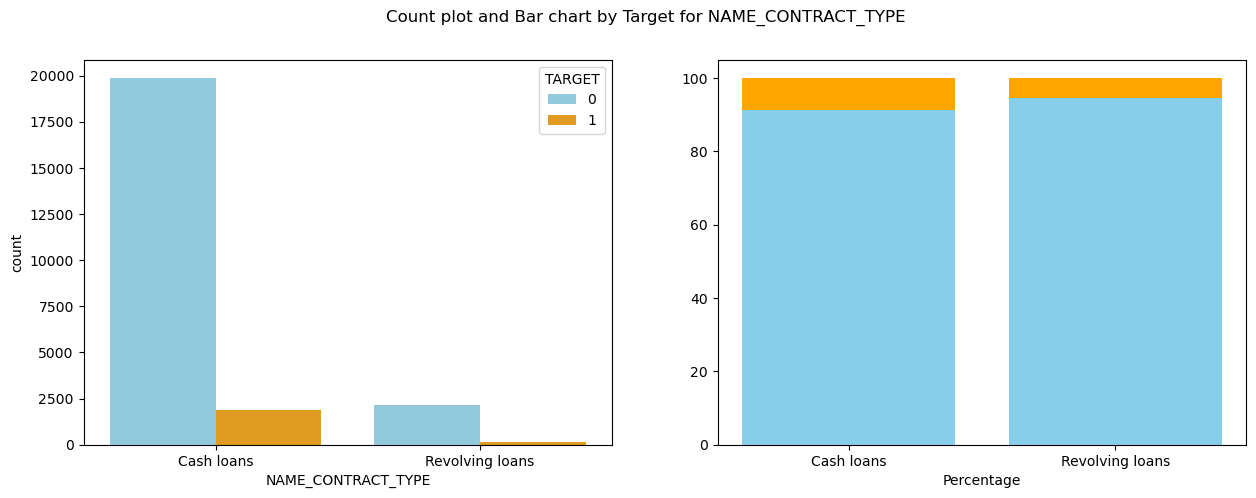

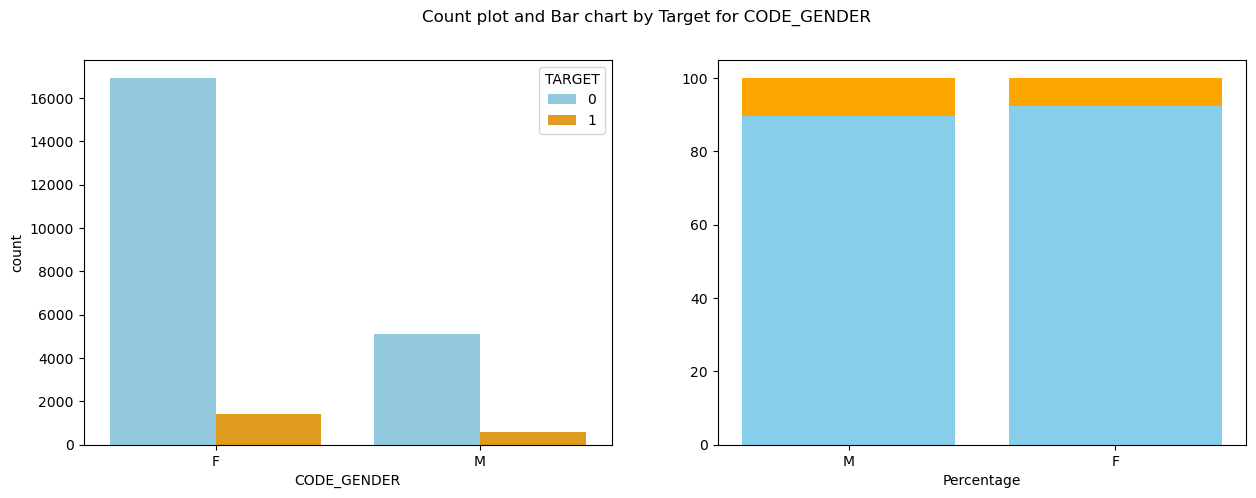

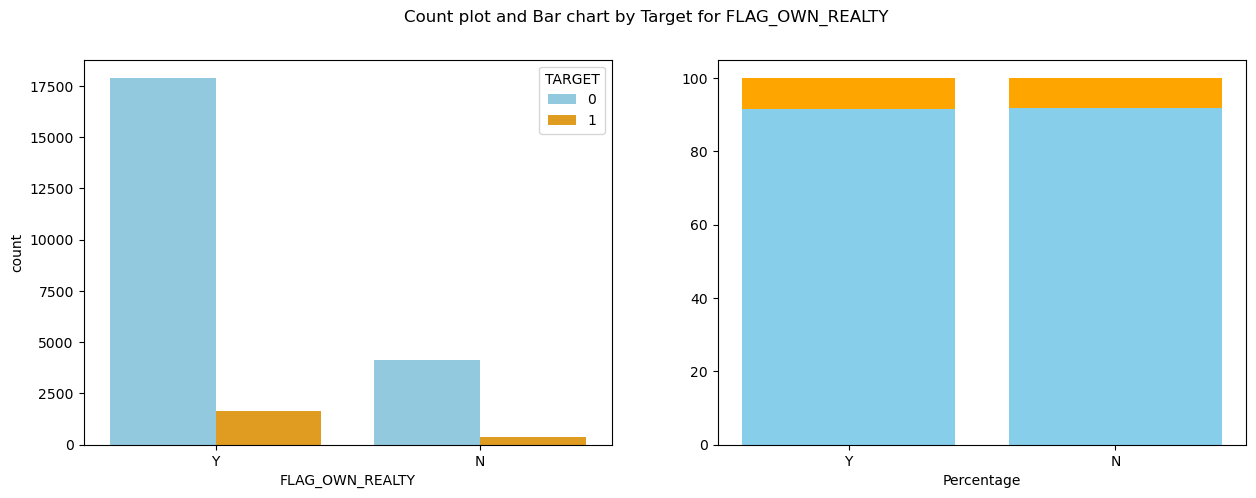

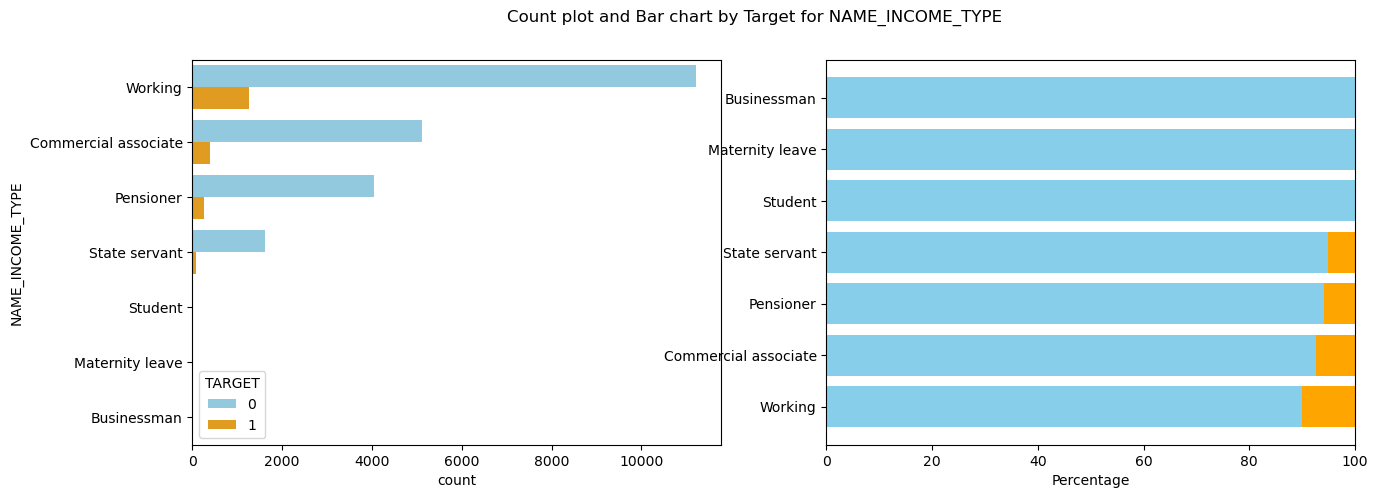

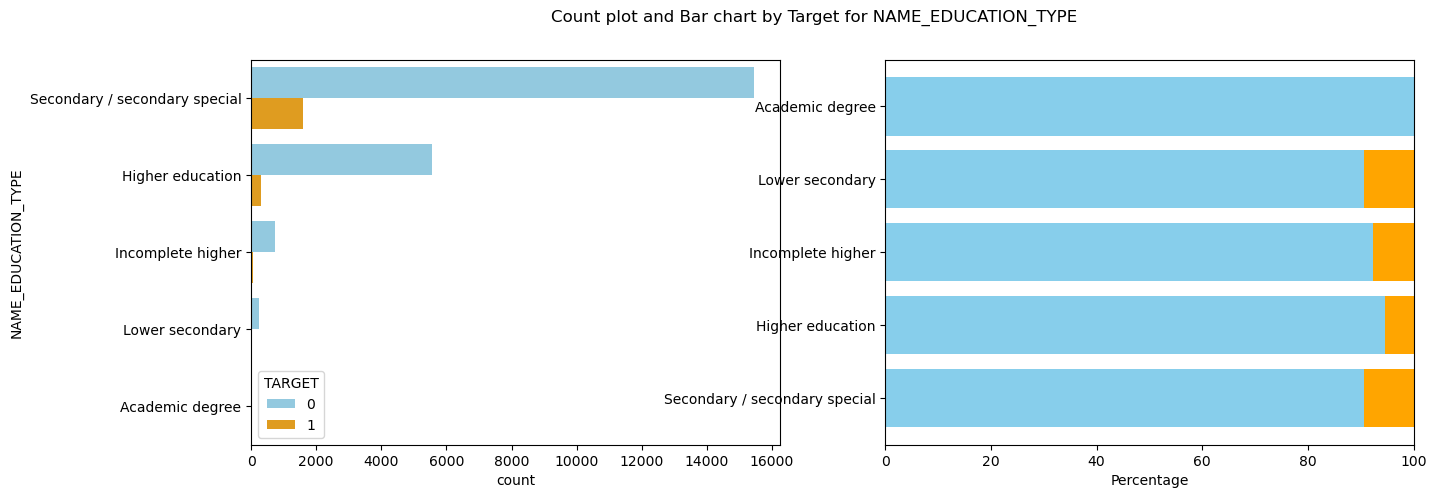

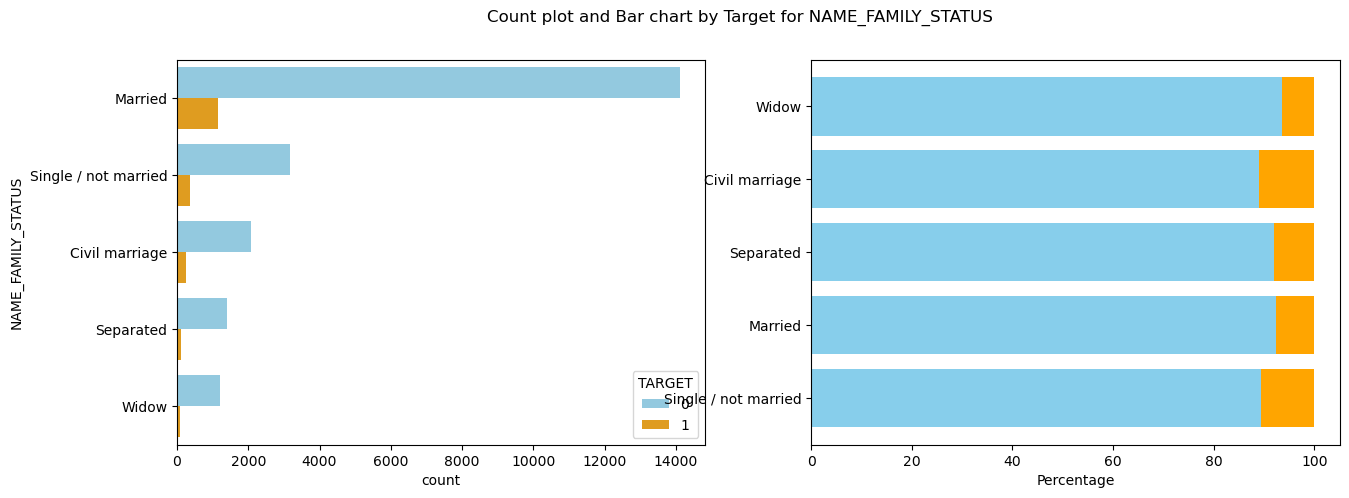

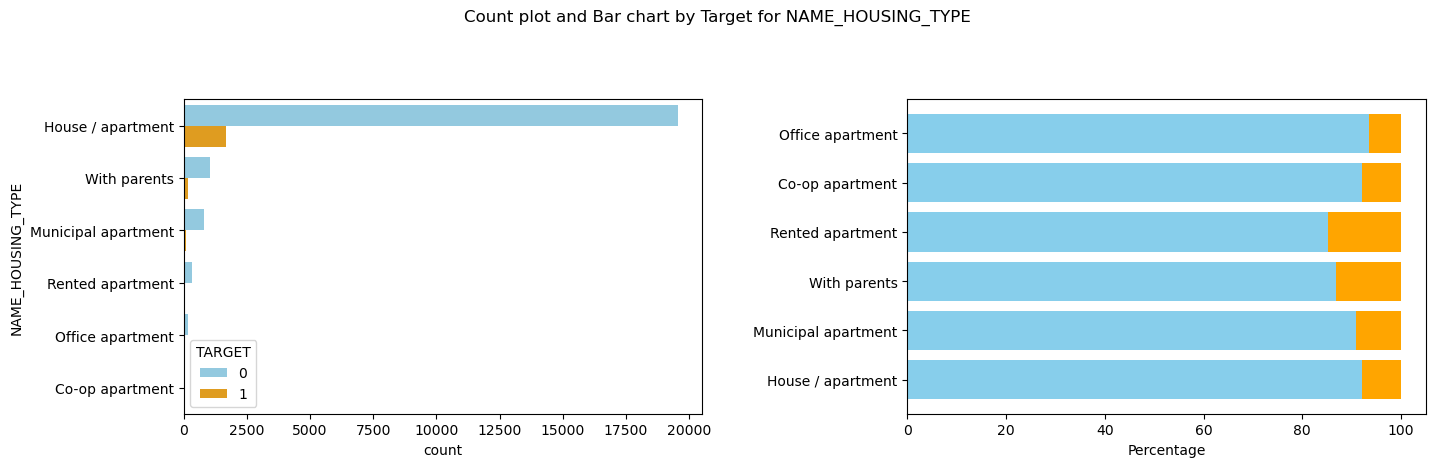

In [108]:

# Call the function with a list of features:
plot_stats_v(df_adj_mv_fill, ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

> #### Distribution plot 함수

DISTRIBUTION 그리는데 차이가 너무 심해서 정규화 해서 보여줄순 없을까

In [49]:
def plot_distribution(df, feature, target, color):
    
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s by Target" % feature)
    
    # For each value of the target variable, plot the distribution of the feature
    for target_value in df[target].unique():
        sns.distplot(df[df[target] == target_value][feature].dropna(),
                     color=color[target_value],
                     kde=True,
                     bins=100,
                     label=f'Target {target_value}')
        
    # Disable scientific notation 
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    
    plt.legend()
    plt.show();

In [50]:
def plot_N_distribution(df, feature, target, color):
    plt.figure(figsize=(10, 6))
    plt.title("Normalized Distribution of %s by Target" % feature)
    
    # For each value of the target variable, plot the normalized distribution of the feature
    for target_value in df[target].unique():
        data = df[df[target] == target_value][feature].dropna()
        sns.kdeplot(data,
                    color=color[target_value],
                    label=f'Target {target_value}',
                    shade=True,
                    alpha=0.5)
    
    # Disable scientific notation 
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.legend()
    plt.show()

> #### Box plot 함수

In [51]:
def plot_boxplot(df, feature, target, colors):
    plt.figure(figsize=(10,6))
    plt.title("Boxplot of %s by Target" % feature)

    # Unique values in target column
    targets = df[target].unique()

    # For each value of the target variable, plot the boxplot of the feature
    for i in range(len(targets)):
        plt.subplot(1,len(targets),i+1)
        sns.boxplot(y=df[df[target]==targets[i]][feature], color=colors[i])
        plt.title(f'Target {targets[i]}')
        
    plt.tight_layout()
    plt.show();

> #### Strip plot 함수

In [52]:
def plot_stripplot(df, feature, target, color):
    plt.figure(figsize=(10,6))
    plt.title("Strip plot of %s by Target" % feature)

    # Plot a strip plot of the feature for each value of the target variable
    sns.stripplot(x=target, y=feature, data=df,
                  jitter=True,
                  palette=color)

    # Disable scientific notation 
    plt.ticklabel_format(style='plain', axis='y')

    plt.show();

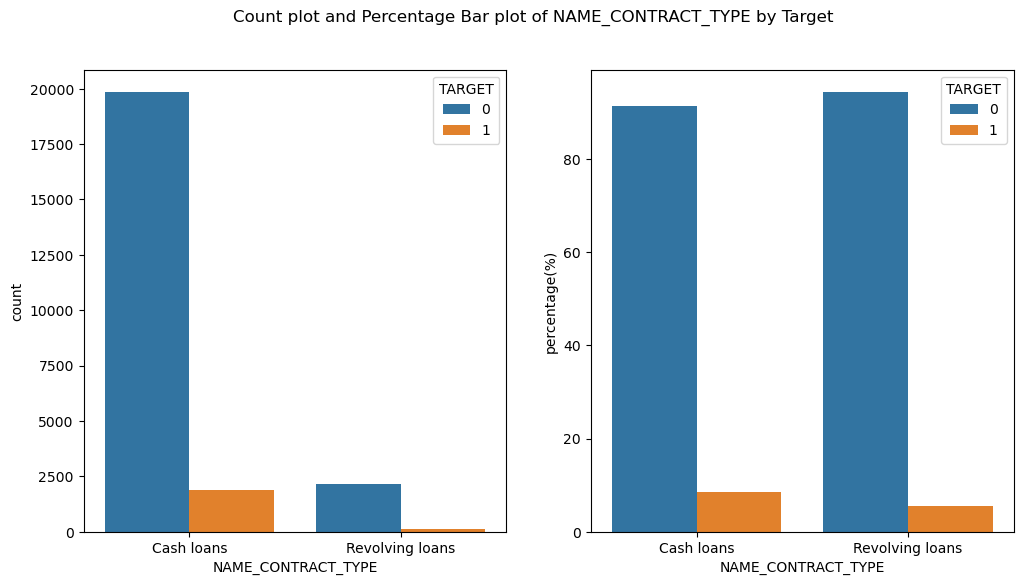

In [53]:
plot_stats(df_adj_mv_fill,'NAME_CONTRACT_TYPE')

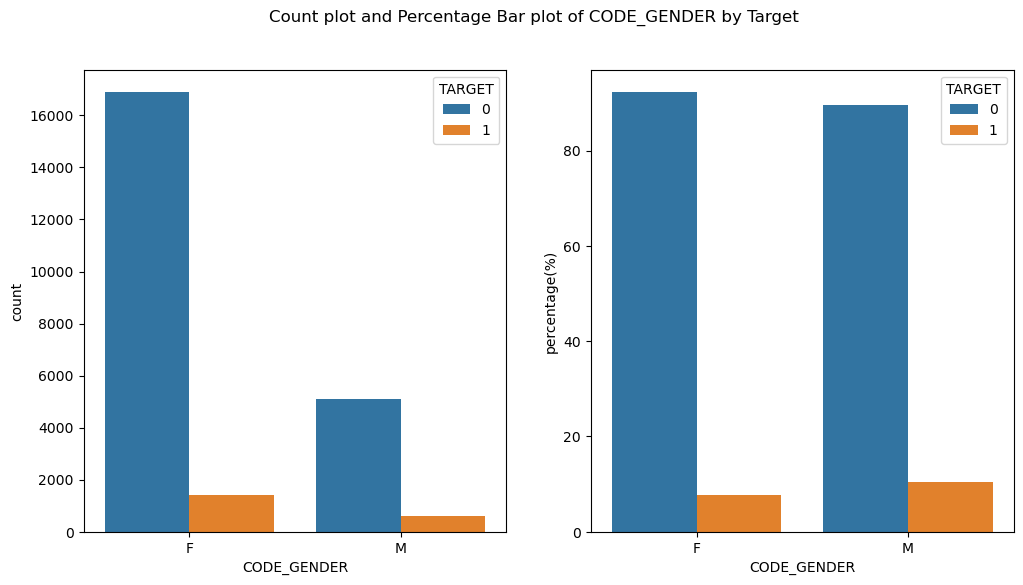

In [54]:
plot_stats(df_adj_mv_fill,'CODE_GENDER')

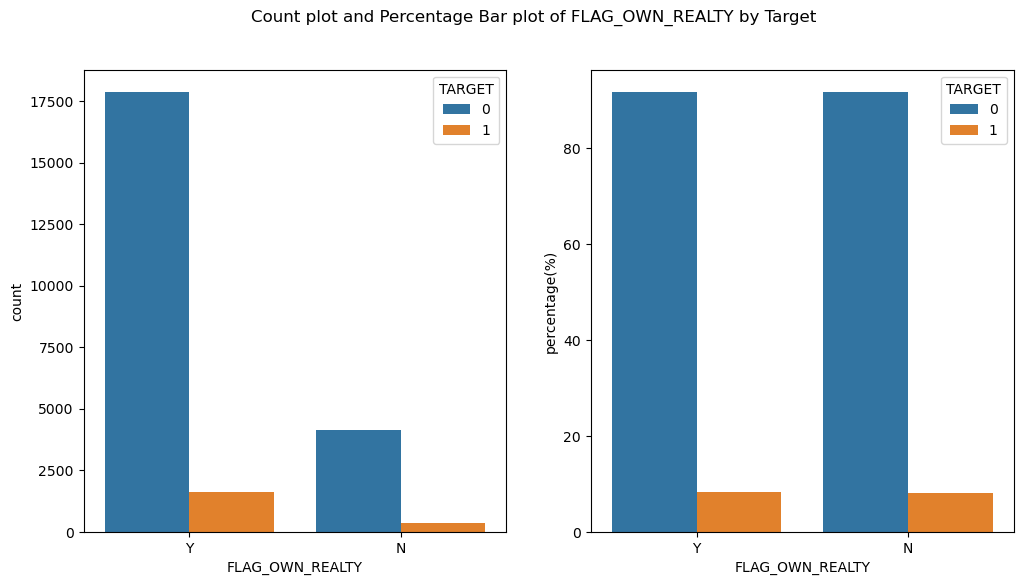

In [55]:
plot_stats(df_adj_mv_fill,'FLAG_OWN_REALTY')

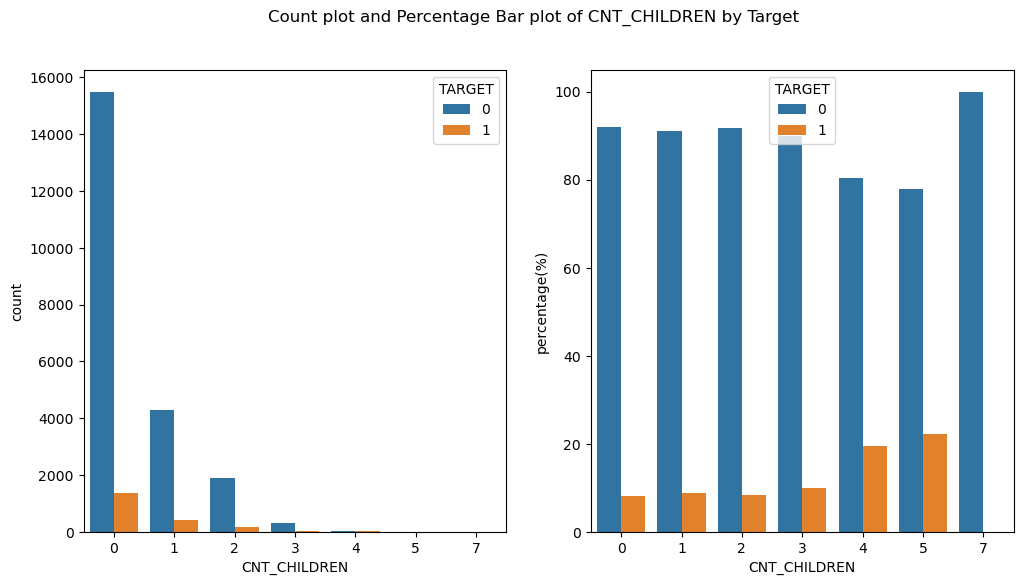

In [56]:
plot_stats(df_adj_mv_fill,'CNT_CHILDREN')

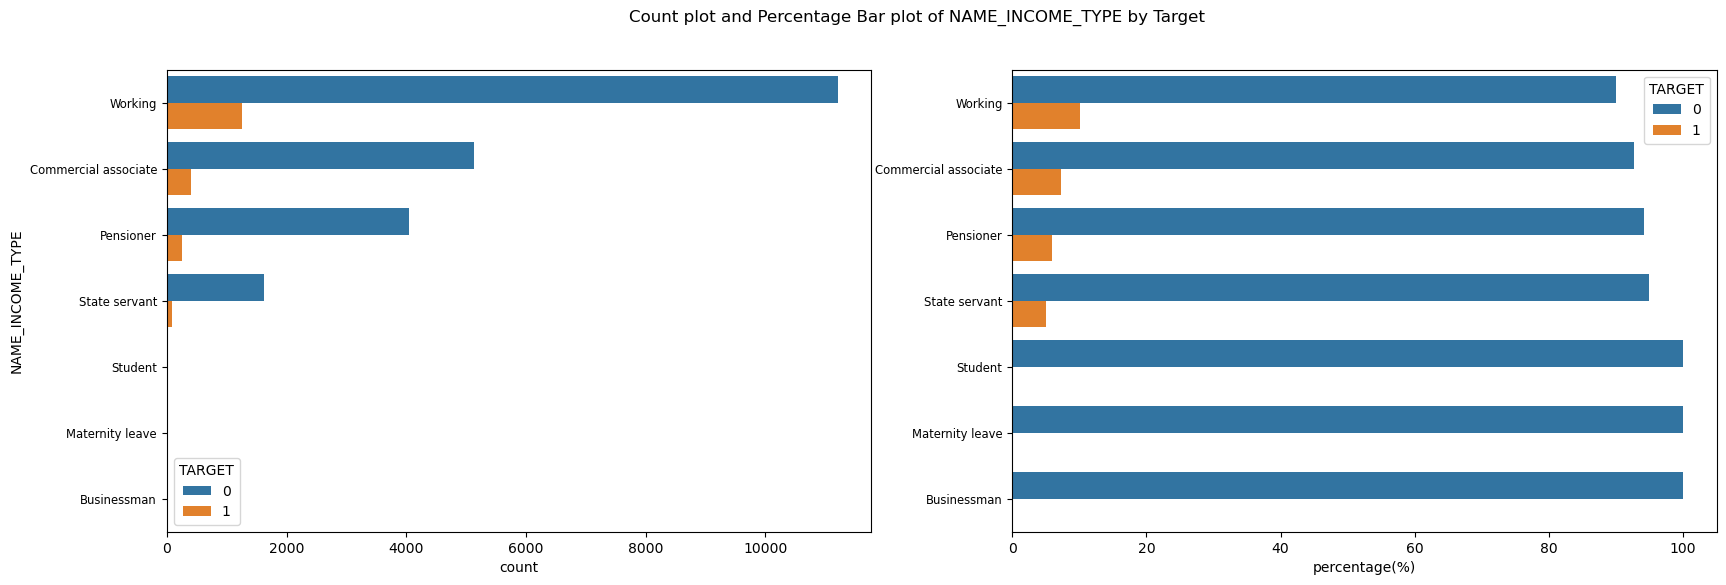

In [59]:
plot_stats_v(df_adj_mv_fill,'NAME_INCOME_TYPE')

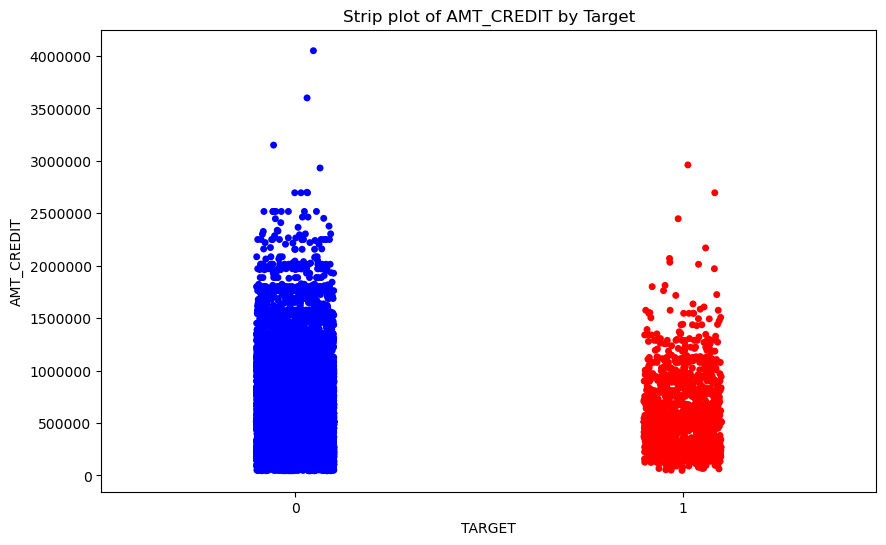

In [125]:
color = {'0':'blue', '1':'red'}
plot_stripplot(df_adj_mv_fill,'AMT_CREDIT','TARGET',color)

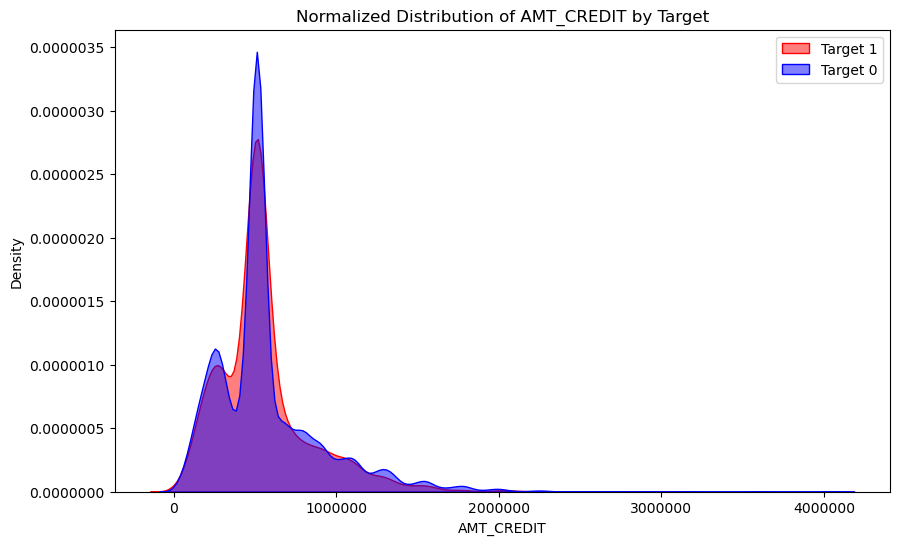

In [62]:
color = {0:'blue', 1:'red'}
#plot_distribution(df_adj_mv_fill,'AMT_CREDIT','TARGET',color)
plot_N_distribution(df_adj_mv_fill,'AMT_CREDIT','TARGET',color)
#plot_distribution(df_adj_mv_fill,'AMT_INCOME_TOTAL','TARGET',color) #4분위수
#plot_N_distribution(df_adj_mv_fill,'AMT_INCOME_TOTAL','TARGET',color) #4분위수

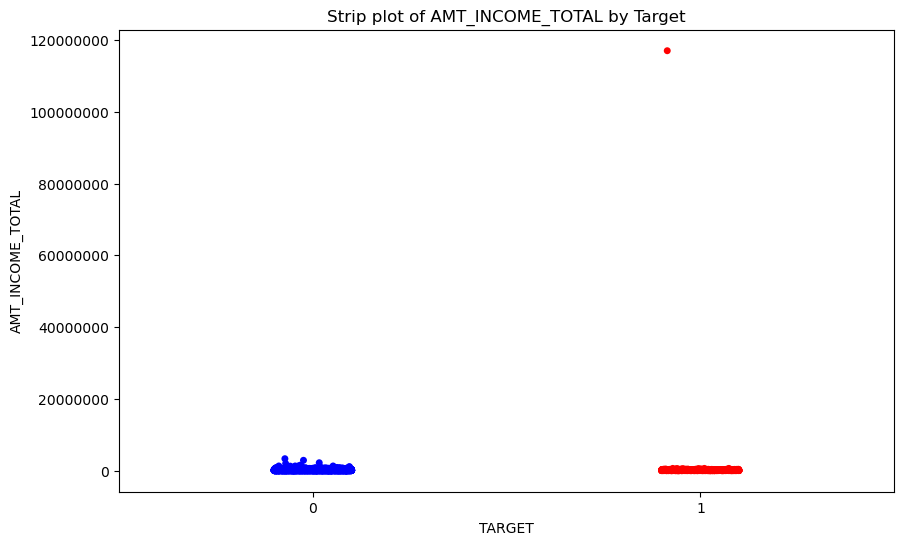

In [60]:
color = {'0':'blue', '1':'red'}
plot_stripplot(df_adj_mv_fill,'AMT_INCOME_TOTAL','TARGET',color) #4분위수

In [ ]:
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

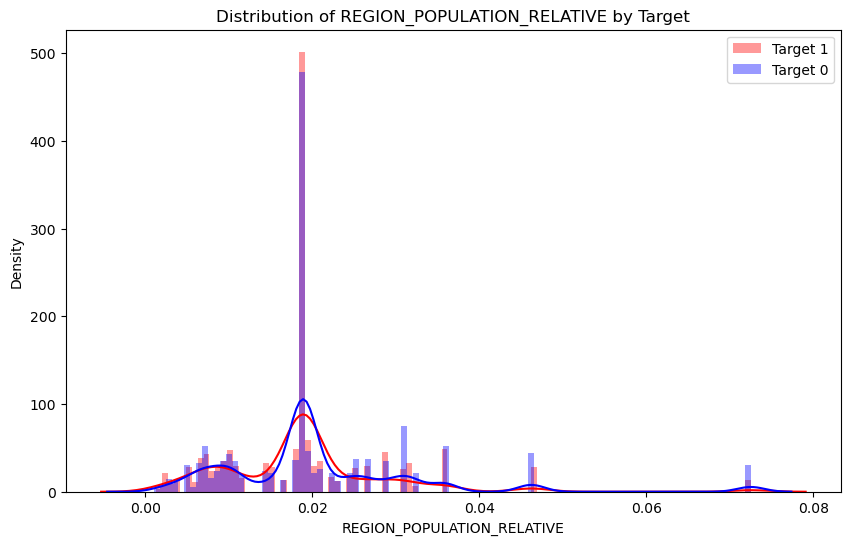

In [64]:
color = {0:'blue', 1:'red'}
plot_distribution(df_adj_mv_fill,'REGION_POPULATION_RELATIVE','TARGET',color)

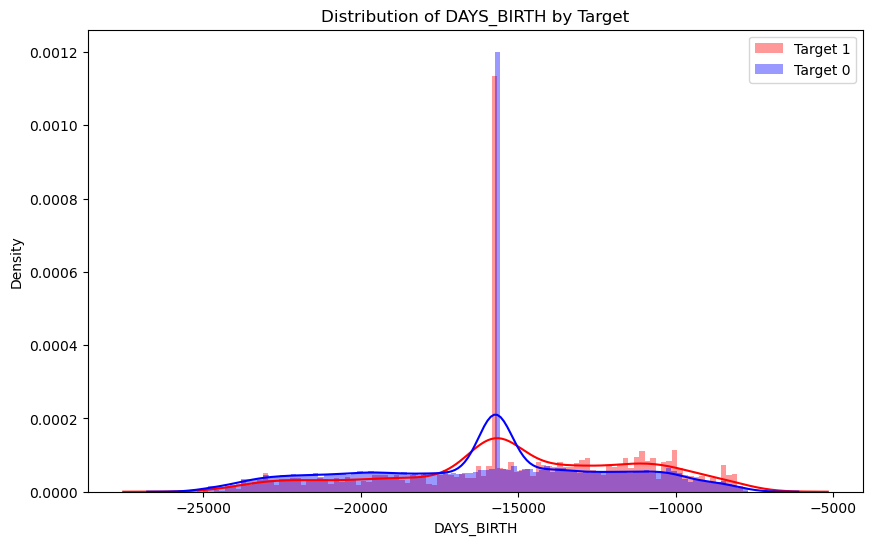

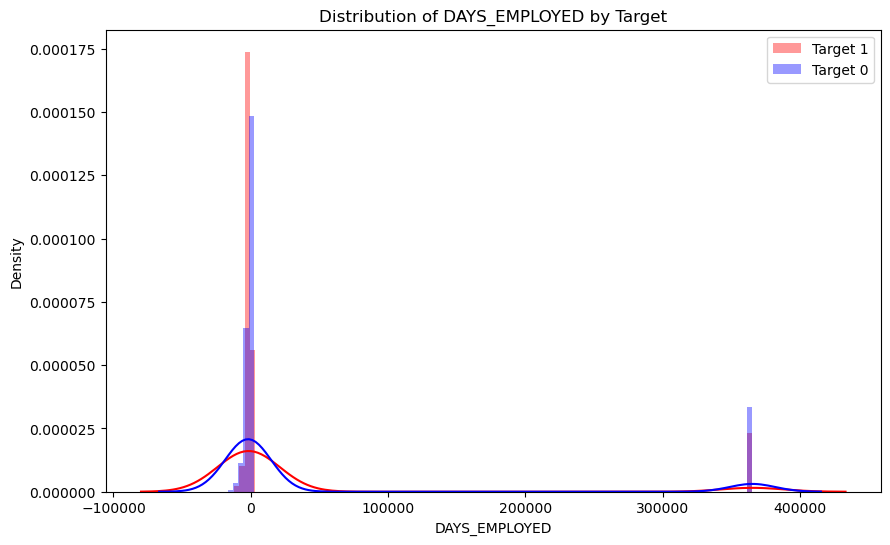

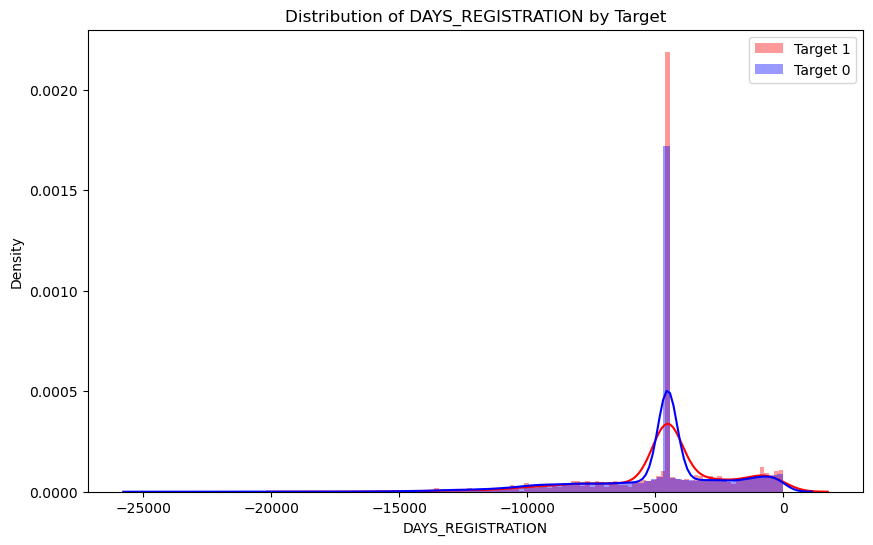

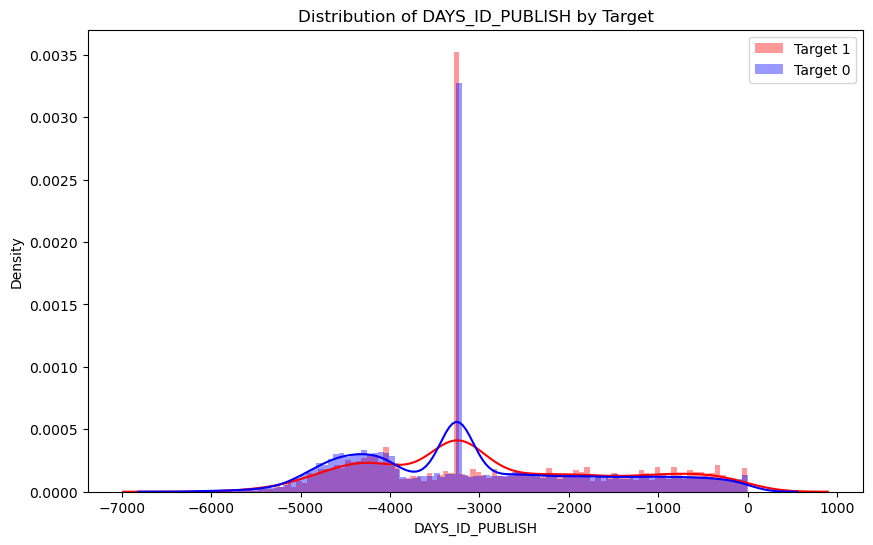

In [28]:
color = {0:'blue', 1:'red'}
plot_distribution(df_adj_mv_fill,'DAYS_BIRTH','TARGET',color)
plot_distribution(df_adj_mv_fill,'DAYS_EMPLOYED','TARGET',color)
plot_distribution(df_adj_mv_fill,'DAYS_REGISTRATION','TARGET',color)
plot_distribution(df_adj_mv_fill,'DAYS_ID_PUBLISH','TARGET',color)

In [ ]:
color = {'0':'blue', '1':'red'}
plot_stripplot(df_adj_mv_fill,'REGION_POPULATION_RELATIVE','TARGET',color) #4분위수

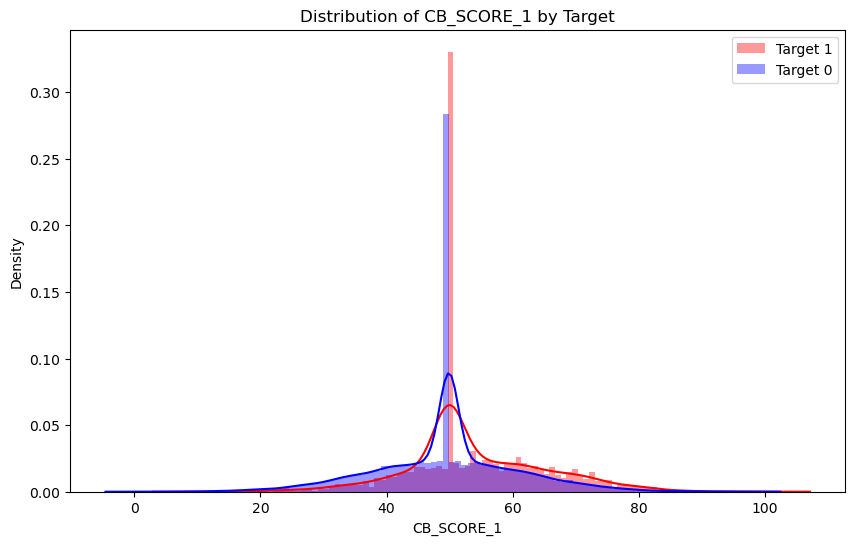

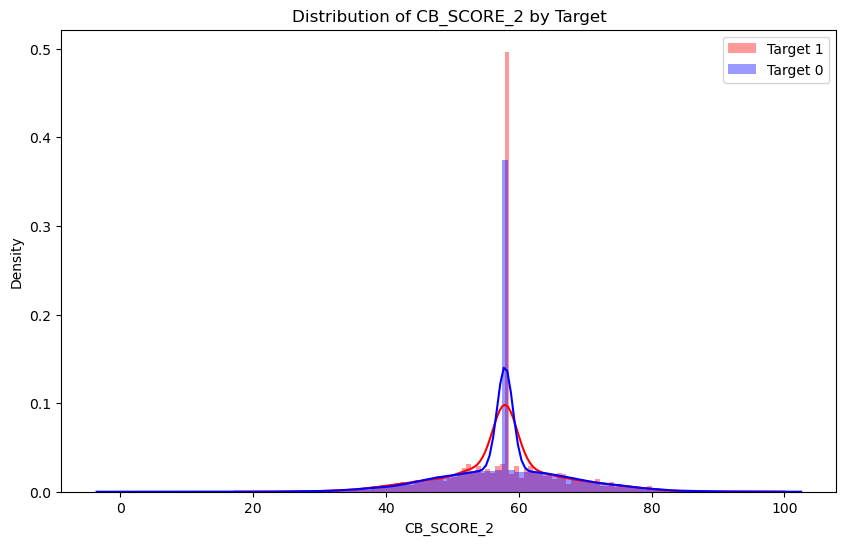

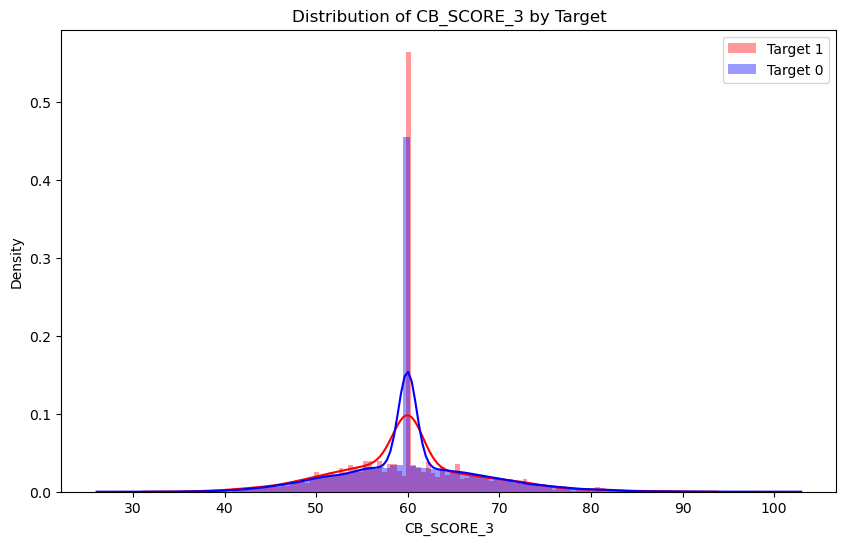

In [35]:
color = {0:'blue', 1:'red'}
plot_distribution(df_adj_mv_fill,'CB_SCORE_1','TARGET',color)
plot_distribution(df_adj_mv_fill,'CB_SCORE_2','TARGET',color)
plot_distribution(df_adj_mv_fill,'CB_SCORE_3','TARGET',color)